In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import seaborn as sns

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.json' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title test (1).json, id 1rd_euyUY8nNwJbPlycNvxJpuV54tDUS2
title train (1).json, id 1oE_P-_2M33XRxCNfPWbMWzeudu0i0-cr
title train.json, id 1TIgATzhuucJkXlHc4zp4cVG_MyipB4t-
title test.json, id 1d4GWDTtXcIak9N9WpL5YYOO5YZx4J2h5


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
import seaborn as sns


# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1KLGXUxWYPTLA5HDtaEpKhVIXOkiSNV4I'
file_id_tr ='1TIgATzhuucJkXlHc4zp4cVG_MyipB4t-'
#file_id_tr = '1BMGqG-frnPnNeYPGbJmAIR-WGay5q-4V'
downloaded_tr = drive.CreateFile({'id': file_id_tr})
file_id_te ='1d4GWDTtXcIak9N9WpL5YYOO5YZx4J2h5'
#file_id_te = '1tV2_4wgR6ycXMFCxMU6kZRbQi_4kSGeF'
downloaded_te = drive.CreateFile({'id': file_id_te})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split


from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy.io.arff import loadarff
from tqdm import tqdm
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
downloaded_tr = drive.CreateFile({'id': file_id_tr})
downloaded_tr.GetContentFile('train.json')  # Download to a local file
data_train = pd.read_json('train.json')
downloaded_te = drive.CreateFile({'id': file_id_te})
downloaded_te.GetContentFile('test.json')
data_test = pd.read_json('test.json')

In [ ]:
data_train

md5hash  \
0      aaec2a99e23b2478ce5ec7f9b43c840c   
1      14a9db02dd903a76adb275cf45d10413   
2      70f77a07109abab1983d98214f4eb199   
3      fa67eebd3047eb2a4c9379623219d58d   
4      d9209cdfe4fd24c6f2a17acdafa558a5   
...                                 ...   
30708  fe46343b095fc1cb94a124f8b09899de   
30709  be5111ece71450ea095ea53a7b363b2c   
30710  4d237055a3d6de87dfce141ade1ffb55   
30711  d755e305bace737948114d56bb3cb207   
30712  a23750d486a7021b0b645100a2b32042   

                                       api_call_sequence  is_malware  
0      [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1  
1      [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1  
2      [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1  
3      [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1  
4      [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1  
...                                                  ...         ...  
30708  [NtAllocateVirtualMemory, NtFreeVirtualMemory,...           1  
30709  [GetSystemTimeAsFileTime, NtAllocateVirtualMem...           1  
30710  [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1  
30711  [NtCreateFile, GetFileType, SetFilePointer, Nt...           1  
30712  [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1  

[30713 rows x 3 columns]

In [ ]:
data_test

md5hash  \
0      0765ce24323c6801e325d4266be073b9   
1      4480e321a0df8e0e8fa23a3c0a47c933   
2      f663674a8ddc469c383907b3930cd819   
3      49346a617852117dd162e8ae530664ef   
4      a4b966898bfb48953109c9086163483b   
...                                 ...   
13158  a8de5c3c37cd1f7d84b4919bfe27e8e3   
13159  8d7d17eff30f33f94ecb34fd2634fbde   
13160  d9b7139d87684707b9e2a1edcc7354cb   
13161  12bf9e05d6faade764122aa50c07938a   
13162  bd0a4ba4eef73484b85d0b6af5d8ebf0   

                                       api_call_sequence  is_malware  
0      [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1  
1      [GetSystemMetrics, LdrLoadDll, LdrGetProcedure...           1  
2      [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1  
3      [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1  
4      [GetSystemTimeAsFileTime, NtAllocateVirtualMem...           1  
...                                                  ...         ...  
13158  [SetUnhandledExceptionFilter, NtAllocateVirtua...           1  
13159  [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1  
13160  [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1  
13161  [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1  
13162  [SetErrorMode, OleInitialize, LdrGetDllHandle,...           1  

[13163 rows x 3 columns]

In [ ]:
import pandas as pd

# Count the occurrences of each malware label
malware_counts = data_train['is_malware'].value_counts()
malware_counts_test = data_test['is_malware'].value_counts()


print("Train")
print(malware_counts)
print("Test")
print(malware_counts_test)



Train
is_malware
1    29958
0      755
Name: count, dtype: int64
Test
is_malware
1    12839
0      324
Name: count, dtype: int64


In [ ]:
import pandas as pd
api_call_counts = {}
for index, row in data_train.iterrows():
    api_calls = row['api_call_sequence']
    for api_call in api_calls:
        if api_call not in api_call_counts:
            api_call_counts[api_call] = 0
        api_call_counts[api_call] += 1

train_api_call_df = pd.DataFrame(list(api_call_counts.items()), columns=['api_call', 'count'])
train_api_call_df


api_call   count
0                      NtClose  116465
1                    NtOpenKey   64497
2              NtQueryValueKey   65156
3              LdrGetDllHandle  176946
4       LdrGetProcedureAddress  404182
..                         ...     ...
248       DeleteUrlCacheEntryW       2
249           NtQueueApcThread      28
250  GetFileVersionInfoSizeExW       1
251      GetFileVersionInfoExW       1
252             GetUserNameExA       1

[253 rows x 2 columns]

In [ ]:
import pandas as pd
api_call_counts = {}
for index, row in data_test.iterrows():
    api_calls = row['api_call_sequence']
    for api_call in api_calls:
        if api_call not in api_call_counts:
            api_call_counts[api_call] = 0
        api_call_counts[api_call] += 1

test_api_call_df = pd.DataFrame(list(api_call_counts.items()), columns=['api_call', 'count'])
test_api_call_df

api_call  count
0            RegOpenKeyExA   9495
1                NtOpenKey  28798
2          NtQueryValueKey  29178
3                  NtClose  56219
4    NtQueryAttributesFile   2677
..                     ...    ...
223        RegDeleteValueA      2
224       GetAsyncKeyState      9
225             WSASocketA      1
226        RegDeleteValueW      1
227         ControlService      1

[228 rows x 2 columns]

Merged DataFrame (with count differences):
                      api_call  count_train  count_test  count_diff
115     LdrGetProcedureAddress       404182      192682      211500
116                 LdrLoadDll       227820      107923      119897
114            LdrGetDllHandle       176946       84385       92561
198              RegOpenKeyExW       123844       62476       61368
131                    NtClose       116465       56219       60246
..                         ...          ...         ...         ...
95              HttpQueryInfoA            1           0           1
108              InternetOpenW            9           9           0
104  InternetGetConnectedState            3           3           0
32        DeleteUrlCacheEntryA            2           2           0
205             RegisterHotKey            2           2           0

[258 rows x 4 columns]

API calls only in the train set:
                        api_call  count
135       NetUserGetLocalGroups      1
182 

<ipython-input-34-ffaf04f54bea>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='viridis')


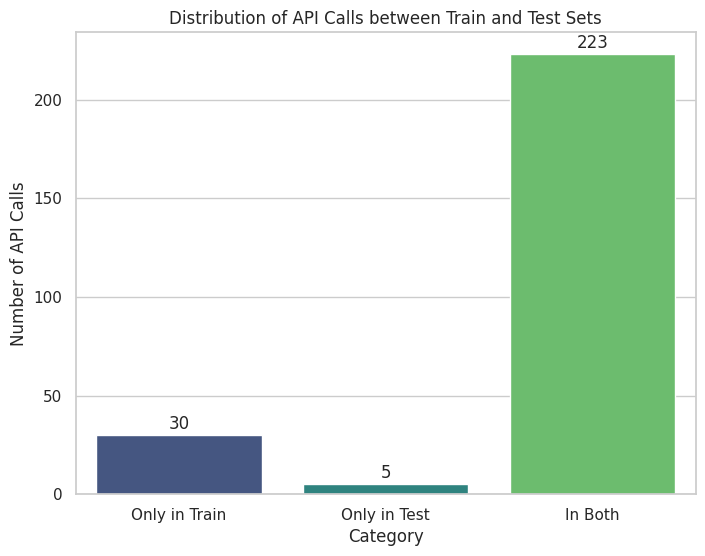

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Merge the two DataFrames on the 'api_call' column
# -------------------------------
merged_df = pd.merge(train_api_call_df, test_api_call_df, on='api_call', how='outer', suffixes=('_train', '_test'))

# Replace missing values with 0 (for API calls not present in one of the sets)
merged_df['count_train'] = merged_df['count_train'].fillna(0).astype(int)
merged_df['count_test'] = merged_df['count_test'].fillna(0).astype(int)

# Calculate the difference between train and test counts
merged_df['count_diff'] = merged_df['count_train'] - merged_df['count_test']

# Sort by the absolute difference to highlight the API calls with the most difference
merged_df = merged_df.sort_values(by='count_diff', key=lambda x: abs(x), ascending=False)

print("Merged DataFrame (with count differences):")
print(merged_df)

# -------------------------------
# Identify API calls exclusive to train and test
# -------------------------------
# API calls only in the train set
train_only = train_api_call_df[~train_api_call_df['api_call'].isin(test_api_call_df['api_call'])]
print("\nAPI calls only in the train set:\n", train_only)

# API calls only in the test set
test_only = test_api_call_df[~test_api_call_df['api_call'].isin(train_api_call_df['api_call'])]
print("\nAPI calls only in the test set:\n", test_only)

# -------------------------------
# Summary counts of API calls in each category
# -------------------------------
n_train_only = train_only.shape[0]
n_test_only = test_only.shape[0]
n_in_both = merged_df[(merged_df['count_train'] > 0) & (merged_df['count_test'] > 0)].shape[0]

print("\nNumber of API calls only in train: {}".format(n_train_only))
print("Number of API calls only in test: {}".format(n_test_only))
print("Number of API calls present in both sets: {}".format(n_in_both))

# -------------------------------
# Bar Plot: Distribution of API calls across Train and Test sets
# -------------------------------
categories = ['Only in Train', 'Only in Test', 'In Both']
counts = [n_train_only, n_test_only, n_in_both]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette='viridis')
plt.title("Distribution of API Calls between Train and Test Sets")
plt.ylabel("Number of API Calls")
plt.xlabel("Category")
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)
plt.show()


In [ ]:
!pip install numpy
!pip install gensim
!pip install --upgrade numpy
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!pip install numpy --upgrade
!pip install --upgrade gensim

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# Pre-Processing


In [ ]:
# ===============================
# 1. Load Libraries and Data
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import CountVectorizer

# -------------------------------
# Load the training and test datasets.
# columns:'md5hash', 'api_call_sequence', and 'is_malware'
# -------------------------------
train_df = pd.read_json('train.json')
test_df  = pd.read_json('test.json')

# If the 'api_call_sequence' column is stored as string representation of a list, convert it:
def convert_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return x.split()  # fallback split if different formatting
    return x

train_df['api_call_sequence'] = train_df['api_call_sequence'].apply(convert_to_list)
test_df['api_call_sequence']  = test_df['api_call_sequence'].apply(convert_to_list)


print("Columns in Train before dropping 'md5hash':", train_df.columns)
print("Columns in Test before dropping 'md5hash':", test_df.columns)

# Drop the md5hash column as it is an identifier and not needed for feature representation
train_df = train_df.drop('md5hash', axis=1)
test_df  = test_df.drop('md5hash', axis=1)

print("Columns in Train after dropping 'md5hash':", train_df.columns)
print("Columns in Test after dropping 'md5hash':", test_df.columns)


# Check for duplicates in the training set
# Convert the 'api_call_sequence' column to tuples before checking for duplicates
duplicates_train = train_df.apply(lambda row: tuple(row['api_call_sequence']), axis=1).duplicated()
num_duplicates_train = duplicates_train.sum()
print(f"Number of duplicate rows in Train: {num_duplicates_train}")

# Remove duplicates from train set
train_df = train_df[~duplicates_train]  # Using the boolean series to filter
print("Train DataFrame shape after removing duplicates:", train_df.shape)

# Check for duplicates in the test set
# Convert the 'api_call_sequence' column to tuples before checking for duplicates
duplicates_test = test_df.apply(lambda row: tuple(row['api_call_sequence']), axis=1).duplicated()
num_duplicates_test = duplicates_test.sum()
print(f"Number of duplicate rows in Test: {num_duplicates_test}")

# Remove duplicates from test set
test_df = test_df[~duplicates_test]  # Using the boolean series to filter
print("Test DataFrame shape after removing duplicates:", test_df.shape)

Columns in Train before dropping 'md5hash': Index(['md5hash', 'api_call_sequence', 'is_malware'], dtype='object')
Columns in Test before dropping 'md5hash': Index(['md5hash', 'api_call_sequence', 'is_malware'], dtype='object')
Columns in Train after dropping 'md5hash': Index(['api_call_sequence', 'is_malware'], dtype='object')
Columns in Test after dropping 'md5hash': Index(['api_call_sequence', 'is_malware'], dtype='object')
Number of duplicate rows in Train: 17875
Train DataFrame shape after removing duplicates: (12838, 2)
Number of duplicate rows in Test: 5814
Test DataFrame shape after removing duplicates: (7349, 2)


Sequence length statistics (Train):
count    12838.000000
mean        76.198629
std          8.852374
min         60.000000
25%         69.000000
50%         77.000000
75%         84.000000
max         90.000000
Name: seq_length, dtype: float64


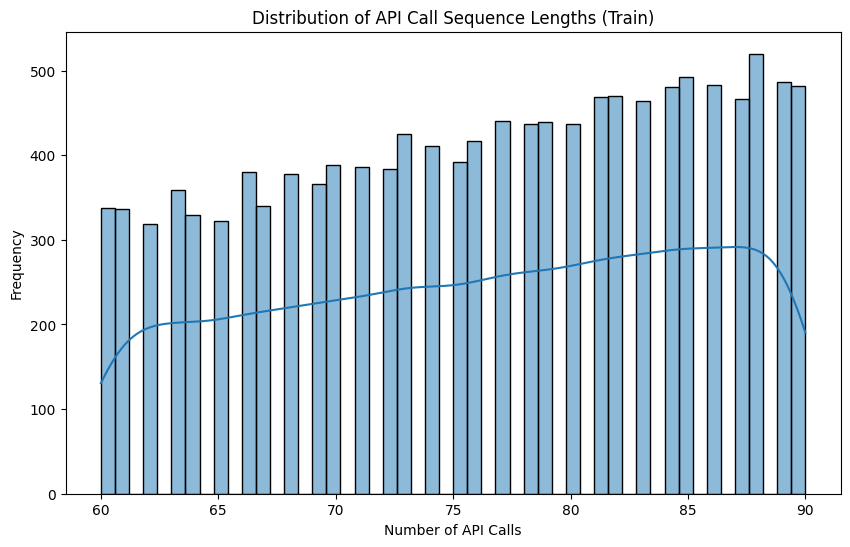

Top 10 most common API calls:
[('LdrGetProcedureAddress', 170727), ('LdrLoadDll', 93285), ('LdrGetDllHandle', 76014), ('NtClose', 56947), ('NtAllocateVirtualMemory', 49266), ('RegOpenKeyExW', 41627), ('RegCloseKey', 39325), ('RegQueryValueExW', 31672), ('NtQueryValueKey', 26944), ('NtOpenKey', 26626)]
Vocabulary size: 254
Missing values in Train:
api_call_sequence    0
is_malware           0
seq_length           0
dtype: int64
Missing values in Test:
api_call_sequence    0
is_malware           0
dtype: int64
Preprocessing pipeline complete!


In [ ]:

# Compute and plot distribution of sequence lengths in the training set
train_df['seq_length'] = train_df['api_call_sequence'].apply(len)
print("Sequence length statistics (Train):")
print(train_df['seq_length'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(train_df['seq_length'], bins=50, kde=True)
plt.title("Distribution of API Call Sequence Lengths (Train)")
plt.xlabel("Number of API Calls")
plt.ylabel("Frequency")
plt.show()


from collections import Counter

# Extract all API calls from the training set
all_calls = [api for seq in train_df['api_call_sequence'] for api in seq]
call_counter = Counter(all_calls)
print("Top 10 most common API calls:")
print(call_counter.most_common(10))

# Build a vocabulary list and add a special <UNK> token for out-of-vocabulary API calls.
vocab = list(call_counter.keys())
vocab.append("<UNK>")
print("Vocabulary size:", len(vocab))

# Create a mapping: API call -> integer ID
api_to_int = {api: idx for idx, api in enumerate(vocab, start=1)}
int_to_api = {idx: api for api, idx in api_to_int.items()}




# Check for Missing Values:

print("Missing values in Train:")
print(train_df.isnull().sum())
print("Missing values in Test:")
print(test_df.isnull().sum())


print("Preprocessing pipeline complete!")


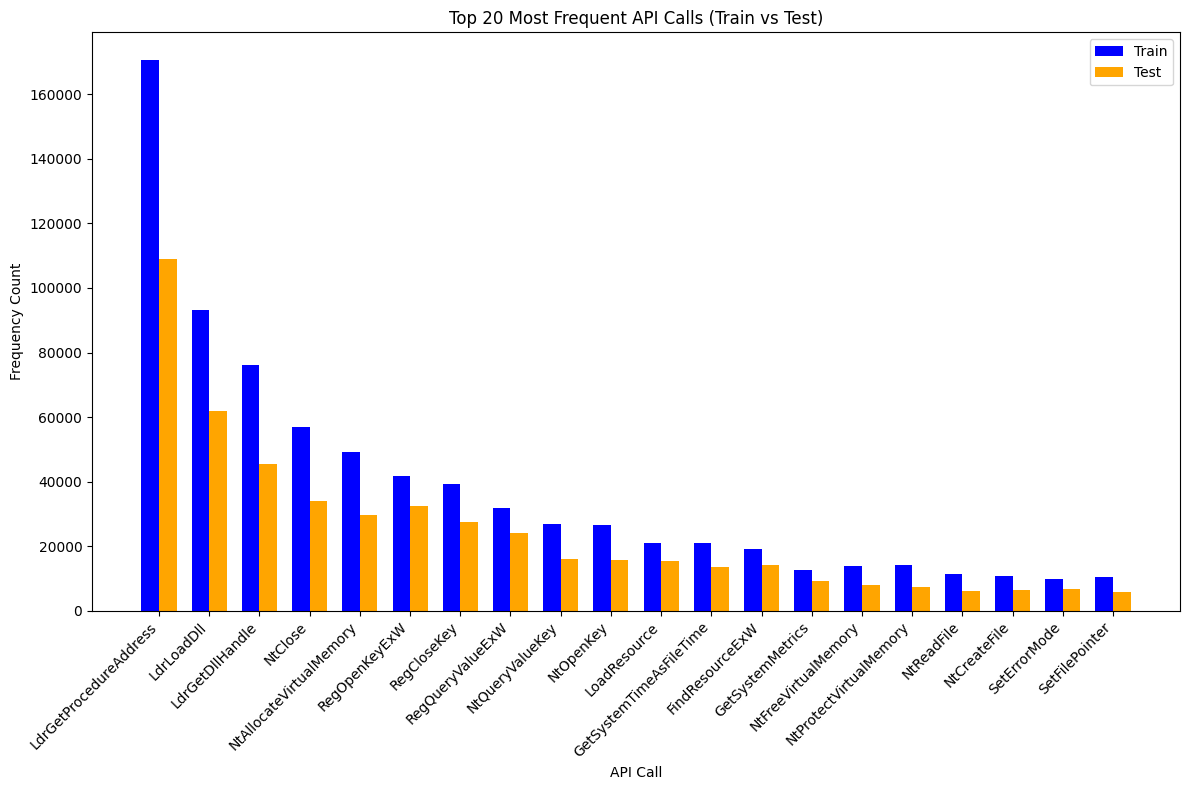

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


# Calculate the frequency of each API call in the Train dataset
train_calls = [api for seq in train_df['api_call_sequence'] for api in seq]
train_counter = Counter(train_calls)
train_freq_df = pd.DataFrame(list(train_counter.items()), columns=['api_call', 'count_train'])

# Calculate the frequency of each API call in the Test dataset
test_calls = [api for seq in test_df['api_call_sequence'] for api in seq]
test_counter = Counter(test_calls)
test_freq_df = pd.DataFrame(list(test_counter.items()), columns=['api_call', 'count_test'])

# Merge the two DataFrames on API calls (using an outer join to include all)
freq_df = pd.merge(train_freq_df, test_freq_df, on='api_call', how='outer').fillna(0)
freq_df['count_train'] = freq_df['count_train'].astype(int)
freq_df['count_test'] = freq_df['count_test'].astype(int)

# To compare, sort by the total (train + test) and select, for example, the top 20 API calls
freq_df['total'] = freq_df['count_train'] + freq_df['count_test']
freq_df = freq_df.sort_values(by='total', ascending=False)
topN = 20
top_freq_df = freq_df.head(topN)

# Visualization: bar chart of the most frequent API calls, split by Train and Test
plt.figure(figsize=(12,8))
indices = range(len(top_freq_df))
width = 0.35

plt.bar([i - width/2 for i in indices], top_freq_df['count_train'], width=width, color='blue', label='Train')
plt.bar([i + width/2 for i in indices], top_freq_df['count_test'], width=width, color='orange', label='Test')

plt.xticks(indices, top_freq_df['api_call'], rotation=45, ha='right')
plt.xlabel("API Call")
plt.ylabel("Frequency Count")
plt.title("Top 20 Most Frequent API Calls (Train vs Test)")
plt.legend()
plt.tight_layout()
plt.show()


Shape of CountVectorizer representation (Train): (12838, 253)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


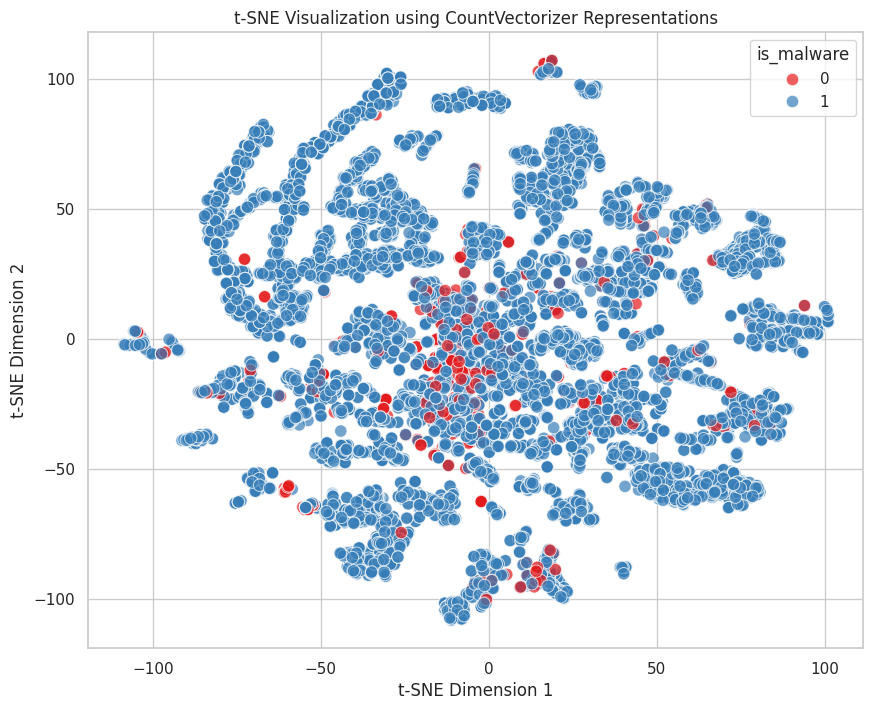

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE


# Here, we join each list of API calls into a single string with space-separated tokens.
train_df['api_call_sequence_str'] = train_df['api_call_sequence'].apply(lambda x: ' '.join(x))


# Initialize the CountVectorizer with a custom tokenizer to avoid additional tokenization if needed.
# Here, since our sequence is already joined as a string, the default tokenizer works well.
vectorizer = CountVectorizer(lowercase=False)
# Fit the vectorizer on the training API call sequences (strings) and transform them into count vectors.
X_train_sparse = vectorizer.fit_transform(train_df['api_call_sequence_str'])
print("Shape of CountVectorizer representation (Train):", X_train_sparse.shape)

# For t-SNE, we need a dense matrix.
X_train_dense = X_train_sparse.toarray()


# We apply t-SNE on the high-dimensional count vectors to reduce them to 2D.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_dense)

# Create a DataFrame for the t-SNE output to ease plotting.
tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
# Include the class label in the DataFrame for coloring the points.
tsne_df['is_malware'] = train_df['is_malware'].values

# Visualizie t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='is_malware',
                palette='Set1', alpha=0.7, s=80)
plt.title("t-SNE Visualization using CountVectorizer Representations")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="is_malware", loc='best')
plt.show()


Task 1: BoW Approaches

 Each sequence of processes is a string, all the processes are words in a centence–> Fit a
 CountVectorizer object from sklearn!

 • How many columns do you have after applying the CountVectorizer? What does that
 number represent?

 • What does each row represent? Can you still track the order of the processes (how they
 were called)?

 • Doyou have out-of-vocabulary from the test set? If yes, how many? How does CountVec
torizer handle them?

 • Try to fit a classifier (at your choice, shallow deep or neural network). Report how you
 chose the hyperparameters of your classifier, and the final performance on the test set.

## First-try with CountVectorizer, simple Logistic Regression Classifier

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.30      0.42       250
           1       0.98      1.00      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.83      0.65      0.70      7349
weighted avg       0.97      0.97      0.97      7349

Confusion Matrix:
 [[  76  174]
 [  34 7065]]
Top malware indicators:
CryptCreateHash: 3.0204
CryptHashData: 3.0191
GetAdaptersInfo: 2.9354
GetDiskFreeSpaceW: 1.8709
GlobalMemoryStatus: 1.2883
RegSetValueExA: 1.2728
CryptDecrypt: 1.2727
__exception__: 1.2297
SetWindowsHookExA: 1.1739
InternetOpenA: 1.0550

Top benign indicators:
WriteConsoleW: -2.0612
CoInitializeSecurity: -1.7804
GlobalMemoryStatusEx: -1.6148
NtTerminateProcess: -1.4960
SetWindowsHookExW: -1.3192
CryptAcquireContextA: -1.0758
NtCreateKey: -1.0661
bind: -1.0492
RegEnumKeyExA: -1.0034
MessageBoxTimeoutW: -1.0017


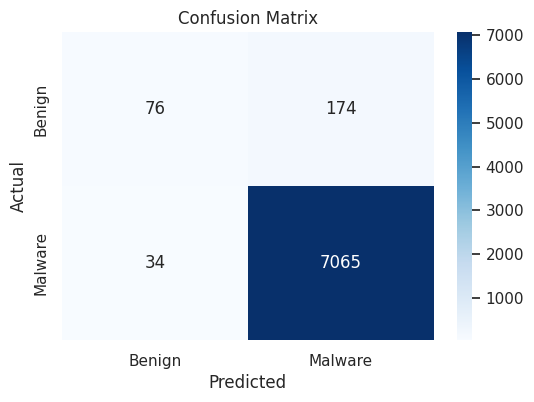

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Conversion of the 'api_call_sequence' column (list) to a string, joining tokens with a space
train_df['api_call_sequence_str'] = train_df['api_call_sequence'].apply(lambda x: ' '.join(x))
test_df['api_call_sequence_str'] = test_df['api_call_sequence'].apply(lambda x: ' '.join(x))

# Create the matrix with CountVectorizer (considering lowercase=False to preserve original format if important)
vectorizer = CountVectorizer(lowercase=False)
X_train_sparse = vectorizer.fit_transform(train_df['api_call_sequence_str'])
X_test_sparse = vectorizer.transform(test_df['api_call_sequence_str'])

y_train = train_df['is_malware']
y_test = test_df['is_malware']

# Train a simple classifier, in this case Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sparse, y_train)

# Evaluate performance on the test set
y_pred = clf.predict(X_test_sparse)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Extract coefficients to identify which API calls most influence the prediction
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.coef_[0]

# Positive coefficients indicate API calls that push towards the malware class,
# negative ones towards the benign class.
# Sort the coefficients to extract, the top 10 indicators most associated with each class.
top_malware_indices = np.argsort(coefficients)[-10:]  # highest
top_benign_indices = np.argsort(coefficients)[:10]    # lowest

print("Top malware indicators:")
for i in reversed(top_malware_indices):
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

print("\nTop benign indicators:")
for i in top_benign_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

# Display a heatmap of the Confusion Matrix for an immediate view of performance
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Classifier (Logistic Regression) with Hyperparameter Tuning

Number of columns (vocabulary size): 253
Training vocabulary size: 253
Number of out-of-vocabulary API calls in the test set: 5
Best parameters: {'C': 10}
Test Accuracy: 0.9712
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.34      0.44       250
           1       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.81      0.66      0.71      7349
weighted avg       0.97      0.97      0.97      7349



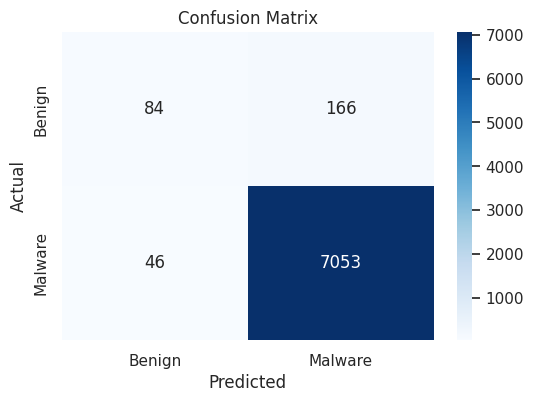

Top malware indicators:
GetAdaptersInfo: 7.2837
CryptCreateHash: 4.7660
CryptHashData: 4.7647
GetDiskFreeSpaceW: 4.4659
StartServiceW: 4.3432
CryptDecrypt: 2.9723
MoveFileWithProgressW: 2.7312
GetDiskFreeSpaceExW: 2.6313
socket: 2.4990
CreateServiceW: 2.4556

Top benign indicators:
WriteConsoleW: -4.7352
RegDeleteValueW: -4.2438
WSASocketW: -3.7696
Module32FirstW: -2.9781
RegEnumValueA: -2.6758
GetUserNameExW: -2.6261
bind: -2.4085
CoInitializeSecurity: -2.3507
NtTerminateProcess: -2.2358
setsockopt: -2.0574


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix




# Each sequence is a list of API calls. We join them to form a single string per sample.
train_df['api_call_sequence_str'] = train_df['api_call_sequence'].apply(lambda x: ' '.join(x))
test_df['api_call_sequence_str'] = test_df['api_call_sequence'].apply(lambda x: ' '.join(x))



vectorizer = CountVectorizer(lowercase=False)
X_train_sparse = vectorizer.fit_transform(train_df['api_call_sequence_str'])
X_test_sparse = vectorizer.transform(test_df['api_call_sequence_str'])


vocab_size = len(vectorizer.get_feature_names_out())
print("Number of columns (vocabulary size):", vocab_size)
# This number represents the unique API calls in the training set.

# Note:
# Each row in X_train_sparse represents one API call sequence transformed into a vector of counts.
# The order of calls is lost in this representation.


# Count API calls in training set
train_calls = [api for seq in train_df['api_call_sequence'] for api in seq]
train_counter = Counter(train_calls)
print("Training vocabulary size:", len(train_counter))

# Count API calls in test set
test_calls = [api for seq in test_df['api_call_sequence'] for api in seq]
test_counter = Counter(test_calls)

# Identify tokens in test that are not in train vocabulary
oov = [api for api in test_counter if api not in train_counter]
print("Number of out-of-vocabulary API calls in the test set:", len(oov))
# CountVectorizer ignores these tokens when transforming the test set (they have count = 0)

# fitting a Logistic Regressor
y_train = train_df['is_malware']
y_test = test_df['is_malware']

param_grid = {"C": [0.01, 0.1, 1, 10]}
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)
clf.fit(X_train_sparse, y_train)

print(f"Best parameters: {clf.best_params_}")

# Evaluate on the test set
accuracy = clf.score(X_test_sparse, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Get detailed classification report and confusion matrix
y_pred = clf.predict(X_test_sparse)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'],
            yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# See what are the most importan API to predict malicious or benign
feature_names = vectorizer.get_feature_names_out()
coefficients = clf.best_estimator_.coef_[0]

# API calls with highest coefficients drive the prediction towards malware, and vice versa.
top_malware_indices = np.argsort(coefficients)[-10:]
top_benign_indices = np.argsort(coefficients)[:10]

print("Top malware indicators:")
for i in reversed(top_malware_indices):
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

print("\nTop benign indicators:")
for i in top_benign_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")


ROC AUC Score: 0.9012


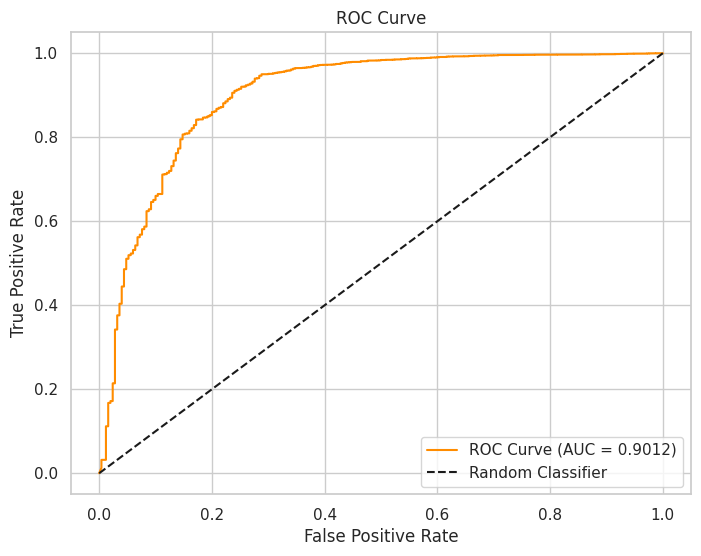

Precision-Recall AUC: 0.9942


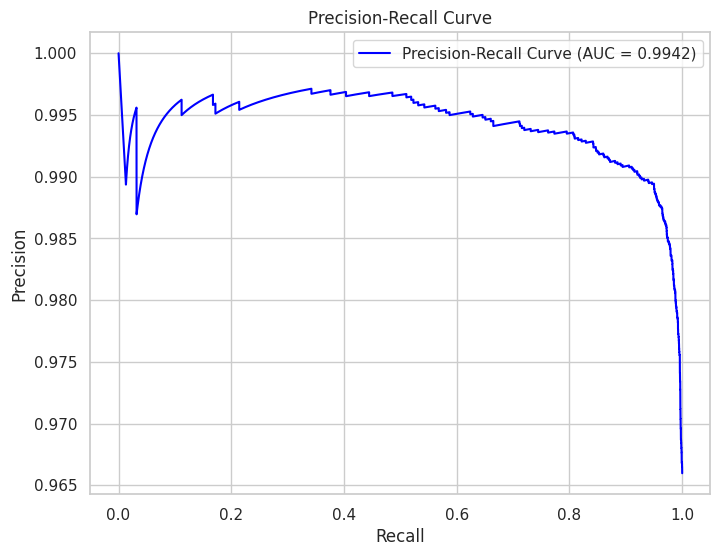

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc


y_proba = clf.predict_proba(X_test_sparse)[:,1]

#  ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# values for ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#  Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

Precision-Recall AUC for Benign class: 0.4465


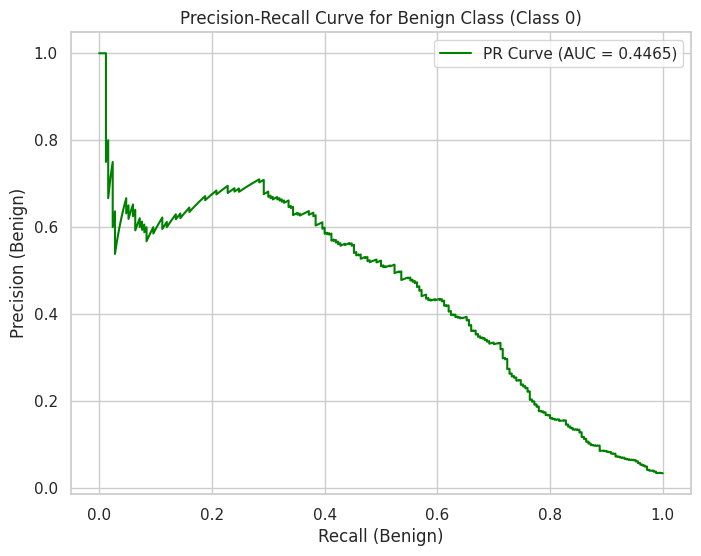

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


y_proba_benign = 1 - clf.predict_proba(X_test_sparse)[:, 1]

y_test_benign = (y_test == 0).astype(int)


precision_benign, recall_benign, thresholds_benign = precision_recall_curve(y_test_benign, y_proba_benign)

#  (AUC)
pr_auc_benign = auc(recall_benign, precision_benign)
print(f"Precision-Recall AUC for Benign class: {pr_auc_benign:.4f}")

# Precision-Recall curve for Benign class
plt.figure(figsize=(8, 6))
plt.plot(recall_benign, precision_benign, color='green', label=f'PR Curve (AUC = {pr_auc_benign:.4f})')
plt.xlabel("Recall (Benign)")
plt.ylabel("Precision (Benign)")
plt.title("Precision-Recall Curve for Benign Class (Class 0)")
plt.legend(loc="upper right")
plt.show()


## Classifier using LogisticRegression with class_weight='balanced'

Best parameters: {'C': 1}
Test Accuracy: 0.9718
Classification Report with class_weight='balanced':
               precision    recall  f1-score   support

           0       0.69      0.32      0.43       250
           1       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.83      0.66      0.71      7349
weighted avg       0.97      0.97      0.97      7349



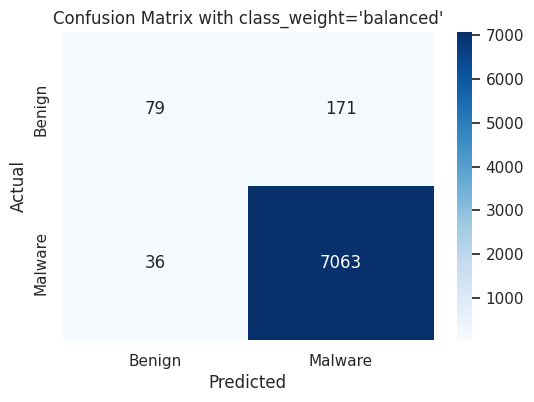

ROC AUC Score: 0.8960


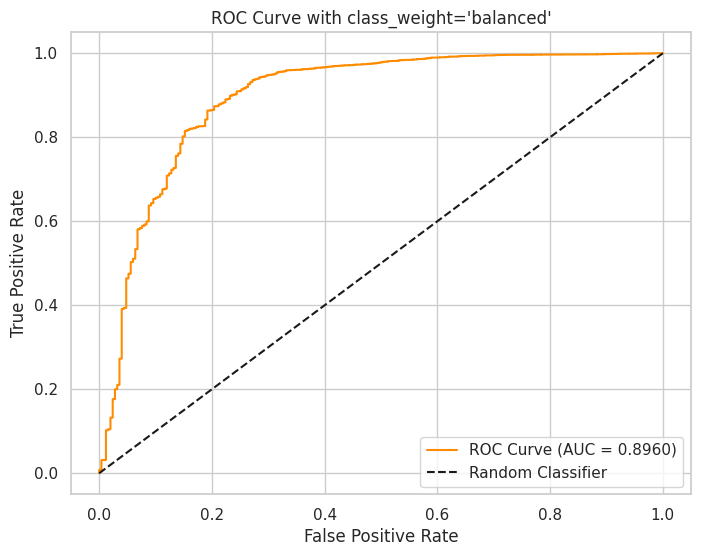

Precision-Recall AUC: 0.9937


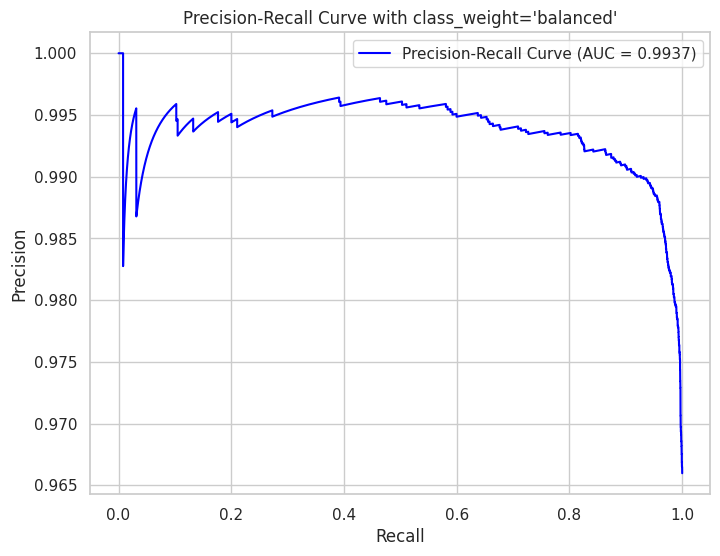

In [ ]:

class_weight={0: 1.0, 1: 0.9}

param_grid = {"C": [0.01, 0.1, 1, 10]}
clf = GridSearchCV(
    LogisticRegression(max_iter=1000, solver='liblinear', class_weight=class_weight),
    param_grid,
    cv=3
)
clf.fit(X_train_sparse, y_train)

print(f"Best parameters: {clf.best_params_}")
accuracy = clf.score(X_test_sparse, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


y_pred = clf.predict(X_test_sparse)
print("Classification Report with class_weight='balanced':\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with class_weight='balanced'")
plt.show()


y_proba = clf.predict_proba(X_test_sparse)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with class_weight='balanced'")
plt.legend(loc="lower right")
plt.show()

# Calcola e visualizza la Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with class_weight='balanced'")
plt.legend(loc="upper right")
plt.show()

## Bag-of-Words with TF-IDF and Logistic Regression

Vocabulary size: 7851
Best hyperparameter C: 10


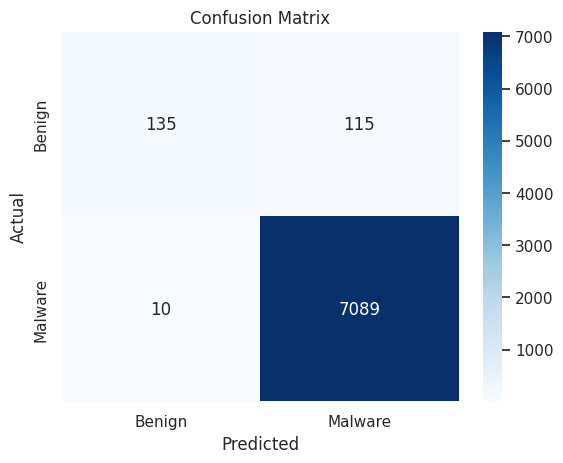

Classification Report:

              precision    recall  f1-score   support

      Benign       0.93      0.54      0.68       250
     Malware       0.98      1.00      0.99      7099

    accuracy                           0.98      7349
   macro avg       0.96      0.77      0.84      7349
weighted avg       0.98      0.98      0.98      7349



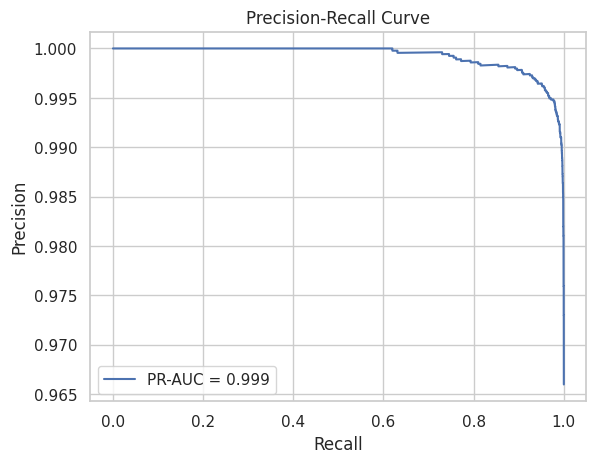

F1-macro : 0.8374024392510379
ROC-AUC  : 0.9805876884068178
PR-AUC   : 0.9992476011317547

 Top indicators of MALWARE:
GetSystemMetrics NtAllocateVirtualMemory LdrLoadDll  +7.6885
LdrGetProcedureAddress NtClose NtDuplicateObject  +5.6228
NtDuplicateObject RegOpenKeyExW  +4.7791
NtClose NtDuplicateObject RegOpenKeyExW  +4.7686
NtDelayExecution           +4.6795
NtDuplicateObject RegOpenKeyExW RegCloseKey  +4.2000
LdrGetProcedureAddress GetSystemTimeAsFileTime SetUnhandledExceptionFilter  +4.1696
GetTempPathW               +4.1510
SetUnhandledExceptionFilter NtAllocateVirtualMemory GetSystemMetrics  +3.9809
NtAllocateVirtualMemory LdrLoadDll LdrGetProcedureAddress  +3.9368

 Top indicators of BENIGN:
GetSystemMetrics NtAllocateVirtualMemory GetSystemMetrics  -13.3707
NtAllocateVirtualMemory GetSystemMetrics LdrLoadDll  -11.4655
GetSystemTimeAsFileTime SetUnhandledExceptionFilter  -10.8521
GetSystemMetrics LdrLoadDll LdrGetProcedureAddress  -6.7487
GetSystemMetrics LdrLoadDll  -6.6302
Ldr

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, precision_recall_curve, auc, roc_auc_score)
sns.set_theme(style="whitegrid")

# Convert list of API calls into space-separated strings
train_df["api_call_sequence_str"] = train_df["api_call_sequence"].apply(" ".join)
test_df["api_call_sequence_str"]  = test_df["api_call_sequence"].apply(" ".join)

X_train_str = train_df["api_call_sequence_str"]
X_test_str  = test_df["api_call_sequence_str"]
y_train = train_df["is_malware"]
y_test  = test_df["is_malware"]

# Convert list of API calls into space-separated strings
train_df["api_call_sequence_str"] = train_df["api_call_sequence"].apply(" ".join)
test_df["api_call_sequence_str"]  = test_df["api_call_sequence"].apply(" ".join)

X_train_str = train_df["api_call_sequence_str"]
X_test_str  = test_df["api_call_sequence_str"]
y_train = train_df["is_malware"]
y_test  = test_df["is_malware"]

# Use TF-IDF with uni + tri-grams (1,2), drop very rare tokens
vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,3), min_df=5)
X_train_tfidf = vectorizer.fit_transform(X_train_str)
X_test_tfidf  = vectorizer.transform(X_test_str)

print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")


clf = LogisticRegression(max_iter=2000, solver="liblinear")

param_grid = {"C": [0.01, 0.1, 1, 3, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(clf, param_grid, scoring="f1_macro", cv=cv, n_jobs=1, return_train_score=True)
grid.fit(X_train_tfidf, y_train)

print("Best hyperparameter C:", grid.best_params_["C"])

# Predict and evaluate
y_proba = grid.predict_proba(X_test_tfidf)[:,1]
y_pred  = (y_proba >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malware"],
            yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Confusion Matrix"); plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malware"]))

# Precision-Recall curve
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(rec, prec)

plt.plot(rec, prec, label=f"PR-AUC = {pr_auc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend(); plt.show()

# Print metrics
print("F1-macro :", f1_score(y_test, y_pred, average="macro"))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("PR-AUC   :", pr_auc)

# Extract top-weighted features (coefficients)
feature_names = vectorizer.get_feature_names_out()
coef = grid.best_estimator_.coef_[0]

top_malware = np.argsort(coef)[-10:][::-1]
top_benign  = np.argsort(coef)[:10]

print("\n Top indicators of MALWARE:")
for i in top_malware:
    print(f"{feature_names[i]:25s}  {coef[i]:+.4f}")

print("\n Top indicators of BENIGN:")
for i in top_benign:
    print(f"{feature_names[i]:25s}  {coef[i]:+.4f}")


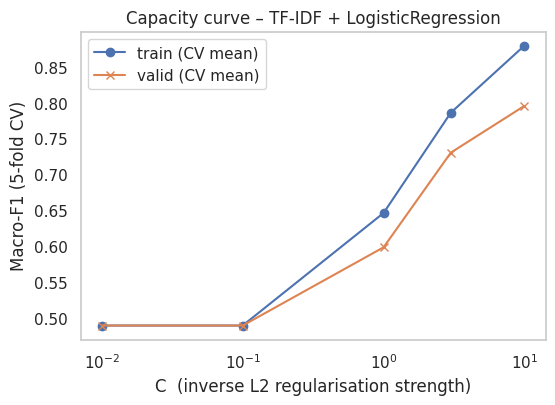

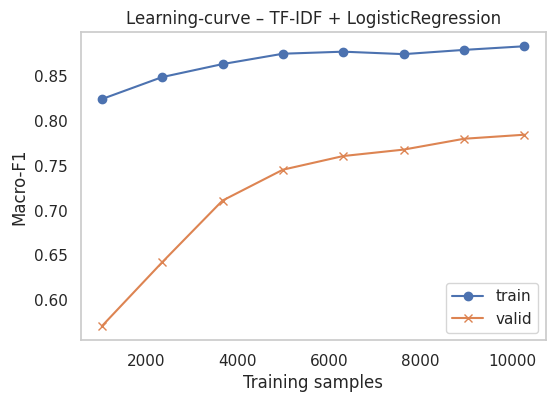

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


C_vals        = grid.cv_results_['param_C'].data.astype(float)
train_scores  = grid.cv_results_['mean_train_score']
valid_scores  = grid.cv_results_['mean_test_score']

plt.figure(figsize=(6,4))
plt.semilogx(C_vals, train_scores, marker='o', label='train (CV mean)')
plt.semilogx(C_vals, valid_scores, marker='x', label='valid (CV mean)')
plt.xlabel("C  (inverse L2 regularisation strength)")
plt.ylabel("Macro-F1 (5-fold CV)")
plt.title("Capacity curve – TF-IDF + LogisticRegression")
plt.grid(); plt.legend(); plt.show()


from sklearn.model_selection import learning_curve


# Build a model with the optimal hyperparameter found


best_lr = LogisticRegression(C=grid.best_params_["C"],
                             max_iter=2000,
                             solver="liblinear")
train_sizes, train_scores_lc, valid_scores_lc = learning_curve(
        estimator=best_lr,
        X=X_train_tfidf, y=y_train,
        train_sizes=np.linspace(0.1, 1.0, 8),
        cv=5, scoring='f1_macro', n_jobs=1, shuffle=True, random_state=42)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores_lc.mean(axis=1), marker='o', label='train')
plt.plot(train_sizes, valid_scores_lc.mean(axis=1), marker='x', label='valid')
plt.xlabel("Training samples"); plt.ylabel("Macro-F1")
plt.title("Learning-curve – TF-IDF + LogisticRegression")
plt.grid(); plt.legend(); plt.show()


## further experiments


F1 (1,3): 0.713864408428819
ROC-AUC : 0.9767172841245245


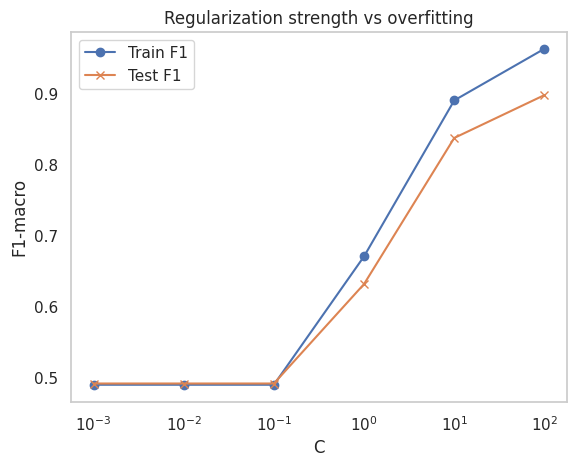

ngram  F1_macro    PR_AUC
0  (1, 1)  0.572277  0.996284
1  (1, 2)  0.660516  0.998717
2  (1, 3)  0.713864  0.999110

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vect_13 = TfidfVectorizer(lowercase=False, ngram_range=(1,3), min_df=5)
X_tr_13 = vect_13.fit_transform(train_df["api_call_sequence_str"])
X_te_13 = vect_13.transform(test_df["api_call_sequence_str"])

clf_13 = LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')
clf_13.fit(X_tr_13, y_train)

y_pred_13 = clf_13.predict(X_te_13)
y_proba_13 = clf_13.predict_proba(X_te_13)[:,1]

print("F1 (1,3):", f1_score(y_test, y_pred_13, average="macro"))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_13))

import matplotlib.pyplot as plt

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = [], []

for C in C_values:
    clf = LogisticRegression(C=C,
                             max_iter=2000, solver='liblinear')
    clf.fit(X_tr_13, y_train)
    train_pred = clf.predict(X_tr_13)
    test_pred  = clf.predict(X_te_13)
    train_scores.append(f1_score(y_train, train_pred, average='macro'))
    test_scores.append(f1_score(y_test,  test_pred,  average='macro'))

plt.plot(C_values, train_scores, label='Train F1', marker='o')
plt.plot(C_values, test_scores, label='Test F1', marker='x')
plt.xscale('log'); plt.xlabel('C'); plt.ylabel('F1-macro')
plt.title('Regularization strength vs overfitting')
plt.legend(); plt.grid(); plt.show()

results = []

for ngram in [(1,1), (1,2), (1,3)]:
    vec = TfidfVectorizer(lowercase=False, ngram_range=ngram, min_df=5)
    X_tr = vec.fit_transform(train_df["api_call_sequence_str"])
    X_te = vec.transform(test_df["api_call_sequence_str"])

    clf = LogisticRegression(class_weight='balanced', max_iter=2000, solver='liblinear')
    clf.fit(X_tr, y_train)
    y_pred = clf.predict(X_te)
    y_proba = clf.predict_proba(X_te)[:,1]

    f1 = f1_score(y_test, y_pred, average="macro")
    pr = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(pr[1], pr[0])

    results.append((f"{ngram}", f1, pr_auc))

pd.DataFrame(results, columns=["ngram", "F1_macro", "PR_AUC"])


Vocabulary size : 253

--- Decision Tree ---
Best params : {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


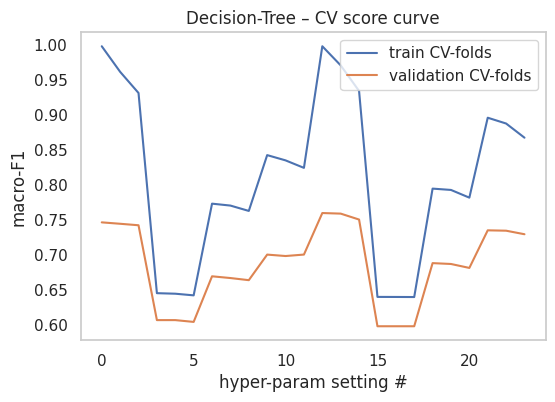

              precision    recall  f1-score   support

           0       0.59      0.53      0.56       250
           1       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.79      0.76      0.77      7349
weighted avg       0.97      0.97      0.97      7349



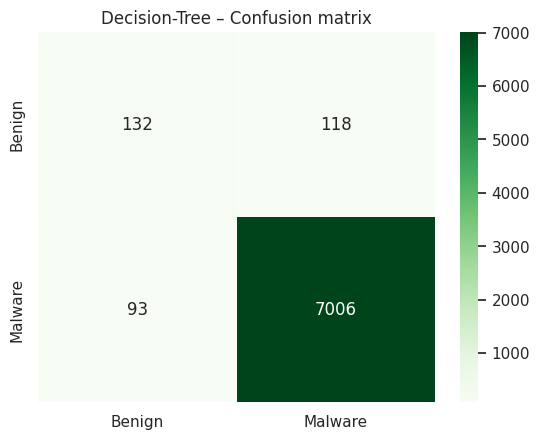


--- MLP grid search ---
Best params: {'activation': 'tanh', 'alpha': 0.001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'n_iter_no_change': 10, 'solver': 'adam'}
Ep 001  train=0.1310  val=0.1321


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 002  train=0.1061  val=0.1151


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 003  train=0.0926  val=0.1082


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 004  train=0.0840  val=0.1049


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 005  train=0.0781  val=0.1029


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 006  train=0.0737  val=0.1016


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 007  train=0.0702  val=0.1008


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 008  train=0.0674  val=0.1003


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 009  train=0.0650  val=0.0999


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 010  train=0.0629  val=0.0996


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 011  train=0.0611  val=0.0994


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 012  train=0.0594  val=0.0993


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 013  train=0.0579  val=0.0991


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 014  train=0.0564  val=0.0990


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 015  train=0.0551  val=0.0990


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 016  train=0.0538  val=0.0990


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 017  train=0.0526  val=0.0990
Ep 018  train=0.0514  val=0.0990


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 019  train=0.0503  val=0.0991
Ep 020  train=0.0492  val=0.0992


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 021  train=0.0482  val=0.0992
Ep 022  train=0.0472  val=0.0993


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 023  train=0.0463  val=0.0994
Ep 024  train=0.0454  val=0.0994


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 025  train=0.0445  val=0.0995
Ep 026  train=0.0437  val=0.0995


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 027  train=0.0429  val=0.0996
Ep 028  train=0.0421  val=0.0996


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 029  train=0.0413  val=0.0996
Ep 030  train=0.0406  val=0.0996


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Ep 031  train=0.0399  val=0.0996
early-stop


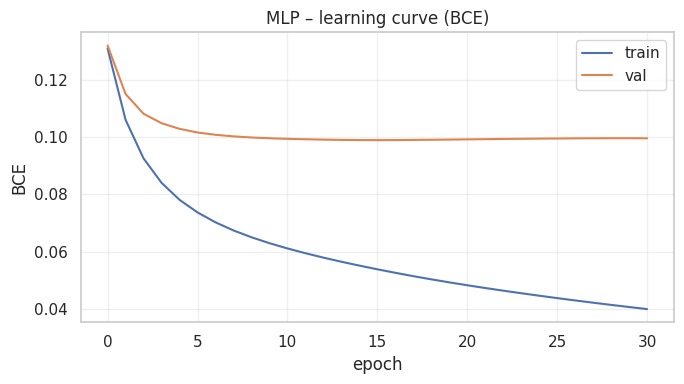

              precision    recall  f1-score   support

           0       0.79      0.44      0.57       250
           1       0.98      1.00      0.99      7099

    accuracy                           0.98      7349
   macro avg       0.88      0.72      0.78      7349
weighted avg       0.97      0.98      0.97      7349



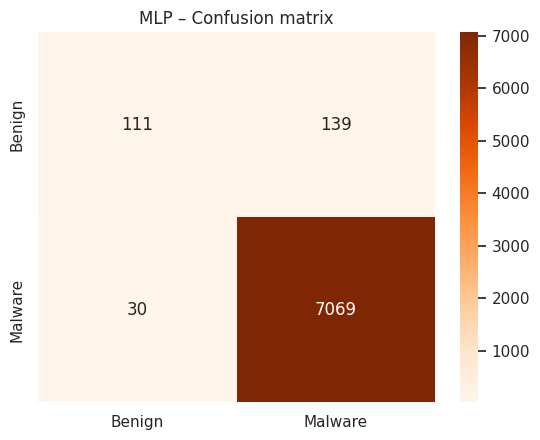


Accuracy  DT : 0.9712886106953327
Accuracy  MLP: 0.9770036739692475


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (log_loss, classification_report, confusion_matrix,
                             f1_score, precision_recall_curve, auc,
                             roc_auc_score, accuracy_score)

sns.set_theme(style="whitegrid")


train_df["api_call_sequence_str"] = train_df["api_call_sequence"].apply(" ".join)
test_df ["api_call_sequence_str"]  = test_df ["api_call_sequence"].apply(" ".join)

vec      = CountVectorizer(lowercase=False)
X_train  = vec.fit_transform(train_df["api_call_sequence_str"])
X_test   = vec.transform(test_df ["api_call_sequence_str"])
y_train  = train_df["is_malware"]
y_test   = test_df ["is_malware"]

print(f"Vocabulary size : {len(vec.get_feature_names_out())}")

# helper ─────────────────────────────────────────────────────────
def plot_loss(tr, va, title):
    plt.figure(figsize=(7,4))
    plt.plot(tr, lw=2, label="train")
    plt.plot(va, lw=2, label="val")
    plt.ylabel("BCE"); plt.xlabel("epoch / setting #")
    plt.title(title); plt.grid(alpha=.3); plt.legend(); plt.tight_layout()
    plt.show()

# parameter DT
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid_dt,
                       scoring="f1_macro",
                       cv=cv,
                       return_train_score=True,
                       n_jobs=1)
grid_dt.fit(X_train, y_train)

print("\n--- Decision Tree ---")
print("Best params :", grid_dt.best_params_)

# ── loss / score curve
mean_tr = grid_dt.cv_results_["mean_train_score"]
mean_va = grid_dt.cv_results_["mean_test_score"]
plt.figure(figsize=(6,4))
plt.plot(mean_tr, label="train CV-folds")
plt.plot(mean_va, label="validation CV-folds")
plt.ylabel("macro-F1"); plt.xlabel("hyper-param setting #")
plt.title("Decision-Tree – CV score curve")
plt.legend(); plt.grid(); plt.show()

# final test metrics
y_pred_dt = grid_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=["Benign","Malware"],
            yticklabels=["Benign","Malware"])
plt.title("Decision-Tree – Confusion matrix"); plt.show()


# split a validation fold out of *training* data
def plot_loss(tr, va, title):
    plt.figure(figsize=(7,4))
    plt.plot(tr, label="train")
    plt.plot(va, label="val")
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel("BCE")
    plt.legend(); plt.grid(alpha=0.3)
    plt.tight_layout(); plt.show()

# greed search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50,50)],
    "alpha"             : [1e-4, 1e-3, 1e-2],
    "activation"        : ["relu", "tanh"],
    "solver"            : ["adam"],
    "early_stopping"    : [True],
    "n_iter_no_change"  : [10],
    "max_iter"          : [500]
}

grid_mlp = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid_mlp,
    scoring="f1_macro",
    cv=cv,
    n_jobs=1
)
grid_mlp.fit(X_train, y_train)

print("\n--- MLP grid search ---")
print("Best params:", grid_mlp.best_params_)


X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.20,
    stratify=y_train,
    random_state=42
)

best_params = grid_mlp.best_params_
# override max_iter / early_stopping for manual loop
mlp = MLPClassifier(
    **{**best_params, **{"warm_start": True, "max_iter": 1, "early_stopping": False}},
    random_state=42
)

train_bce, val_bce = [], []
best_val, wait, patience, epochs = 1e9, 0, 15, 200

for ep in range(1, epochs+1):
    mlp.fit(X_tr, y_tr)                    # 1 epoch
    p_tr  = mlp.predict_proba(X_tr) [:,1]
    p_val = mlp.predict_proba(X_val)[:,1]

    tr_loss = log_loss(y_tr,  p_tr)
    va_loss = log_loss(y_val, p_val)
    train_bce.append(tr_loss)
    val_bce.append(va_loss)

    print(f"Ep {ep:03d}  train={tr_loss:.4f}  val={va_loss:.4f}")

    if va_loss < best_val:
        best_val, wait = va_loss, 0

        best_mlp = MLPClassifier(**{**best_params, **{"random_state":42}})
        best_mlp.fit(X_tr, y_tr)
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

plot_loss(train_bce, val_bce, "MLP – learning curve (BCE)")

# test evaluation
y_pred_mlp = best_mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
sns.heatmap(
    confusion_matrix(y_test, y_pred_mlp),
    annot=True, fmt="d", cmap="Oranges",
    xticklabels=["Benign","Malware"],
    yticklabels=["Benign","Malware"]
)
plt.title("MLP – Confusion matrix"); plt.show()

# quick comparison
print("\nAccuracy  DT :", accuracy_score(y_test, y_pred_dt))
print("Accuracy  MLP:", accuracy_score(y_test, y_pred_mlp))


# TASK-2


Task 2: Feed Forward Neural Network

 Now, obtain some stats on the number of processes called per sample.

 • Do you have the same number of calls for each sample? Is the training distribution the
 same as the test one? shorter than the testing ones.

 • Let’s say that you really want to use a simple FeedForward neural network to solve the
 problem. Can a Feedforward Neural Network handle a variable number of elements?
 Why?

 • Which technique do you adopt to bring everything to a fixed size during training? What
 happens if at test time you have more processes to handle?

 • Each process is actually a string: first solve the problem using sequential identifiers, then
 try using learnable embeddings. Use a FeedForward network on both cases. Report how
 you selected the hyper-parameters of your final model, and justify your choices. Can
 you obtain the same results for the two alternatives (sequential identifiers and learnable
 embeddings)?

 Articulate (report results, whether one training was longer/more unstable than the other,
 etc.)

- FFNN MODEL WITH O-PADDING


In [ ]:
def encode_seq(seq, mapping):
    return [mapping.get(token, mapping["<UNK>"]) for token in seq]

# Encode sequences in training and test sets
train_df['seq_encoded'] = train_df['api_call_sequence'].apply(lambda x: encode_seq(x, api_to_int))
test_df['seq_encoded']  = test_df['api_call_sequence'].apply(lambda x: encode_seq(x, api_to_int))

In [ ]:
train_df

api_call_sequence  is_malware  \
0      [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1   
1      [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1   
2      [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1   
3      [RegOpenKeyExA, NtOpenKey, NtQueryValueKey, Nt...           1   
4      [NtClose, NtOpenKey, NtQueryValueKey, NtClose,...           1   
...                                                  ...         ...   
30704  [SearchPathW, GetKeyState, FindResourceExW, Re...           1   
30705  [GetSystemTimeAsFileTime, LdrLoadDll, LdrGetPr...           1   
30706  [LdrLoadDll, LdrGetProcedureAddress, NtProtect...           1   
30708  [NtAllocateVirtualMemory, NtFreeVirtualMemory,...           1   
30711  [NtCreateFile, GetFileType, SetFilePointer, Nt...           1   

       seq_length                                        seq_encoded  
0              73  [1, 2, 3, 1, 2, 3, 1, 4, 5, 4, 5, 4, 5, 6, 7, ...  
1              88  [22, 11, 5, 11, 5, 4, 5, 4, 5, 23, 5, 24, 7, 1...  
2              79  [33, 2, 3, 1, 2, 3, 1, 34, 35, 7, 35, 4, 5, 4,...  
3              71  [33, 2, 3, 1, 2, 3, 1, 34, 35, 7, 35, 4, 5, 4,...  
4              63  [1, 2, 3, 1, 2, 3, 1, 4, 5, 4, 5, 4, 5, 6, 7, ...  
...           ...                                                ...  
30704          64  [92, 165, 18, 8, 11, 5, 38, 7, 5, 11, 5, 7, 24...  
30705          78  [22, 11, 5, 11, 5, 11, 5, 11, 5, 4, 5, 4, 5, 2...  
30706          84  [11, 5, 24, 7, 16, 35, 19, 11, 5, 7, 37, 7, 6,...  
30708          62  [7, 37, 7, 41, 7, 24, 5, 24, 5, 24, 59, 7, 24,...  
30711          77  [40, 41, 49, 50, 1, 2, 3, 1, 2, 3, 1, 11, 5, 3...  

[12838 rows x 4 columns]

In [ ]:

test_df.drop(columns=['api_call_sequence'], inplace=True)

In [ ]:
train_df.drop(columns=['api_call_sequence', 'seq_length'], inplace=True)
train_df

is_malware                                        seq_encoded
0               1  [1, 2, 3, 1, 2, 3, 1, 4, 5, 4, 5, 4, 5, 6, 7, ...
1               1  [22, 11, 5, 11, 5, 4, 5, 4, 5, 23, 5, 24, 7, 1...
2               1  [33, 2, 3, 1, 2, 3, 1, 34, 35, 7, 35, 4, 5, 4,...
3               1  [33, 2, 3, 1, 2, 3, 1, 34, 35, 7, 35, 4, 5, 4,...
4               1  [1, 2, 3, 1, 2, 3, 1, 4, 5, 4, 5, 4, 5, 6, 7, ...
...           ...                                                ...
30704           1  [92, 165, 18, 8, 11, 5, 38, 7, 5, 11, 5, 7, 24...
30705           1  [22, 11, 5, 11, 5, 11, 5, 11, 5, 4, 5, 4, 5, 2...
30706           1  [11, 5, 24, 7, 16, 35, 19, 11, 5, 7, 37, 7, 6,...
30708           1  [7, 37, 7, 41, 7, 24, 5, 24, 5, 24, 59, 7, 24,...
30711           1  [40, 41, 49, 50, 1, 2, 3, 1, 2, 3, 1, 11, 5, 3...

[12838 rows x 2 columns]

In [ ]:
test_df

is_malware                                        seq_encoded
0               1  [33, 2, 3, 1, 2, 3, 1, 34, 35, 7, 35, 4, 5, 4,...
1               1  [17, 11, 5, 1, 2, 3, 1, 2, 3, 1, 11, 5, 31, 40...
2               1  [1, 2, 3, 1, 2, 3, 1, 4, 5, 4, 5, 4, 5, 6, 7, ...
3               1  [22, 11, 5, 11, 5, 11, 5, 11, 5, 4, 5, 4, 5, 2...
4               1  [22, 7, 37, 7, 4, 5, 4, 7, 23, 7, 11, 5, 11, 5...
...           ...                                                ...
13146           1  [22, 11, 5, 11, 5, 4, 5, 23, 5, 19, 7, 11, 5, ...
13147           0  [22, 11, 5, 11, 5, 11, 5, 11, 5, 4, 5, 4, 5, 2...
13149           1  [22, 4, 5, 23, 7, 24, 5, 7, 37, 7, 28, 11, 5, ...
13158           1  [23, 7, 22, 26, 3, 1, 33, 38, 15, 26, 3, 1, 11...
13161           1  [22, 11, 5, 11, 5, 11, 5, 11, 5, 4, 5, 4, 5, 2...

[7349 rows x 2 columns]

In [ ]:
max_len = train_df['seq_encoded'].apply(len).max()
max_len

90

In [ ]:
max_len = test_df['seq_encoded'].apply(len).max()
max_len

100

In [ ]:
from keras.utils import pad_sequences

# Determine the maximum sequence length from the training set
max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Test Sequence Length:", max_len_test)


# Drop duplicate rows based on the 'seq_encoded' column in both training and test sets
train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)

# Use pad_sequences on the training set:
# 'padding' set to 'post' appends zeros at the end for sequences shorter than max_len_train;
# 'truncating' set to 'post' ensures that if a sequence exceeds max_len_train,
# it is truncated at the end.
X_train_padded  = pad_sequences(train_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')

# Use pad_sequences on the test set in exactly the same way
X_test_padded   = pad_sequences(test_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')

# Verify the shapes to ensure all sequences now have the same length as the training max
print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)

Maximum Test Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)


## FFNN with SEQ-ID

### Simple 256 -> 64, without BatchNorm and DropOut

Ep 001  train=0.3129  val=0.2579
Ep 002  train=0.2433  val=0.2419
Ep 003  train=0.2257  val=0.2291
Ep 004  train=0.2107  val=0.2176
Ep 005  train=0.1958  val=0.2073
Ep 006  train=0.1827  val=0.2008
Ep 007  train=0.1686  val=0.1927
Ep 008  train=0.1563  val=0.1861
Ep 009  train=0.1419  val=0.1830
Ep 010  train=0.1307  val=0.1830
Ep 011  train=0.1170  val=0.1936
Ep 012  train=0.1070  val=0.1809
Ep 013  train=0.0931  val=0.1823
Ep 014  train=0.0814  val=0.1834
Ep 015  train=0.0709  val=0.1817
Ep 016  train=0.0642  val=0.1847
Ep 017  train=0.0568  val=0.2064
Ep 018  train=0.0531  val=0.2051
Ep 019  train=0.0463  val=0.2121
Ep 020  train=0.0399  val=0.2278
Ep 021  train=0.0422  val=0.2273
Ep 022  train=0.0414  val=0.2298
Ep 023  train=0.0362  val=0.2174
Ep 024  train=0.0326  val=0.2670
Ep 025  train=0.0311  val=0.2662
Ep 026  train=0.0290  val=0.2434
Ep 027  train=0.0345  val=0.2880
early-stop


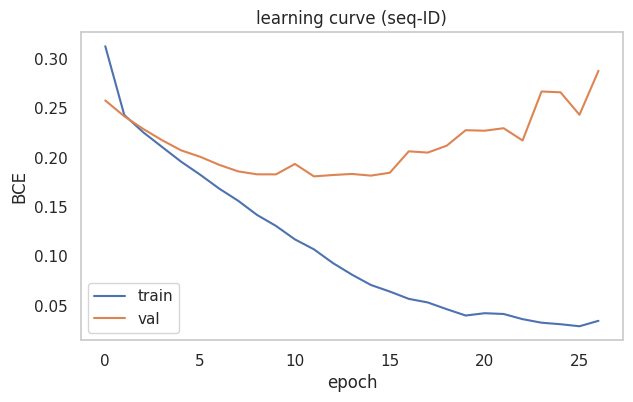

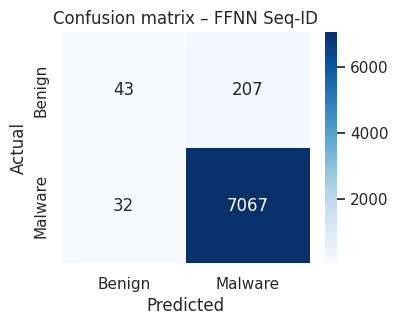

              precision    recall  f1-score   support

      Benign       0.57      0.17      0.26       250
     Malware       0.97      1.00      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.77      0.58      0.62      7349
weighted avg       0.96      0.97      0.96      7349

F1-macro : 0.6240
ROC-AUC  : 0.7502
PR-AUC   : 0.9850


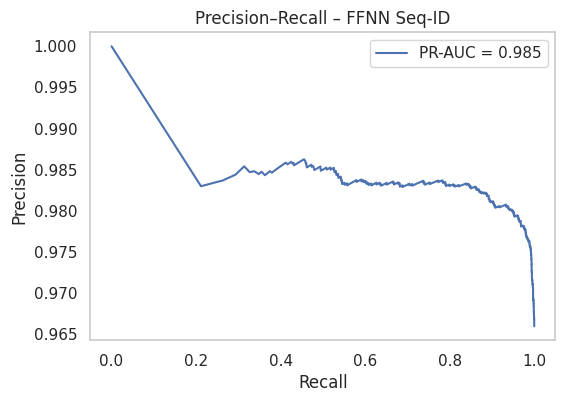

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Xtr = torch.tensor(X_train_padded, dtype=torch.float32)
Xte = torch.tensor(X_test_padded,  dtype=torch.float32)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
va_sz   = len(full_ds) - tr_sz
tr_ds, va_ds = random_split(full_ds, [tr_sz, va_sz])

tr_ld  = DataLoader(tr_ds, batch_size=64, shuffle=True)
va_ld  = DataLoader(va_ds, batch_size=64)
te_ld  = DataLoader(te_ds, batch_size=64)


# Feed-forward neural network on zero-padded API-call sequences:
# – Wraps data into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines a 2-layer FFNN (input → 256 → 64 → 1) with ReLU activations
# – Trains using BCEWithLogitsLoss, AdamW optimizer, and OneCycleLR scheduler
# – Applies early stopping on validation loss (patience=15)
# – Plots training/validation loss curve
# – Evaluates on test set (confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC)



# FNN with no embeddings
class FFNN_SeqID(nn.Module):
    def __init__(self, seq_len:int):
        super().__init__()
        self.seq_len = seq_len               # per debug
        self.net = nn.Sequential(
            nn.Linear(seq_len, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.30),

            #nn.Linear(256,128),
            #nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(256,64),
           # nn.BatchNorm1d(64),
            nn.ReLU(),
           # nn.Dropout(0.30),

           # nn.Linear(64,32),
           # nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.30),

           # nn.Linear(32,16),
           # nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(64,1)                    # logits
        )

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.net(x).squeeze(1)  # logits (B,)

seq_len = Xtr.shape[1]
model   = FFNN_SeqID(seq_len).to(device)

# loss and optimizer
crit = nn.BCEWithLogitsLoss()
opt  = optim.AdamW(model.parameters(), lr=5e-4)
sched = optim.lr_scheduler.OneCycleLR(
            opt, max_lr=5e-4,
            epochs=100, steps_per_epoch=len(tr_ld)
        )


# training
epochs, patience = 100, 15
hist_tr, hist_va = [], []
best_va, wait = 1e9, 0

for ep in range(1, epochs+1):
    # ---- train ----
    model.train(); run=0.
    for xb,yb in tr_ld:
        xb,yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward(); opt.step(); sched.step()
        run += loss.item()*xb.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---- val ----
    model.eval(); run=0.
    with torch.no_grad():
        for xb,yb in va_ld:
            xb,yb = xb.to(device), yb.to(device)
            run += crit(model(xb), yb).item()*xb.size(0)
    va_loss = run/len(va_ds); hist_va.append(va_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={va_loss:.4f}")

    if va_loss < best_va:
        best_va, wait, best_w = va_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)


plt.figure(figsize=(7,4))
plt.plot(hist_tr, label='train'); plt.plot(hist_va, label='val')
plt.xlabel('epoch'); plt.ylabel('BCE'); plt.title('learning curve (seq-ID)')
plt.legend(); plt.grid(); plt.show()

# testing
model.eval(); p_test, y_test_arr = [], []
with torch.no_grad():
    for xb,yb in te_ld:
        p_test.append(torch.sigmoid(model(xb.to(device))).cpu())
        y_test_arr.append(yb)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= 0.5).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion matrix – FFNN Seq-ID'); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f'F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}')

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR-AUC = {prauc:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision–Recall – FFNN Seq-ID')
plt.grid(); plt.legend(); plt.show()


### 128 -> 64 -> 32 with batchNorm and DropOut

Ep 001  train=0.5905  val=0.5917
Ep 002  train=0.5623  val=0.5722
Ep 003  train=0.5339  val=0.5349
Ep 004  train=0.5026  val=0.5105
Ep 005  train=0.4663  val=0.4779
Ep 006  train=0.4276  val=0.4450
Ep 007  train=0.3850  val=0.3978
Ep 008  train=0.3422  val=0.3547
Ep 009  train=0.3002  val=0.3080
Ep 010  train=0.2649  val=0.2705
Ep 011  train=0.2333  val=0.2414
Ep 012  train=0.2067  val=0.2166
Ep 013  train=0.1862  val=0.1965
Ep 014  train=0.1718  val=0.1786
Ep 015  train=0.1601  val=0.1735
Ep 016  train=0.1471  val=0.1630
Ep 017  train=0.1402  val=0.1626
Ep 018  train=0.1352  val=0.1590
Ep 019  train=0.1269  val=0.1556
Ep 020  train=0.1180  val=0.1516
Ep 021  train=0.1110  val=0.1556
Ep 022  train=0.1063  val=0.1527
Ep 023  train=0.0980  val=0.1532
Ep 024  train=0.0939  val=0.1596
Ep 025  train=0.0873  val=0.1587
Ep 026  train=0.0776  val=0.1620
Ep 027  train=0.0746  val=0.1639
Ep 028  train=0.0676  val=0.1752
Ep 029  train=0.0673  val=0.1823
Ep 030  train=0.0612  val=0.1814
Ep 031  tr

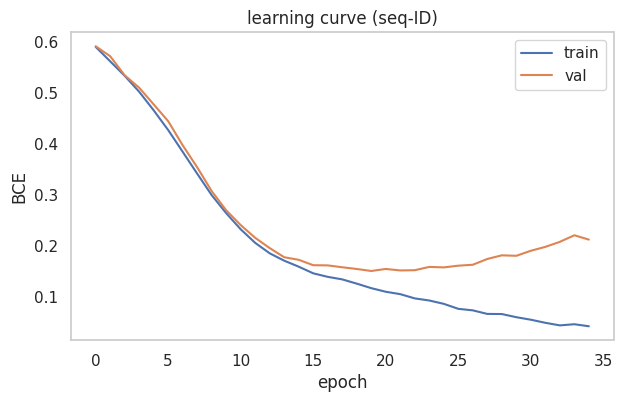

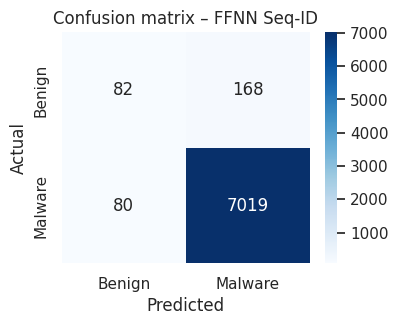

              precision    recall  f1-score   support

      Benign       0.51      0.33      0.40       250
     Malware       0.98      0.99      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.74      0.66      0.69      7349
weighted avg       0.96      0.97      0.96      7349

F1-macro : 0.6903
ROC-AUC  : 0.7786
PR-AUC   : 0.9829


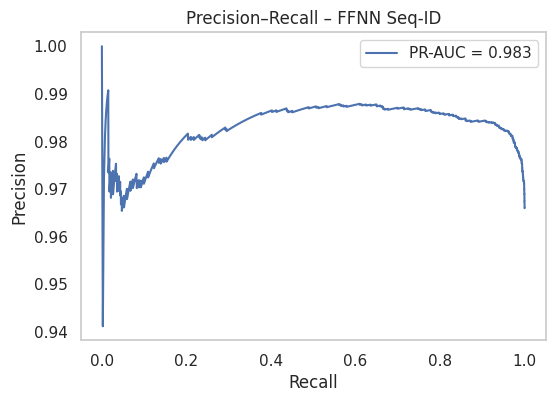

In [ ]:
# Feed-forward neural network on zero-padded API-call sequences:
# – Converts data into PyTorch Tensors and DataLoaders (80/20 train/val split + test set)
# – Defines a 3-layer FFNN (input→128→64→32→1) with BatchNorm and Dropout
# – Uses BCEWithLogitsLoss, AdamW optimizer, and OneCycleLR scheduler
# – Applies early stopping based on validation loss (patience=15)
# – Plots training/validation loss curve and evaluates on test set:
#   confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC


import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Xtr = torch.tensor(X_train_padded, dtype=torch.float32)
Xte = torch.tensor(X_test_padded,  dtype=torch.float32)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
va_sz   = len(full_ds) - tr_sz
tr_ds, va_ds = random_split(full_ds, [tr_sz, va_sz])

tr_ld  = DataLoader(tr_ds, batch_size=64, shuffle=True)
va_ld  = DataLoader(va_ds, batch_size=64)
te_ld  = DataLoader(te_ds, batch_size=64)

class FFNN_SeqID(nn.Module):
    def __init__(self, seq_len:int):
        super().__init__()
        self.seq_len = seq_len               # per debug
        self.net = nn.Sequential(
            nn.Linear(seq_len, 128),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            #nn.Dropout(0.30),

            #nn.Linear(256,128),
            #nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.30),

            nn.Linear(64,32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.30),

           # nn.Linear(32,16),
           # nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(32,1)                    # logits
        )

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.net(x).squeeze(1)  # logits (B,)

seq_len = Xtr.shape[1]
model   = FFNN_SeqID(seq_len).to(device)


crit = nn.BCEWithLogitsLoss()
opt  = optim.AdamW(model.parameters(), lr=5e-4)
sched = optim.lr_scheduler.OneCycleLR(
            opt, max_lr=5e-4,
            epochs=100, steps_per_epoch=len(tr_ld)
        )


epochs, patience = 100, 15
hist_tr, hist_va = [], []
best_va, wait = 1e9, 0

for ep in range(1, epochs+1):
    # ---- train ----
    model.train(); run=0.
    for xb,yb in tr_ld:
        xb,yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward(); opt.step(); sched.step()
        run += loss.item()*xb.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---- val ----
    model.eval(); run=0.
    with torch.no_grad():
        for xb,yb in va_ld:
            xb,yb = xb.to(device), yb.to(device)
            run += crit(model(xb), yb).item()*xb.size(0)
    va_loss = run/len(va_ds); hist_va.append(va_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={va_loss:.4f}")

    if va_loss < best_va:
        best_va, wait, best_w = va_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)


plt.figure(figsize=(7,4))
plt.plot(hist_tr, label='train'); plt.plot(hist_va, label='val')
plt.xlabel('epoch'); plt.ylabel('BCE'); plt.title('learning curve (seq-ID)')
plt.legend(); plt.grid(); plt.show()

# test evaluation
model.eval(); p_test, y_test_arr = [], []
with torch.no_grad():
    for xb,yb in te_ld:
        p_test.append(torch.sigmoid(model(xb.to(device))).cpu())
        y_test_arr.append(yb)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= 0.5).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion matrix – FFNN Seq-ID'); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f'F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}')

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR-AUC = {prauc:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision–Recall – FFNN Seq-ID')
plt.grid(); plt.legend(); plt.show()


### More stratified Model with also class weigths

Ep 001  train=0.0293  val=0.0277
Ep 002  train=0.0283  val=0.0268
Ep 003  train=0.0274  val=0.0259
Ep 004  train=0.0263  val=0.0253
Ep 005  train=0.0252  val=0.0243
Ep 006  train=0.0242  val=0.0236
Ep 007  train=0.0230  val=0.0225
Ep 008  train=0.0217  val=0.0209
Ep 009  train=0.0205  val=0.0201
Ep 010  train=0.0191  val=0.0188
Ep 011  train=0.0178  val=0.0173
Ep 012  train=0.0164  val=0.0161
Ep 013  train=0.0151  val=0.0147
Ep 014  train=0.0139  val=0.0133
Ep 015  train=0.0126  val=0.0118
Ep 016  train=0.0115  val=0.0110
Ep 017  train=0.0106  val=0.0099
Ep 018  train=0.0097  val=0.0091
Ep 019  train=0.0091  val=0.0083
Ep 020  train=0.0086  val=0.0077
Ep 021  train=0.0081  val=0.0073
Ep 022  train=0.0078  val=0.0070
Ep 023  train=0.0075  val=0.0067
Ep 024  train=0.0072  val=0.0065
Ep 025  train=0.0069  val=0.0063
Ep 026  train=0.0068  val=0.0062
Ep 027  train=0.0066  val=0.0061
Ep 028  train=0.0063  val=0.0061
Ep 029  train=0.0062  val=0.0060
Ep 030  train=0.0062  val=0.0060
Ep 031  tr

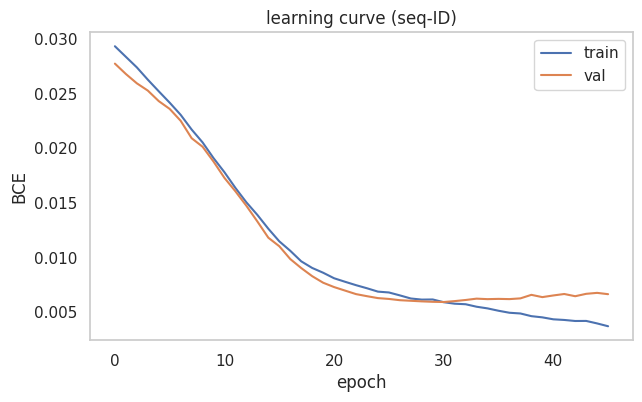

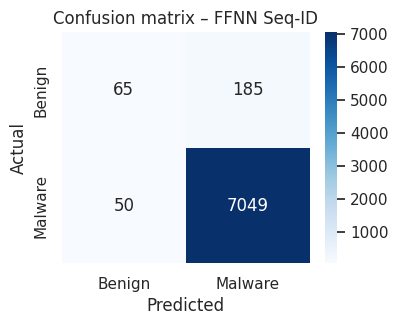

              precision    recall  f1-score   support

      Benign       0.57      0.26      0.36       250
     Malware       0.97      0.99      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.77      0.63      0.67      7349
weighted avg       0.96      0.97      0.96      7349

F1-macro : 0.6699
ROC-AUC  : 0.8246
PR-AUC   : 0.9900


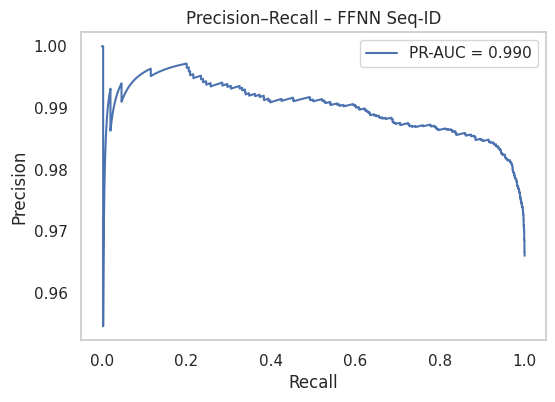

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Xtr = torch.tensor(X_train_padded, dtype=torch.float32)
Xte = torch.tensor(X_test_padded,  dtype=torch.float32)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
va_sz   = len(full_ds) - tr_sz
tr_ds, va_ds = random_split(full_ds, [tr_sz, va_sz])

tr_ld  = DataLoader(tr_ds, batch_size=64, shuffle=True)
va_ld  = DataLoader(va_ds, batch_size=64)
te_ld  = DataLoader(te_ds, batch_size=64)


# FFNN on zero-padded API-call sequences with imbalance handling:
# – Wraps data into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines a 4-layer FFNN (input→256→128→64→32→1) with BatchNorm and Dropout
# – Uses BCEWithLogitsLoss with pos_weight to counter class imbalance
# – Optimizes with AdamW and OneCycleLR over 200 epochs with early stopping (patience=15)
# – Plots training/validation loss curve and evaluates on the test set:
#   – Confusion matrix, classification report
#   – F1-macro, ROC-AUC, PR-AUC with precision–recall curve



class FFNN_SeqID(nn.Module):
    def __init__(self, seq_len:int):
        super().__init__()
        self.seq_len = seq_len               # per debug
        self.net = nn.Sequential(
            nn.Linear(seq_len, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.30),

            nn.Linear(256,128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.30),

            nn.Linear(64,32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.30),

           # nn.Linear(32,16),
           # nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(32,1)                    # logits
        )

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.net(x).squeeze(1)  # logits (B,)

seq_len = Xtr.shape[1]
model   = FFNN_SeqID(seq_len).to(device)

# loss optimization
num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

crit = nn.BCEWithLogitsLoss(pos_weight)
opt  = optim.AdamW(model.parameters(), lr=5e-4)
sched = optim.lr_scheduler.OneCycleLR(
            opt, max_lr=5e-4,
            epochs=200, steps_per_epoch=len(tr_ld)
        )

# training
epochs, patience = 200, 15
hist_tr, hist_va = [], []
best_va, wait = 1e9, 0

for ep in range(1, epochs+1):
    # ---- train ----
    model.train(); run=0.
    for xb,yb in tr_ld:
        xb,yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward(); opt.step(); sched.step()
        run += loss.item()*xb.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---- val ----
    model.eval(); run=0.
    with torch.no_grad():
        for xb,yb in va_ld:
            xb,yb = xb.to(device), yb.to(device)
            run += crit(model(xb), yb).item()*xb.size(0)
    va_loss = run/len(va_ds); hist_va.append(va_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={va_loss:.4f}")

    if va_loss < best_va:
        best_va, wait, best_w = va_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# loss curve
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label='train'); plt.plot(hist_va, label='val')
plt.xlabel('epoch'); plt.ylabel('BCE'); plt.title('learning curve (seq-ID)')
plt.legend(); plt.grid(); plt.show()


model.eval(); p_test, y_test_arr = [], []
with torch.no_grad():
    for xb,yb in te_ld:
        p_test.append(torch.sigmoid(model(xb.to(device))).cpu())
        y_test_arr.append(yb)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= 0.5).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion matrix – FFNN Seq-ID'); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f'F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}')

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR-AUC = {prauc:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision–Recall – FFNN Seq-ID')
plt.grid(); plt.legend(); plt.show()


#### More Stratified Model with also pos_weigth and weigth decay

Ep 001  train=0.0363  val=0.0320
Ep 002  train=0.0351  val=0.0319
Ep 003  train=0.0339  val=0.0315
Ep 004  train=0.0328  val=0.0308
Ep 005  train=0.0315  val=0.0298
Ep 006  train=0.0301  val=0.0292
Ep 007  train=0.0288  val=0.0284
Ep 008  train=0.0274  val=0.0273
Ep 009  train=0.0259  val=0.0257
Ep 010  train=0.0242  val=0.0244
Ep 011  train=0.0225  val=0.0228
Ep 012  train=0.0208  val=0.0211
Ep 013  train=0.0191  val=0.0192
Ep 014  train=0.0174  val=0.0172
Ep 015  train=0.0159  val=0.0153
Ep 016  train=0.0144  val=0.0137
Ep 017  train=0.0129  val=0.0124
Ep 018  train=0.0118  val=0.0110
Ep 019  train=0.0108  val=0.0099
Ep 020  train=0.0099  val=0.0087
Ep 021  train=0.0091  val=0.0081
Ep 022  train=0.0086  val=0.0074
Ep 023  train=0.0081  val=0.0069
Ep 024  train=0.0077  val=0.0065
Ep 025  train=0.0074  val=0.0063
Ep 026  train=0.0071  val=0.0061
Ep 027  train=0.0070  val=0.0060
Ep 028  train=0.0068  val=0.0058
Ep 029  train=0.0067  val=0.0056
Ep 030  train=0.0064  val=0.0056
Ep 031  tr

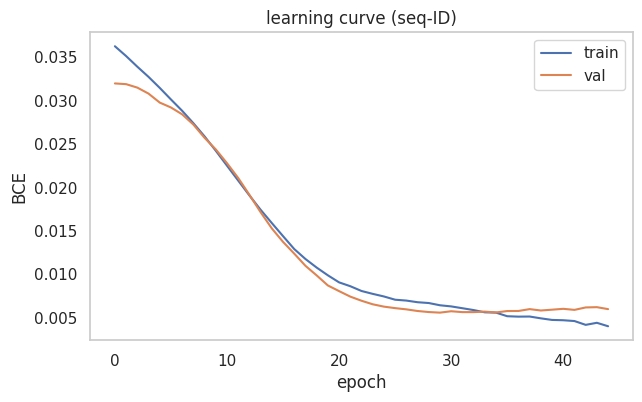

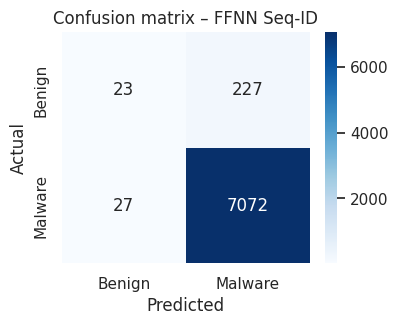

              precision    recall  f1-score   support

      Benign       0.46      0.09      0.15       250
     Malware       0.97      1.00      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.71      0.54      0.57      7349
weighted avg       0.95      0.97      0.95      7349

F1-macro : 0.5678
ROC-AUC  : 0.8441
PR-AUC   : 0.9915


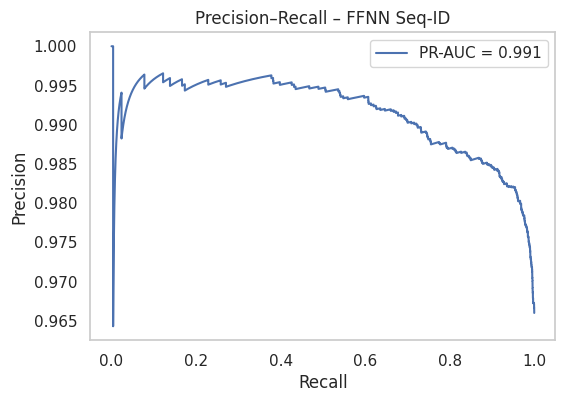

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Xtr = torch.tensor(X_train_padded, dtype=torch.float32)
Xte = torch.tensor(X_test_padded,  dtype=torch.float32)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
va_sz   = len(full_ds) - tr_sz
tr_ds, va_ds = random_split(full_ds, [tr_sz, va_sz])

tr_ld  = DataLoader(tr_ds, batch_size=64, shuffle=True)
va_ld  = DataLoader(va_ds, batch_size=64)
te_ld  = DataLoader(te_ds, batch_size=64)


# FFNN on zero-padded API-call sequences with imbalance handling:
# – Wraps data into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines a 4-layer FFNN (input→256→128→64→32→1) with BatchNorm and Dropout
# – Uses BCEWithLogitsLoss with pos_weight to counter class imbalance
# – Optimizes with AdamW and OneCycleLR over 200 epochs with early stopping (patience=15)
# – Plots training/validation loss curve and evaluates on the test set:
#   – Confusion matrix, classification report
#   – F1-macro, ROC-AUC, PR-AUC with precision–recall curve
# - pos_weight and batch_norm


class FFNN_SeqID(nn.Module):
    def __init__(self, seq_len:int):
        super().__init__()
        self.seq_len = seq_len
        self.net = nn.Sequential(
            nn.Linear(seq_len, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.30),

            nn.Linear(256,128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(128,64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.30),

            nn.Linear(64,32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.30),

            #nn.Linear(32,16),
            #nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.30),

            nn.Linear(32,1)                    # logits
        )

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.net(x).squeeze(1)  # logits (B,)

seq_len = Xtr.shape[1]
model   = FFNN_SeqID(seq_len).to(device)

# loss and optimizer
num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

crit = nn.BCEWithLogitsLoss(pos_weight)
opt  = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)
sched = optim.lr_scheduler.OneCycleLR(
            opt, max_lr=5e-4,
            epochs=200, steps_per_epoch=len(tr_ld)
        )

# training
epochs, patience = 200, 15
hist_tr, hist_va = [], []
best_va, wait = 1e9, 0

for ep in range(1, epochs+1):
    # ---- train ----
    model.train(); run=0.
    for xb,yb in tr_ld:
        xb,yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward(); opt.step(); sched.step()
        run += loss.item()*xb.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---- val ----
    model.eval(); run=0.
    with torch.no_grad():
        for xb,yb in va_ld:
            xb,yb = xb.to(device), yb.to(device)
            run += crit(model(xb), yb).item()*xb.size(0)
    va_loss = run/len(va_ds); hist_va.append(va_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={va_loss:.4f}")

    if va_loss < best_va:
        best_va, wait, best_w = va_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# loss curves
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label='train'); plt.plot(hist_va, label='val')
plt.xlabel('epoch'); plt.ylabel('BCE'); plt.title('learning curve (seq-ID)')
plt.legend(); plt.grid(); plt.show()

# test
model.eval(); p_test, y_test_arr = [], []
with torch.no_grad():
    for xb,yb in te_ld:
        p_test.append(torch.sigmoid(model(xb.to(device))).cpu())
        y_test_arr.append(yb)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= 0.5).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion matrix – FFNN Seq-ID'); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f'F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}')

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR-AUC = {prauc:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision–Recall – FFNN Seq-ID')
plt.grid(); plt.legend(); plt.show()


# Embeddings - TASK-2


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

### Simple embendings FFNN Model

Ep 01  train=0.7144  val=0.6733
Ep 02  train=0.6280  val=0.5776
Ep 03  train=0.5080  val=0.4276
Ep 04  train=0.3332  val=0.2542
Ep 05  train=0.2038  val=0.1846
Ep 06  train=0.1699  val=0.1770
Ep 07  train=0.1658  val=0.1754
Ep 08  train=0.1639  val=0.1737
Ep 09  train=0.1619  val=0.1716
Ep 10  train=0.1596  val=0.1688
Ep 11  train=0.1570  val=0.1662
Ep 12  train=0.1540  val=0.1629
Ep 13  train=0.1503  val=0.1586
Ep 14  train=0.1461  val=0.1537
Ep 15  train=0.1402  val=0.1490
Ep 16  train=0.1339  val=0.1412
Ep 17  train=0.1269  val=0.1321
Ep 18  train=0.1209  val=0.1263
Ep 19  train=0.1148  val=0.1231
Ep 20  train=0.1094  val=0.1174
Ep 21  train=0.1071  val=0.1152
Ep 22  train=0.1023  val=0.1104
Ep 23  train=0.0993  val=0.1035
Ep 24  train=0.0954  val=0.1053
Ep 25  train=0.0928  val=0.1061
Ep 26  train=0.0887  val=0.1035
Ep 27  train=0.0867  val=0.1086
Ep 28  train=0.0850  val=0.0994
Ep 29  train=0.0809  val=0.0999
Ep 30  train=0.0798  val=0.0976
Ep 31  train=0.0776  val=0.0943
Ep 32  t

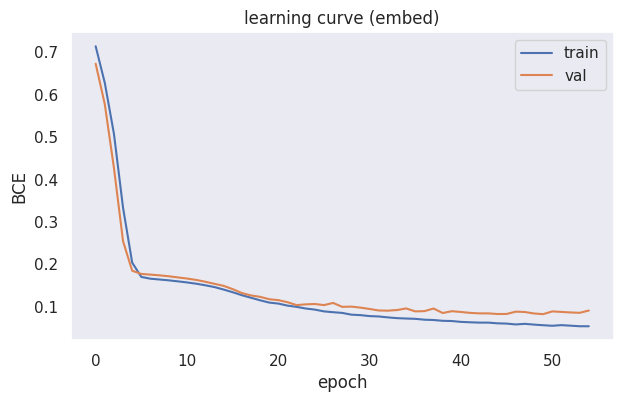

soglia scel­ta = 0.50


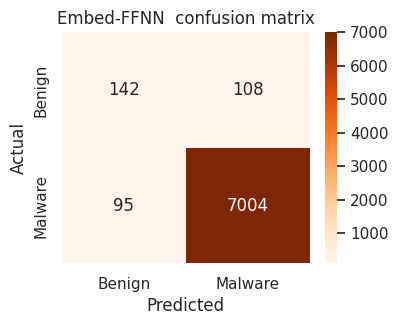

              precision    recall  f1-score   support

      Benign       0.60      0.57      0.58       250
     Malware       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.79      0.78      0.78      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7844
ROC-AUC  : 0.9320
PR-AUC   : 0.9966


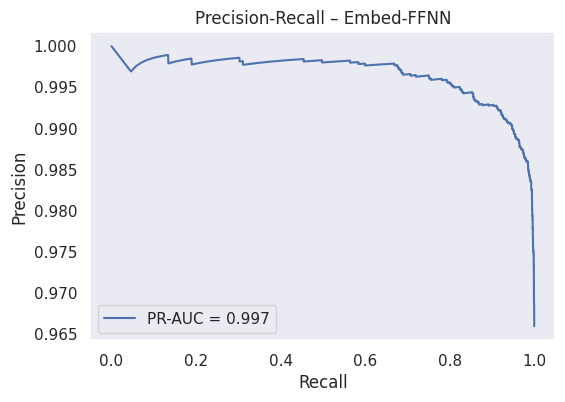

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)


# Feed-forward neural network with learned embeddings:
# – Converts integer-encoded sequences into embeddings and mean-pools over sequence length
# – Defines EmbedFFNN: Embedding(vocab+1→emb_dim) + FFNN layers (emb_dim→256→64→1) with ReLU
# – Uses BCEWithLogitsLoss, AdamW optimizer, OneCycleLR scheduling over 100 epochs with early stopping (patience=5)
# – Selects optimal threshold on validation set by maximizing macro-F1 over a grid of cutoffs
# – Plots train/val loss curves, evaluates on test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC


# Embedding modified
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb  = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net  = nn.Sequential(
            nn.Linear(emb_dim, 256),
            nn.ReLU(),
            nn.Linear(256,  64),
            nn.ReLU(),
            nn.Linear(64, 1)                      # logits
        )
    def forward(self,x):

        z = self.emb(x).mean(dim=1)               # mean-pool (B,emb_dim)
        return self.net(z).squeeze(1)             # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)


# loss, optimization
n_benign, n_malw = (y_train==0).sum(), (y_train==1).sum()
pos_w = torch.tensor([1.1], device=device)

crit      = nn.BCEWithLogitsLoss()
optimiser = optim.AdamW(model.parameters(), lr=5e-4)
sched     = optim.lr_scheduler.OneCycleLR(
              optimiser, max_lr=5e-4,
              epochs=100, steps_per_epoch=len(tr_ld))

# training
hist_tr, hist_val = [], []
best_val, wait, patience, epochs = 1e9, 0, 5, 100

for ep in range(1, epochs+1):
    # --- train ---
    model.train(); run=0.
    for x,y in tr_ld:
        x,y = x.to(device), y.to(device)
        optimiser.zero_grad()
        loss = crit(model(x), y)
        loss.backward(); optimiser.step(); sched.step()
        run += loss.item()*x.size(0)
    hist_tr.append(run/len(tr_ds))

    # --- val ---
    model.eval(); run=0.
    with torch.no_grad():
        for x,y in val_ld:
            x,y = x.to(device), y.to(device)
            run += crit(model(x), y).item()*x.size(0)
    val_loss = run/len(val_ds); hist_val.append(val_loss)
    print(f"Ep {ep:02d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# loss curve
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train"); plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE"); plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()

# treshhold for good validation
model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05,0.95,19)
best_thr = thr_grid[np.argmax([f1_score(y_val, p_val>=t, average='macro')
                               for t in thr_grid])]
print(f"soglia scel­ta = {best_thr:.2f}")

# test set evaluation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred   = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion matrix"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


### 256 -> with BatchNorm and Dropout

Ep 01  train=0.5887  val=0.5674
Ep 02  train=0.5503  val=0.5328
Ep 03  train=0.5086  val=0.4991
Ep 04  train=0.4624  val=0.4597
Ep 05  train=0.4158  val=0.4082
Ep 06  train=0.3654  val=0.3610
Ep 07  train=0.3184  val=0.3139
Ep 08  train=0.2752  val=0.2625
Ep 09  train=0.2383  val=0.2255
Ep 10  train=0.2091  val=0.1991
Ep 11  train=0.1904  val=0.1733
Ep 12  train=0.1768  val=0.1595
Ep 13  train=0.1647  val=0.1437
Ep 14  train=0.1548  val=0.1367
Ep 15  train=0.1468  val=0.1298
Ep 16  train=0.1432  val=0.1237
Ep 17  train=0.1391  val=0.1223
Ep 18  train=0.1327  val=0.1167
Ep 19  train=0.1299  val=0.1140
Ep 20  train=0.1255  val=0.1101
Ep 21  train=0.1252  val=0.1055
Ep 22  train=0.1217  val=0.1015
Ep 23  train=0.1169  val=0.1022
Ep 24  train=0.1166  val=0.0995
Ep 25  train=0.1087  val=0.1001
Ep 26  train=0.1097  val=0.0971
Ep 27  train=0.1063  val=0.0992
Ep 28  train=0.1002  val=0.0953
Ep 29  train=0.1066  val=0.0945
Ep 30  train=0.1029  val=0.0947
Ep 31  train=0.0964  val=0.0904
Ep 32  t

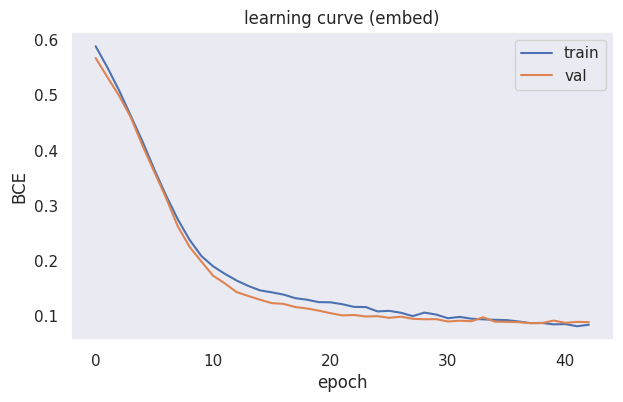

soglia scel­ta = 0.60


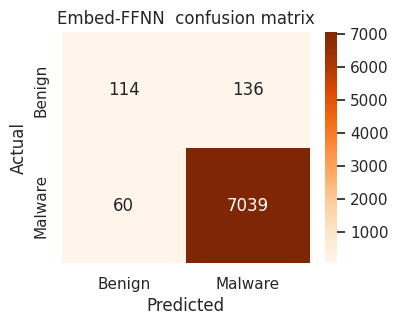

              precision    recall  f1-score   support

      Benign       0.66      0.46      0.54       250
     Malware       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.82      0.72      0.76      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7620
ROC-AUC  : 0.9418
PR-AUC   : 0.9969


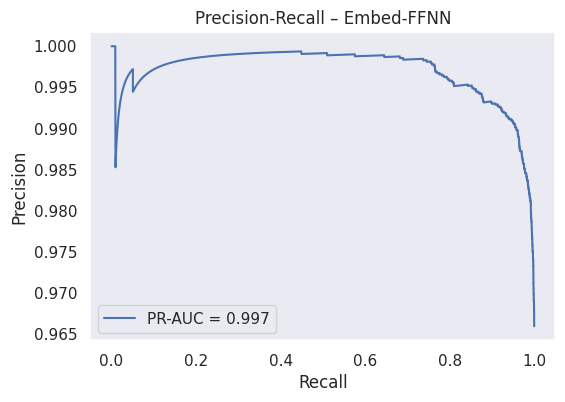

In [ ]:

import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

# dataset and dataloader
Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)

# ──────────────────────────────────────────────
# Feed-forward neural network with learned embeddings:
# – Converts integer-encoded sequences into embeddings and mean-pools over sequence length
# – Defines EmbedFFNN: Embedding(vocab+1→emb_dim) + FFNN layers (emb_dim→256→64→1) with ReLU
# – Uses BCEWithLogitsLoss, AdamW optimizer, OneCycleLR scheduling over 100 epochs with early stopping (patience=5)
# – Selects optimal threshold on validation set by maximizing macro-F1 over a grid of cutoffs
# – Plots train/val loss curves, evaluates on test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC
# - Batch_Norm and Dropout
# ──────────────────────────────────────────────
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb  = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net  = nn.Sequential(
            nn.Linear(emb_dim, 256),
            nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(256,  64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(64, 1)                      # logits
        )
    def forward(self,x):

        z = self.emb(x).mean(dim=1)               # mean-pool (B,emb_dim)
        return self.net(z).squeeze(1)             # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)

# loss + optimization + scheduler
n_benign, n_malw = (y_train==0).sum(), (y_train==1).sum()
pos_w = torch.tensor([1.1], device=device)

crit      = nn.BCEWithLogitsLoss()  #pos_weight=pos_w
optimiser = optim.AdamW(model.parameters(), lr=5e-4)
sched     = optim.lr_scheduler.OneCycleLR(
              optimiser, max_lr=5e-4,
              epochs=100, steps_per_epoch=len(tr_ld))

# training
hist_tr, hist_val = [], []
best_val, wait, patience, epochs = 1e9, 0, 5, 100

for ep in range(1, epochs+1):
    # --- train ---
    model.train(); run=0.
    for x,y in tr_ld:
        x,y = x.to(device), y.to(device)
        optimiser.zero_grad()
        loss = crit(model(x), y)
        loss.backward(); optimiser.step(); sched.step()
        run += loss.item()*x.size(0)
    hist_tr.append(run/len(tr_ds))

    # --- val ---
    model.eval(); run=0.
    with torch.no_grad():
        for x,y in val_ld:
            x,y = x.to(device), y.to(device)
            run += crit(model(x), y).item()*x.size(0)
    val_loss = run/len(val_ds); hist_val.append(val_loss)
    print(f"Ep {ep:02d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# curva di Loss
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train"); plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE"); plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()

# threshold validaition
model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05,0.95,19)
best_thr = thr_grid[np.argmax([f1_score(y_val, p_val>=t, average='macro')
                               for t in thr_grid])]
print(f"soglia scel­ta = {best_thr:.2f}")

# test set evaluation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred   = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion matrix"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


### Same Model but with pos_weight

Ep 01  train=0.0372  val=0.0330
Ep 02  train=0.0349  val=0.0311
Ep 03  train=0.0324  val=0.0292
Ep 04  train=0.0297  val=0.0269
Ep 05  train=0.0266  val=0.0242
Ep 06  train=0.0231  val=0.0211
Ep 07  train=0.0199  val=0.0182
Ep 08  train=0.0166  val=0.0154
Ep 09  train=0.0138  val=0.0128
Ep 10  train=0.0116  val=0.0107
Ep 11  train=0.0099  val=0.0089
Ep 12  train=0.0087  val=0.0079
Ep 13  train=0.0078  val=0.0070
Ep 14  train=0.0072  val=0.0064
Ep 15  train=0.0067  val=0.0059
Ep 16  train=0.0064  val=0.0057
Ep 17  train=0.0062  val=0.0055
Ep 18  train=0.0060  val=0.0051
Ep 19  train=0.0057  val=0.0051
Ep 20  train=0.0055  val=0.0048
Ep 21  train=0.0053  val=0.0048
Ep 22  train=0.0052  val=0.0046
Ep 23  train=0.0051  val=0.0045
Ep 24  train=0.0049  val=0.0044
Ep 25  train=0.0048  val=0.0044
Ep 26  train=0.0047  val=0.0043
Ep 27  train=0.0045  val=0.0043
Ep 28  train=0.0044  val=0.0042
Ep 29  train=0.0043  val=0.0043
Ep 30  train=0.0043  val=0.0041
Ep 31  train=0.0043  val=0.0042
Ep 32  t

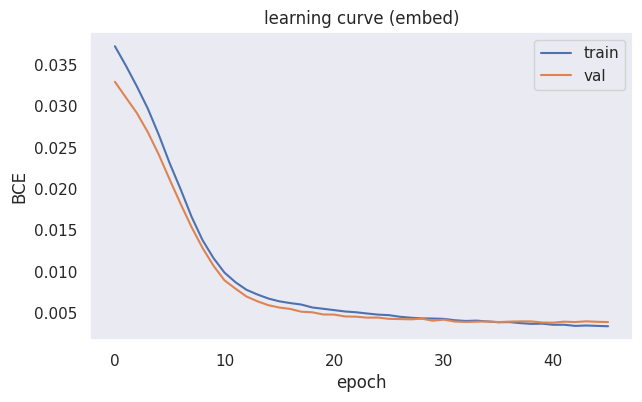

soglia scel­ta = 0.65


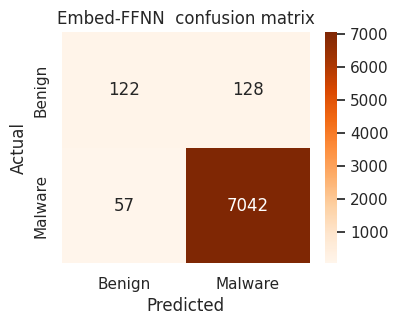

              precision    recall  f1-score   support

      Benign       0.68      0.49      0.57       250
     Malware       0.98      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.83      0.74      0.78      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7779
ROC-AUC  : 0.9406
PR-AUC   : 0.9969


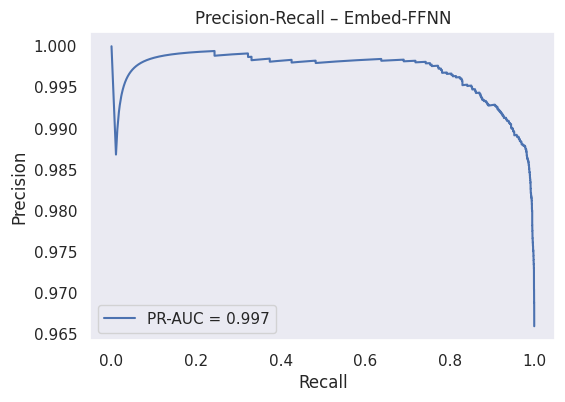

In [ ]:

import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

# 1. TensorDataset / DataLoader

Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)

# ──────────────────────────────────────────────
# Feed-forward neural network with learned embeddings:
# – Converts integer-encoded sequences into embeddings and mean-pools over sequence length
# – Defines EmbedFFNN: Embedding(vocab+1→emb_dim) + FFNN layers (emb_dim→256→64→1) with ReLU
# – Uses BCEWithLogitsLoss with pos_weight, AdamW optimizer, OneCycleLR scheduling over 100 epochs with early stopping (patience=5)
# – Selects optimal threshold on validation set by maximizing macro-F1 over a grid of cutoffs
# – Plots train/val loss curves, evaluates on test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC
# - Batch_Norm and Dropout
# ──────────────────────────────────────────────

# FFNN with Embeddings
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb  = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net  = nn.Sequential(
            nn.Linear(emb_dim, 256),
            nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(256,  64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(64, 1)                      # logits
        )
    def forward(self,x):

        z = self.emb(x).mean(dim=1)               # mean-pool (B,emb_dim)
        return self.net(z).squeeze(1)             # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)

# loss + optimiz + scheduler
n_benign, n_malw = (y_train==0).sum(), (y_train==1).sum()
pos_w = torch.tensor([1.1], device=device)

num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

crit      = nn.BCEWithLogitsLoss(pos_weight)  #pos_weight=pos_w
optimiser = optim.AdamW(model.parameters(), lr=5e-4)
sched     = optim.lr_scheduler.OneCycleLR(
              optimiser, max_lr=5e-4,
              epochs=100, steps_per_epoch=len(tr_ld))

#training
hist_tr, hist_val = [], []
best_val, wait, patience, epochs = 1e9, 0, 5, 100

for ep in range(1, epochs+1):
    # --- train ---
    model.train(); run=0.
    for x,y in tr_ld:
        x,y = x.to(device), y.to(device)
        optimiser.zero_grad()
        loss = crit(model(x), y)
        loss.backward(); optimiser.step(); sched.step()
        run += loss.item()*x.size(0)
    hist_tr.append(run/len(tr_ds))

    # --- val ---
    model.eval(); run=0.
    with torch.no_grad():
        for x,y in val_ld:
            x,y = x.to(device), y.to(device)
            run += crit(model(x), y).item()*x.size(0)
    val_loss = run/len(val_ds); hist_val.append(val_loss)
    print(f"Ep {ep:02d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# loss curve
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train"); plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE"); plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()


model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05,0.95,19)
best_thr = thr_grid[np.argmax([f1_score(y_val, p_val>=t, average='macro')
                               for t in thr_grid])]
print(f"soglia scel­ta = {best_thr:.2f}")

# test set evaluation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred   = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion matrix"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m   = f1_score(y_test_arr, pred, average='macro')
roc   = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


# experiments



### seq-id FFNN (best of seq-id trials)


Epoch 001  train=0.0291  val=0.0305
Epoch 002  train=0.0283  val=0.0301
Epoch 003  train=0.0277  val=0.0291
Epoch 004  train=0.0266  val=0.0284
Epoch 005  train=0.0255  val=0.0268
Epoch 006  train=0.0241  val=0.0254
Epoch 007  train=0.0226  val=0.0235
Epoch 008  train=0.0209  val=0.0215
Epoch 009  train=0.0190  val=0.0192
Epoch 010  train=0.0172  val=0.0172
Epoch 011  train=0.0152  val=0.0151
Epoch 012  train=0.0136  val=0.0132
Epoch 013  train=0.0118  val=0.0115
Epoch 014  train=0.0105  val=0.0100
Epoch 015  train=0.0093  val=0.0090
Epoch 016  train=0.0087  val=0.0082
Epoch 017  train=0.0079  val=0.0077
Epoch 018  train=0.0073  val=0.0075
Epoch 019  train=0.0071  val=0.0073
Epoch 020  train=0.0066  val=0.0071
Epoch 021  train=0.0064  val=0.0071
Epoch 022  train=0.0061  val=0.0070
Epoch 023  train=0.0058  val=0.0070
Epoch 024  train=0.0056  val=0.0071
Epoch 025  train=0.0054  val=0.0070
Epoch 026  train=0.0052  val=0.0071
Epoch 027  train=0.0049  val=0.0076
Epoch 028  train=0.0048  val

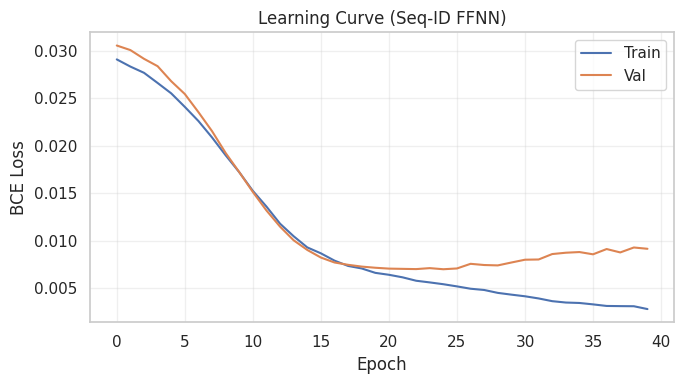

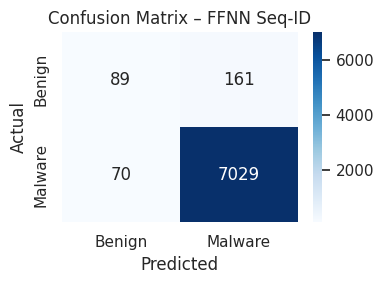

              precision    recall  f1-score   support

      Benign       0.56      0.36      0.44       250
     Malware       0.98      0.99      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.77      0.67      0.71      7349
weighted avg       0.96      0.97      0.97      7349

F1-macro: 0.7095  ROC-AUC: 0.8330  PR-AUC: 0.9914


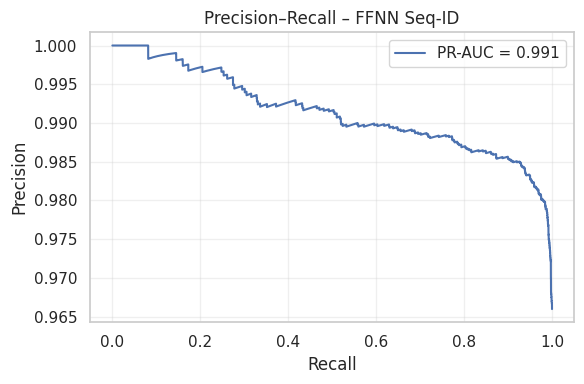

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (
    confusion_matrix, classification_report,
    f1_score, roc_auc_score,
    precision_recall_curve, auc
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sns.set_theme(style="whitegrid")

y_train  = train_df["is_malware"]
y_test   = test_df ["is_malware"]

# Convert padded sequences and labels to tensors
Xtr = torch.tensor(X_train_padded, dtype=torch.float32)
Xte = torch.tensor(X_test_padded,  dtype=torch.float32)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

# Build datasets & loaders
full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

train_size = int(0.8 * len(full_ds))
val_size   = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds,   batch_size=64, shuffle=False)
test_ld  = DataLoader(te_ds,    batch_size=64, shuffle=False)

# Multi-layer FFNN on zero-padded API-call sequences:
# – Wraps data into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines FFNN_SeqID: sequential MLP with five hidden layers (256→128→64→32→16) using BatchNorm and Dropout
# – Uses weighted BCEWithLogitsLoss (pos_weight) to handle class imbalance
# – Optimizes with AdamW and OneCycleLR over up to 100 epochs with early stopping (patience=15)
# – Plots training vs. validation BCE loss curves
# – Evaluates on test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC


class FFNN_SeqID(nn.Module):
    def __init__(self, seq_len: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(seq_len, 256),
            nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.20),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.20),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.20),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.20),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.20),

            nn.Linear(16, 1)   # output logits
        )

    def forward(self, x):

        x = x.view(x.size(0), -1)
        return self.model(x).squeeze(1)  # (batch_size,)


seq_len = Xtr.shape[1]
model   = FFNN_SeqID(seq_len).to(device)

# loss optimizer and scheduler
num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

criterion = nn.BCEWithLogitsLoss(pos_weight)
optimizer = optim.AdamW(model.parameters(), lr=5e-4)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=5e-4,
    epochs=100, steps_per_epoch=len(train_ld)
)


# training
num_epochs, patience = 100, 15
best_val_loss, wait = float('inf'), 0
train_losses, val_losses = [], []

for epoch in range(1, num_epochs+1):
    # — Training phase —
    model.train()
    running_train = 0.0
    for xb, yb in train_ld:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_train += loss.item() * xb.size(0)
    train_losses.append(running_train / len(train_ds))

    # — Validation phase —
    model.eval()
    running_val = 0.0
    with torch.no_grad():
        for xb, yb in val_ld:
            xb, yb = xb.to(device), yb.to(device)
            running_val += criterion(model(xb), yb).item() * xb.size(0)
    val_loss = running_val / len(val_ds)
    val_losses.append(val_loss)

    print(f"Epoch {epoch:03d}  train={train_losses[-1]:.4f}  val={val_loss:.4f}")

    # early stopping check
    if val_loss < best_val_loss:
        best_val_loss, wait = val_loss, 0
        best_weights = model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break

model.load_state_dict(best_weights)


# plot learning curves
plt.figure(figsize=(7,4))
plt.plot(train_losses, label='Train')
plt.plot(val_losses,   label='Val')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Learning Curve (Seq-ID FFNN)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# test model and metrics
model.eval()
probs, labels = [], []
with torch.no_grad():
    for xb, yb in test_ld:
        xb = xb.to(device)
        probs.append(torch.sigmoid(model(xb)).cpu())
        labels.append(yb)
probs = torch.cat(probs).numpy()
labels = torch.cat(labels).numpy()
preds = (probs >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – FFNN Seq-ID')
plt.tight_layout()
plt.show()

# Classification report
print(classification_report(labels, preds, target_names=['Benign','Malware']))

# Summary metrics
f1m = f1_score(labels, preds, average='macro')
roc = roc_auc_score(labels, probs)
prec, rec, _ = precision_recall_curve(labels, probs)
pr_auc = auc(rec, prec)
print(f"F1-macro: {f1m:.4f}  ROC-AUC: {roc:.4f}  PR-AUC: {pr_auc:.4f}")

# Precision–Recall curve
plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f'PR-AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall – FFNN Seq-ID')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### embeddings


#### Embeddings without pos-weight

Ep 001  train=0.6731  val=0.6283
Ep 002  train=0.6539  val=0.6084
Ep 003  train=0.6301  val=0.5947
Ep 004  train=0.6092  val=0.5888
Ep 005  train=0.5844  val=0.5729
Ep 006  train=0.5643  val=0.5560
Ep 007  train=0.5398  val=0.5358
Ep 008  train=0.5050  val=0.5159
Ep 009  train=0.4826  val=0.4850
Ep 010  train=0.4504  val=0.4657
Ep 011  train=0.4242  val=0.4378
Ep 012  train=0.3890  val=0.4131
Ep 013  train=0.3649  val=0.3828
Ep 014  train=0.3354  val=0.3515
Ep 015  train=0.3098  val=0.3231
Ep 016  train=0.2912  val=0.2935
Ep 017  train=0.2656  val=0.2703
Ep 018  train=0.2456  val=0.2516
Ep 019  train=0.2304  val=0.2307
Ep 020  train=0.2157  val=0.2168
Ep 021  train=0.2031  val=0.2021
Ep 022  train=0.1975  val=0.1944
Ep 023  train=0.1848  val=0.1878
Ep 024  train=0.1811  val=0.1813
Ep 025  train=0.1733  val=0.1772
Ep 026  train=0.1670  val=0.1739
Ep 027  train=0.1644  val=0.1674
Ep 028  train=0.1605  val=0.1661
Ep 029  train=0.1571  val=0.1636
Ep 030  train=0.1515  val=0.1632
Ep 031  tr

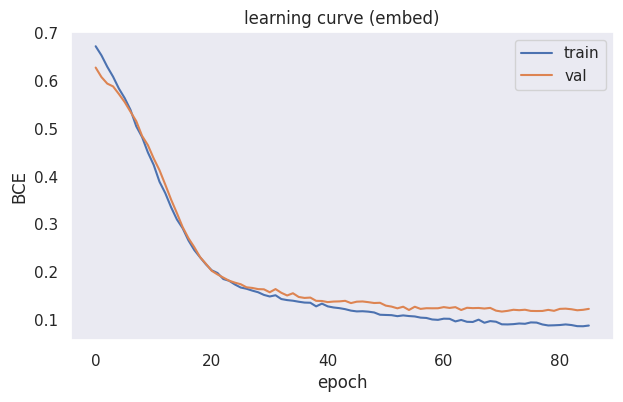

soglia scelta = 0.60


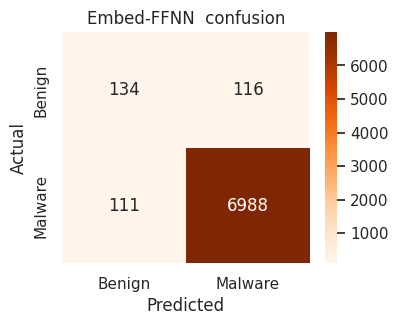

              precision    recall  f1-score   support

      Benign       0.55      0.54      0.54       250
     Malware       0.98      0.98      0.98      7099

    accuracy                           0.97      7349
   macro avg       0.77      0.76      0.76      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7627
ROC-AUC  : 0.9342
PR-AUC   : 0.9966


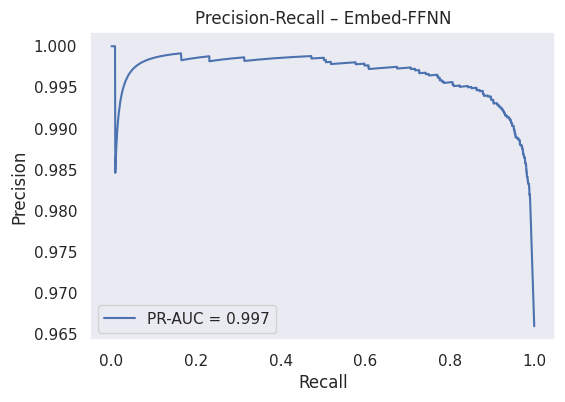

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

# Tensor dataset & dataloader
Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)

# FFNN with learned embeddings and dropout:
# – Loads integer-encoded sequences into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines EmbedFFNN: Embedding(vocab+1→emb_dim) + FFNN layers (128→64→32→1) with BatchNorm and 50% Dropout
# – Uses BCEWithLogitsLoss, AdamW optimizer, and OneCycleLR scheduling over up to 200 epochs with early stopping (patience=15)
# – Mean-pools embeddings, selects optimal threshold on validation by maximizing macro-F1
# – Plots training/validation BCE loss, learning curve, and evaluates test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC


# embedding model
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net = nn.Sequential(
            #nn.Linear(emb_dim, 256),
            #nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(emb_dim, 128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(128,  64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(64,   32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.50),
            #nn.Linear(32,   16),
            #nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(32,    1)            # logits
        )
    def forward(self,x):
        z = self.emb(x).mean(dim=1)
        return self.net(z).squeeze(1)      # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)

# loss optimizer and scheduler

num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

crit       = nn.BCEWithLogitsLoss()
optimiser  = optim.AdamW(model.parameters(), lr=5e-4)
sched      = optim.lr_scheduler.OneCycleLR(
               optimiser, max_lr=5e-4,
               epochs=200, steps_per_epoch=len(tr_ld))

# training
hist_tr, hist_val = [], []
best_val, wait    = 1e9, 0
patience, epochs  = 15, 200

for ep in range(1, epochs+1):
    # ---------- train ----------
    model.train(); run = 0.
    for x,y in tr_ld:
        x,y = x.to(device), y.to(device)
        optimiser.zero_grad()
        loss = crit(model(x), y)
        loss.backward(); optimiser.step(); sched.step()
        run += loss.item()*x.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---------- validation ----------
    model.eval(); run = 0.
    with torch.no_grad():
        for x,y in val_ld:
            x,y = x.to(device), y.to(device)
            run += crit(model(x), y).item()*x.size(0)
    val_loss = run/len(val_ds); hist_val.append(val_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# learning curve
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train")
plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE")
plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()

# threshold
model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05, 0.95, 19)
best_thr = thr_grid[np.argmax(
            [f1_score(y_val, p_val>=t, average='macro') for t in thr_grid])]
print(f"soglia scelta = {best_thr:.2f}")

# test set evaluation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m  = f1_score(y_test_arr, pred, average='macro')
roc  = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


#### Embeddings with pos-weight


Ep 001  train=0.0322  val=0.0287
Ep 002  train=0.0312  val=0.0282
Ep 003  train=0.0302  val=0.0272
Ep 004  train=0.0292  val=0.0268
Ep 005  train=0.0283  val=0.0260
Ep 006  train=0.0272  val=0.0254
Ep 007  train=0.0259  val=0.0247
Ep 008  train=0.0245  val=0.0235
Ep 009  train=0.0232  val=0.0226
Ep 010  train=0.0219  val=0.0215
Ep 011  train=0.0205  val=0.0201
Ep 012  train=0.0192  val=0.0191
Ep 013  train=0.0177  val=0.0179
Ep 014  train=0.0164  val=0.0164
Ep 015  train=0.0150  val=0.0151
Ep 016  train=0.0137  val=0.0138
Ep 017  train=0.0127  val=0.0124
Ep 018  train=0.0116  val=0.0113
Ep 019  train=0.0106  val=0.0104
Ep 020  train=0.0100  val=0.0095
Ep 021  train=0.0095  val=0.0088
Ep 022  train=0.0089  val=0.0081
Ep 023  train=0.0084  val=0.0078
Ep 024  train=0.0081  val=0.0071
Ep 025  train=0.0078  val=0.0070
Ep 026  train=0.0075  val=0.0066
Ep 027  train=0.0074  val=0.0064
Ep 028  train=0.0070  val=0.0062
Ep 029  train=0.0068  val=0.0061
Ep 030  train=0.0068  val=0.0061
Ep 031  tr

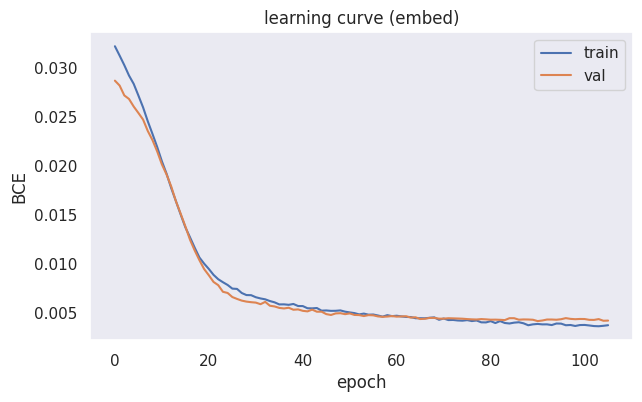

soglia scelta = 0.60


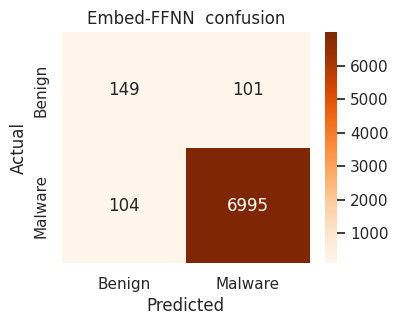

              precision    recall  f1-score   support

      Benign       0.59      0.60      0.59       250
     Malware       0.99      0.99      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.79      0.79      0.79      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7890
ROC-AUC  : 0.9424
PR-AUC   : 0.9971


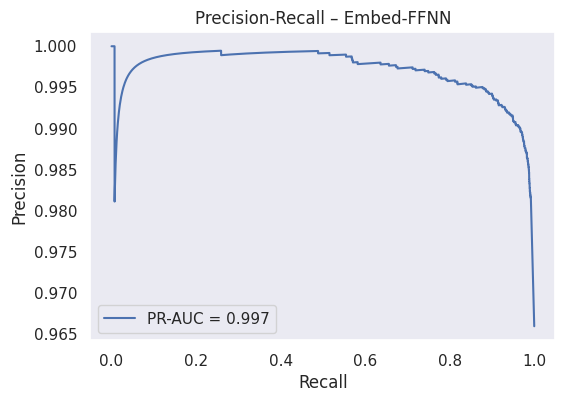

In [ ]:
import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

# Tensor dataset
Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)

# FFNN with learned embeddings and dropout:
# – Loads integer-encoded sequences into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines EmbedFFNN: Embedding(vocab+1→emb_dim) + FFNN layers (128→64→32→1) with BatchNorm and 50% Dropout
# – Uses BCEWithLogitsLoss (pos_weight), AdamW optimizer, and OneCycleLR scheduling over up to 200 epochs with early stopping (patience=15)
# – Mean-pools embeddings, selects optimal threshold on validation by maximizing macro-F1
# – Plots training/validation BCE loss, learning curve, and evaluates test set: confusion matrix, classification report, F1-macro, ROC-AUC, PR-AUC


# model with embeddings
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net = nn.Sequential(
            #nn.Linear(emb_dim, 256),
            #nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(emb_dim, 128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(128,  64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(64,   32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.50),
            #nn.Linear(32,   16),
            #nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(32,    1)            # logits
        )
    def forward(self,x):
        z = self.emb(x).mean(dim=1)        # mean-pool
        return self.net(z).squeeze(1)      # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)

# loss optimizer scheduler

num_pos = (ytr == 1).sum().item()
num_neg = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

crit       = nn.BCEWithLogitsLoss(pos_weight)
optimiser  = optim.AdamW(model.parameters(), lr=5e-4)
sched      = optim.lr_scheduler.OneCycleLR(
               optimiser, max_lr=5e-4,
               epochs=200, steps_per_epoch=len(tr_ld))


# training
hist_tr, hist_val = [], []
best_val, wait    = 1e9, 0
patience, epochs  = 15, 200

for ep in range(1, epochs+1):
    # ---------- train ----------
    model.train(); run = 0.
    for x,y in tr_ld:
        x,y = x.to(device), y.to(device)
        optimiser.zero_grad()
        loss = crit(model(x), y)
        loss.backward(); optimiser.step(); sched.step()
        run += loss.item()*x.size(0)
    hist_tr.append(run/len(tr_ds))

    # ---------- validation ----------
    model.eval(); run = 0.
    with torch.no_grad():
        for x,y in val_ld:
            x,y = x.to(device), y.to(device)
            run += crit(model(x), y).item()*x.size(0)
    val_loss = run/len(val_ds); hist_val.append(val_loss)
    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop"); break

model.load_state_dict(best_w)

# learning curves
plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train")
plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE")
plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()

# Threshold
model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05, 0.95, 19)
best_thr = thr_grid[np.argmax(
            [f1_score(y_val, p_val>=t, average='macro') for t in thr_grid])]
print(f"soglia scelta = {best_thr:.2f}")

# Test set evaluation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m  = f1_score(y_test_arr, pred, average='macro')
roc  = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


#### Embeddings -> weight decay, time needed and  with pos_weight (best conf )

Ep 001  train=0.0284  val=0.0269
Ep 002  train=0.0274  val=0.0265
Ep 003  train=0.0265  val=0.0260
Ep 004  train=0.0255  val=0.0252
Ep 005  train=0.0247  val=0.0246
Ep 006  train=0.0235  val=0.0236
Ep 007  train=0.0225  val=0.0229
Ep 008  train=0.0214  val=0.0221
Ep 009  train=0.0202  val=0.0210
Ep 010  train=0.0191  val=0.0197
Ep 011  train=0.0177  val=0.0188
Ep 012  train=0.0163  val=0.0174
Ep 013  train=0.0150  val=0.0163
Ep 014  train=0.0141  val=0.0151
Ep 015  train=0.0130  val=0.0137
Ep 016  train=0.0120  val=0.0125
Ep 017  train=0.0113  val=0.0113
Ep 018  train=0.0104  val=0.0104
Ep 019  train=0.0100  val=0.0098
Ep 020  train=0.0093  val=0.0090
Ep 021  train=0.0087  val=0.0084
Ep 022  train=0.0085  val=0.0079
Ep 023  train=0.0081  val=0.0076
Ep 024  train=0.0079  val=0.0071
Ep 025  train=0.0076  val=0.0069
Ep 026  train=0.0073  val=0.0067
Ep 027  train=0.0072  val=0.0066
Ep 028  train=0.0072  val=0.0064
Ep 029  train=0.0069  val=0.0061
Ep 030  train=0.0066  val=0.0060
Ep 031  tr

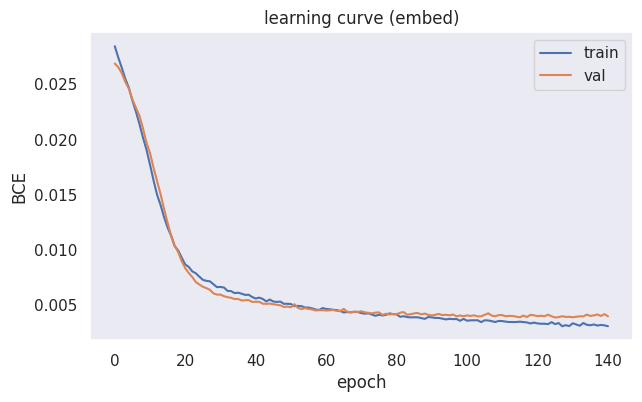

soglia scelta = 0.75


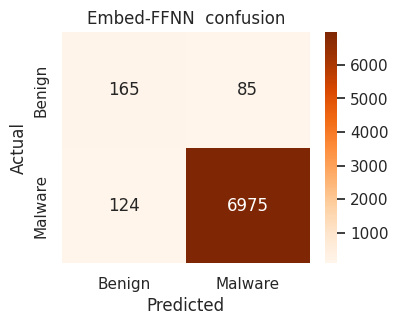

              precision    recall  f1-score   support

      Benign       0.57      0.66      0.61       250
     Malware       0.99      0.98      0.99      7099

    accuracy                           0.97      7349
   macro avg       0.78      0.82      0.80      7349
weighted avg       0.97      0.97      0.97      7349

F1-macro : 0.7987
ROC-AUC  : 0.9457
PR-AUC   : 0.9970


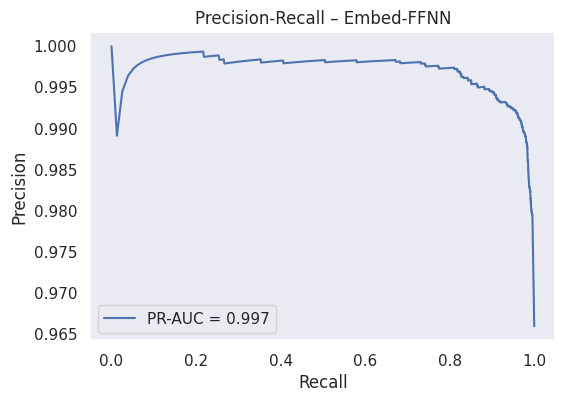

In [ ]:

import torch, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, roc_auc_score,
                             precision_recall_curve, auc)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()

# Tensor dataset
Xtr = torch.tensor(X_train_padded, dtype=torch.long)
Xte = torch.tensor(X_test_padded,  dtype=torch.long)
ytr = torch.tensor(y_train,        dtype=torch.float32)
yte = torch.tensor(y_test,         dtype=torch.float32)

full_ds = TensorDataset(Xtr, ytr)
te_ds   = TensorDataset(Xte, yte)

tr_sz   = int(0.8 * len(full_ds))
val_sz  = len(full_ds) - tr_sz
tr_ds, val_ds = random_split(full_ds, [tr_sz, val_sz])

tr_ld  = DataLoader(tr_ds,  batch_size=64, shuffle=True)
val_ld = DataLoader(val_ds, batch_size=64, shuffle=False)
te_ld  = DataLoader(te_ds,  batch_size=64, shuffle=False)

# FFNN with learned embeddings and weight decay:
# – Loads padded sequences into PyTorch DataLoaders (80/20 train/val split + test set)
# – Defines EmbedFFNN: Embedding(vocab+1 → emb_dim=64) + FFNN layers (128 → 64 → 32 → 1) with BatchNorm & 50% Dropout
# – Uses BCEWithLogitsLoss (with pos_weight), AdamW optimizer (lr=5e-4, weight_decay=1e-2), and OneCycleLR scheduling
# – Measures total training time, applies early stopping on val loss (patience=15)
# – Determines best decision threshold on validation by maximizing macro‑F1 over a grid
# – Evaluates on test set: plots confusion matrix, prints classification report, and computes F1‑macro, ROC‑AUC, PR‑AUC


# model with embeddings
class EmbedFFNN(nn.Module):
    def __init__(self, vocab_sz:int, emb_dim:int=64):
        super().__init__()
        self.emb = nn.Embedding(vocab_sz+1, emb_dim, padding_idx=0)
        self.net = nn.Sequential(
            #nn.Linear(emb_dim, 256),
            #nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(emb_dim, 128),
            nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(128,  64),
            nn.BatchNorm1d(64),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(64,   32),
            nn.BatchNorm1d(32),  nn.ReLU(), nn.Dropout(0.50),
            #nn.Linear(32,   16),
            #nn.BatchNorm1d(16),  nn.ReLU(), nn.Dropout(0.50),
            nn.Linear(32,    1)            # logits
        )
    def forward(self,x):
        z = self.emb(x).mean(dim=1)        # mean-pool
        return self.net(z).squeeze(1)      # (B,)

vocab_sz = len(vocab)
model    = EmbedFFNN(vocab_sz).to(device)

# loss, optimizer and scheduler
import time


num_pos    = (ytr == 1).sum().item()
num_neg    = (ytr == 0).sum().item()
pos_weight = torch.tensor([num_neg / num_pos], device=device)

criterion  = nn.BCEWithLogitsLoss(pos_weight)

# add weight_decay here (e.g. 1e-2)
optimizer  = optim.AdamW(
    model.parameters(),
    lr=5e-4,
    weight_decay=1e-2
)

scheduler  = optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=5e-4,
    epochs=epochs,
    steps_per_epoch=len(tr_ld)
)

# Training
hist_tr, hist_val = [], []
best_val, wait    = float('inf'), 0

start_time = time.time()
for ep in range(1, epochs+1):
    # ---- train ----
    model.train()
    run_train = 0.0
    for x, y in tr_ld:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        loss = criterion(model(x), y)
        loss.backward()
        optimizer.step()
        scheduler.step()
        run_train += loss.item() * x.size(0)
    hist_tr.append(run_train / len(tr_ds))

    # ---- validate ----
    model.eval()
    run_val = 0.0
    with torch.no_grad():
        for x, y in val_ld:
            x, y = x.to(device), y.to(device)
            run_val += criterion(model(x), y).item() * x.size(0)
    val_loss = run_val / len(val_ds)
    hist_val.append(val_loss)

    print(f"Ep {ep:03d}  train={hist_tr[-1]:.4f}  val={val_loss:.4f}")

    if val_loss < best_val:
        best_val, wait, best_w = val_loss, 0, model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("early-stop")
            break

end_time = time.time()
print(f"\nTotal training time: {(end_time - start_time)/60:.2f} min")

model.load_state_dict(best_w)



plt.figure(figsize=(7,4))
plt.plot(hist_tr, label="train")
plt.plot(hist_val, label="val")
plt.xlabel("epoch"); plt.ylabel("BCE")
plt.title("learning curve (embed)")
plt.legend(); plt.grid(); plt.show()

# Threshold during validation
model.eval(); p_val, y_val = [], []
with torch.no_grad():
    for x,y in val_ld:
        p_val.append(torch.sigmoid(model(x.to(device))).cpu())
        y_val.append(y)
p_val = torch.cat(p_val).numpy();  y_val = torch.cat(y_val).numpy()

thr_grid = np.linspace(0.05, 0.95, 19)
best_thr = thr_grid[np.argmax(
            [f1_score(y_val, p_val>=t, average='macro') for t in thr_grid])]
print(f"soglia scelta = {best_thr:.2f}")

# test set validation
p_test, y_test_arr = [], []
with torch.no_grad():
    for x,y in te_ld:
        p_test.append(torch.sigmoid(model(x.to(device))).cpu())
        y_test_arr.append(y)
p_test = torch.cat(p_test).numpy().ravel()
y_test_arr = torch.cat(y_test_arr).numpy().ravel()
pred = (p_test >= best_thr).astype(int)

cm = confusion_matrix(y_test_arr, pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.title("Embed-FFNN  confusion"); plt.show()

print(classification_report(y_test_arr, pred,
                            target_names=['Benign','Malware']))

f1m  = f1_score(y_test_arr, pred, average='macro')
roc  = roc_auc_score(y_test_arr, p_test)
prec, rec, _ = precision_recall_curve(y_test_arr, p_test)
prauc = auc(rec, prec)
print(f"F1-macro : {f1m:.4f}\nROC-AUC  : {roc:.4f}\nPR-AUC   : {prauc:.4f}")

plt.figure(figsize=(6,4))
plt.plot(rec, prec, label=f"PR-AUC = {prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall – Embed-FFNN")
plt.grid(); plt.legend(); plt.show()


In [ ]:
print("Value assigned to <UNK>:", api_to_int["<UNK>"])


Value assigned to <UNK>: 254


In [ ]:
# Conta quante volte compare il token <UNK> nelle sequenze del test set
unk_value = api_to_int["<UNK>"]
test_unknowns = test_df['seq_encoded'].apply(lambda seq: seq.count(unk_value))
print("Unknown token count per sequence (summary):")
print(test_unknowns.describe())


Unknown token count per sequence (summary):
count    7349.000000
mean        0.001361
std         0.063882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: seq_encoded, dtype: float64


# RNN

- RNN


Next, use a Recursive Neural Network (RNN) to model your problem.

 • Do you still have to pad your data? If yes, how?

 • Do you have to truncate the testing sequences? Justify your answer with your under
standing of why it is/it is not the case.

 • Isthere any memory advantage on using an RNN wrt a FFwhenyouprocess your dataset?
 Why?

 • Start with a simple one-directional RNN. Is your network fast as the FF? If not, where
 do you think that time-overhead comes from?

 • Train and the three variations of networks:

 – Simple one-directional RNN

 – Bi-Directional RNN

 – LSTM (choose whether you want it one-directional or bi-directional)

 Can you see any differences during their training? Can you obtain the same

- Our RNN architectures will be "Many-to-One", since it will process a sequence of inputs, producing an output. Commonly used to analyse sequence of log entries to detectan ongoing cyberattack, as it is in our case-study


 • Do you still have to pad your data? If yes, how?

 A:  Yes, it is needed to have all the time-series (in this case API call sequences) of the same length

 • Do you have to truncate the testing sequences? Justify your answer with your under
standing of why it is/it is not the case.

A:  It could not be the case, since doing so you will cut informations reducing test performance and so reducing the understanding on how good your model is performing.

 • Is
 there any memory advantage on using an RNN wrt a FFwhenyouprocess your dataset?
 Why?

A:  Yes, there is. Differntly from a normal FFNN the RNN are able to keep a *state* which evolves during time.

In [ ]:
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
import torch.optim as optim
import torch.nn as nn
import torch

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.io.arff import loadarff
from tqdm import tqdm
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to visualize model performance by creating a confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Creates and displays a confusion matrix to evaluate classification performance.

    Args:
        y_true: Ground truth labels
        y_pred: Predicted labels
        class_names: List of class names for axis labels
    """
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
def training_loop(model, train_loader, val_loader, train_dataset, val_dataset, device, optimizer, num_epochs, criterion):
    """
    Train the model for a specified number of epochs and track the training and validation losses.

    Args:
        model: The neural network model to be trained.
        train_loader: DataLoader for the training dataset.
        val_loader: DataLoader for the validation dataset.
        train_dataset: The entire training dataset.
        val_dataset: The entire validation dataset.
        device: Device to run the model on (CPU or GPU).
        optimizer: The optimization algorithm to use for updating model parameters.
        criterion: The loss function to use for computing the loss.

    Returns:
        None: The function plots the training and validation loss over the epochs.
    """


    # Record the start time
    start_time = time.time()


    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        train_loss = 0
        val_loss = 0
        model.train()  # Set model to training mode
        for batch_X, lengths, batch_y in train_loader:
            batch_X, lengths, batch_y = batch_X.to(device), lengths.to(device), batch_y.to(device)  # Move batch to GPU
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(batch_X,lengths)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            train_loss += loss.item() * batch_X.size(0)
        train_loss /= len(train_dataset)
        train_losses.append(train_loss)  # Store training loss

        # Compute Validation loss during training
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            for batch_X, lengths, batch_y in val_loader:
                batch_X, lengths, batch_y = batch_X.to(device), lengths.to(device), batch_y.to(device)  # Move batch to GPU
                val_outputs = model(batch_X,lengths)  # Forward pass
                loss = criterion(val_outputs, batch_y)  # Compute validation loss
                val_loss += loss.item() * batch_X.size(0)
            val_loss /= len(val_dataset)
            val_losses.append(val_loss)  # Store validation loss
            if (epoch + 1) % 20 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    return

def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, lengths, labels in dataloader:
            inputs, lengths, labels = inputs.to(device), lengths.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs,lengths)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Define class names
    class_names = [f"Class {cls}" for cls in np.unique(y_train)]

    # Plot the confusion matrix
    plot_confusion_matrix(all_labels, all_predictions, class_names)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy

In [ ]:
0.0005

0.0005

#  Start with a simple one-directional RNN.

### Simple one-directional RNN - 1 layer

Maximum Training Sequence Length: 90
Maximum Training Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)
SimpleRNNClassifier(
  (embedding): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Epoch 1/100 - Train Loss: 0.2516, Val Loss: 0.1718
Epoch 2/100 - Train Loss: 0.1656, Val Loss: 0.1681
Epoch 3/100 - Train Loss: 0.1614, Val Loss: 0.1616
Epoch 4/100 - Train Loss: 0.1575, Val Loss: 0.1583
Epoch 5/100 - Train Loss: 0.1546, Val Loss: 0.1563
Epoch 6/100 - Train Loss: 0.1516, Val Loss: 0.1570
Epoch 7/100 - Train Loss: 0.1479, Val Loss: 0.1528
Epoch 8/100 - Train Loss: 0.1457, Val Loss: 0.1525
Epoch 9/100 - Train Loss: 0.1429, Val Loss: 0.1526
Epoch 10/100 - Train Loss: 0.1414, Val Loss: 0.1528
Epoch 11/100 - Train Loss: 0.1384, Val Loss: 0.1480
Epoch 12/100 - Train Loss: 0.1350, Val Loss: 0.1465
Epoch 13/100 - Train Loss

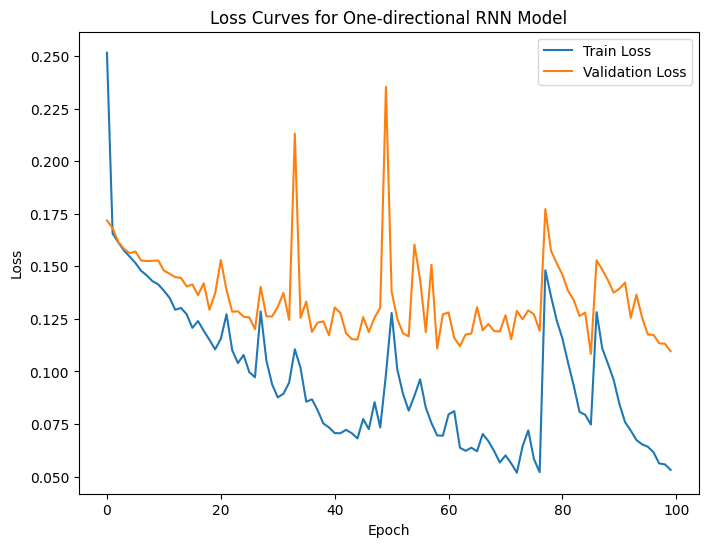

Confusion Matrix:
[[ 119  131]
 [  38 7061]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.76      0.48      0.58       250
     Malware       0.98      0.99      0.99      7099

    accuracy                           0.98      7349
   macro avg       0.87      0.74      0.79      7349
weighted avg       0.97      0.98      0.97      7349



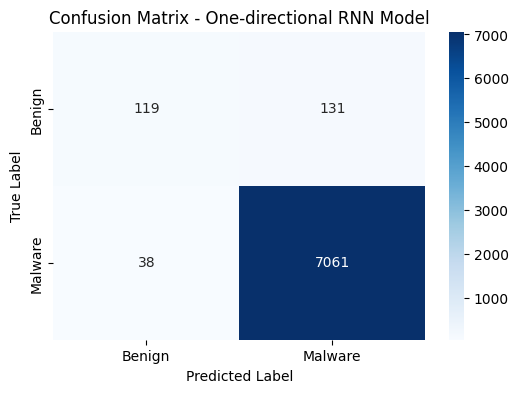

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import pad_sequences
import pandas as pd


# load data

max_len_train = train_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_train)

max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_test)


train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)

#  (post-padding and post-truncation)
X_train_padded = pad_sequences(train_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')
X_test_padded  = pad_sequences(test_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')

print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)


y_train = train_df['is_malware'].values
y_test  = test_df['is_malware'].values



def compute_lengths(padded_sequences):

    return np.sum(padded_sequences != 0, axis=1)

train_lengths = compute_lengths(X_train_padded)
test_lengths  = compute_lengths(X_test_padded)

# Create a custom dataset that returns (sequence, length, label)
class APICallSequenceDataset(Dataset):
    def __init__(self, sequences, lengths, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.labels[idx]

train_dataset = APICallSequenceDataset(X_train_padded, train_lengths, y_train)
test_dataset = APICallSequenceDataset(X_test_padded, test_lengths, y_test)

#  training (80%) and validation (20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# One directional RNN
class SimpleRNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        Simple unidirectional RNN for classification.
        - vocab_size: Number of valid tokens (add 1 for padding).
        - embedding_dim: Dimension of the embeddings.
        - hidden_size: Dimension of the RNN hidden state.
        - output_size: For binary classification, 1.
        - num_layers: Number of RNN layers.
        """

        super(SimpleRNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                          batch_first=True, bidirectional=False, nonlinearity="tanh")
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        # x: (batch_size, max_len)
        embedded = self.embedding(x)  # (batch_size, max_len, embedding_dim)
        # Pack the embedded sequences for efficient processing by the RNN
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, h_n = self.rnn(packed)
        hidden = h_n[-1]  # (batch_size, hidden_size)
        out = self.fc(hidden)  # (batch_size, output_size)
        out = self.sigmoid(out)
        return out


vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64

model_rnn = SimpleRNNClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size, output_size=1, num_layers=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_rnn = model_rnn.to(device)
print(model_rnn)

# loss function optimizer and scheduler
criterion = nn.BCELoss()
optimizer = optim.AdamW(model_rnn.parameters(), lr=0.0005)

num_epochs = 100
train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model_rnn.train()
    running_loss = 0.0
    for batch in train_loader:
        sequences, lengths, labels = batch
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
        optimizer.zero_grad()
        outputs = model_rnn(sequences, lengths)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * sequences.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_rnn.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for batch in val_loader:
            sequences, lengths, labels = batch
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model_rnn(sequences, lengths)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * sequences.size(0)
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f} seconds")

# loss curve of the RNN
plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for One-directional RNN Model")
plt.legend()
plt.show()


# Evaluation with confusion martix
model_rnn.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        sequences, lengths, labels = batch
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
        outputs = model_rnn(sequences, lengths)
        preds = (outputs > 0.5).float()
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - One-directional RNN Model")
plt.show()


### Simple one-directional RNN -2 layers and pos_weigth and dropout

TwoLayerRNN(
  (emb): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 01 | train 0.0544 | val 0.0504
Epoch 02 | train 0.0473 | val 0.0448
Epoch 03 | train 0.0422 | val 0.0446
Epoch 04 | train 0.0414 | val 0.0420
Epoch 05 | train 0.0398 | val 0.0427
Epoch 06 | train 0.0398 | val 0.0401
Epoch 07 | train 0.0360 | val 0.0413
Epoch 08 | train 0.0351 | val 0.0364
Epoch 09 | train 0.0341 | val 0.0404
Epoch 10 | train 0.0327 | val 0.0401
Epoch 11 | train 0.0323 | val 0.0341
Epoch 12 | train 0.0312 | val 0.0334
Epoch 13 | train 0.0311 | val 0.0330
Epoch 14 | train 0.0277 | val 0.0339
Epoch 15 | train 0.0295 | val 0.0361
Epoch 16 | train 0.0274 | val 0.0334
Epoch 17 | train 0.0324 | val 0.0388
Epoch 18 | train 0.0520 | val 0.0502
Epoch 19 | train 0.0405 | val 0.0433
Early stop
Training time: 35.1s
              precision    recall  f1-score   support

      Benign       0.10     

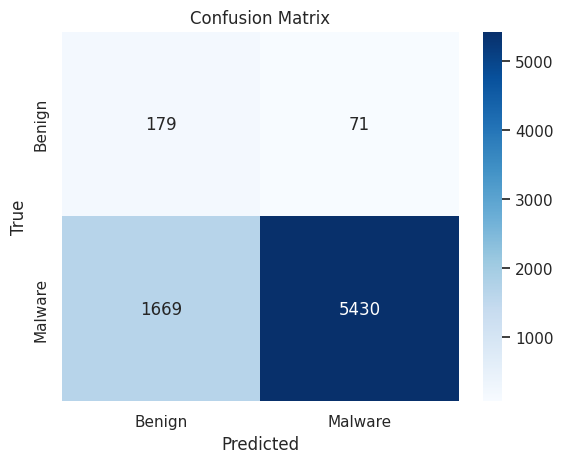

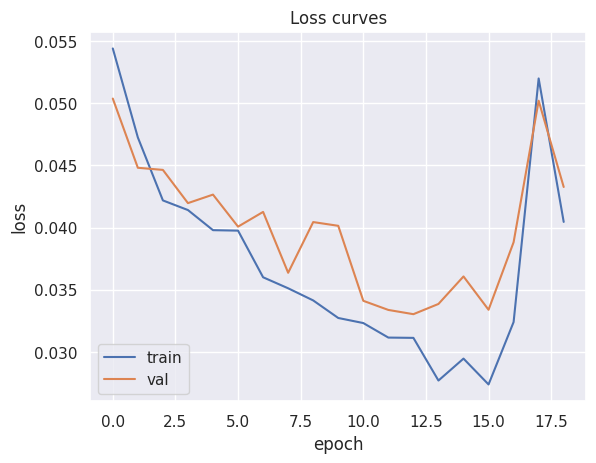

In [ ]:

"""
Two-Layer One-Directional RNN with Inter-Layer Dropout
Dataset: API-call sequences – malware vs benign
Changes vs. original notebook
--------------------------------
1. num_layers = 2  (instead of 1)
2. dropout   = 0.20 applied between RNN layer-0 and layer-1
3. BCEWithLogitsLoss + pos_weight  (logits out  ➜  sigmoid only at inference)
Everything else (padding, loaders, training loop) untouched.
"""

import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences


def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()

# data preparation
max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df ['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):  return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(full_ds, [int(.8*len(full_ds)),
                                          len(full_ds)-int(.8*len(full_ds))])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)

# ------------------------------------------------------------------#


# RNN with drop out layers in between
class TwoLayerRNN(nn.Module):
    def __init__(self, vocab_size, emb_dim=50, hid_rnn=64,
                 num_layers=2, dropout=0.2):
        super().__init__()
        self.emb = nn.Embedding(vocab_size+1, emb_dim, padding_idx=0)

        self.rnn = nn.RNN(
            input_size    = emb_dim,
            hidden_size   = hid_rnn,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = False,
            nonlinearity  = "tanh",
            dropout       = dropout      # active because num_layers > 1
        )

        self.fc = nn.Linear(hid_rnn, 1)   # LOGIT

    def forward(self, x, lengths):
        x = self.emb(x)                                    # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, h_n = self.rnn(x)                               # h_n: (2, B, H)
        logits = self.fc(h_n[-1])                          # (B, 1)
        return logits.squeeze(1)                           # (B,)

# ------------------------------------------------------------------#
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = TwoLayerRNN(len(vocab), emb_dim=50, hid_rnn=64).to(device)
print(model)

# pos_weight for imbalance
pos_w = torch.tensor([(y_train==0).sum() / (y_train==1).sum()]).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_w)
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------------#
# 3. training + early-stop
best, patience, no_imp = 1e9, 6, 0
tr_hist, val_hist = [], []
start = time.time()

def epoch_pass(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    tot = 0.0
    for seq,lens,lbl in loader:
        seq,lens,lbl = seq.to(device), lens.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq,lens), lbl)
        if train: loss.backward(); optimizer.step()
        tot += loss.item()*seq.size(0)
    return tot/len(loader.dataset)

for ep in range(100):
    tr = epoch_pass(train_ld, True)
    vl = epoch_pass(val_ld,   False)
    tr_hist.append(tr); val_hist.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best:
        best, no_imp = vl, 0; best_state = model.state_dict()
    else:
        no_imp += 1
        if no_imp >= patience: print('Early stop'); break

print(f"Training time: {time.time()-start:.1f}s")
model.load_state_dict(best_state)

# ------------------------------------------------------------------#
# 4. evaluation
def predict(loader):
    model.eval()
    p,l = [], []
    with torch.no_grad():
        for s,ln,lb in loader:
            s,ln = s.to(device), ln.to(device)
            p.append((torch.sigmoid(model(s,ln)) > 0.5).cpu())
            l.append(lb)
    return torch.cat(p).numpy(), torch.cat(l).numpy()

pred,true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign','Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# ------------------------------------------------------------------#
# 5. loss curves
plt.plot(tr_hist, label='train'); plt.plot(val_hist, label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss curves'); plt.legend(); plt.show()


## Simple one-directional RNN -2 layers and pos_weigth and without dropout

TwoLayerRNN(
  (emb): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 01 | train 0.0540 | val 0.0500
Epoch 02 | train 0.0466 | val 0.0447
Epoch 03 | train 0.0414 | val 0.0460
Epoch 04 | train 0.0390 | val 0.0401
Epoch 05 | train 0.0392 | val 0.0421
Epoch 06 | train 0.0373 | val 0.0398
Epoch 07 | train 0.0350 | val 0.0408
Epoch 08 | train 0.0337 | val 0.0378
Epoch 09 | train 0.0402 | val 0.0435
Epoch 10 | train 0.0334 | val 0.0420
Epoch 11 | train 0.0320 | val 0.0378
Epoch 12 | train 0.0296 | val 0.0373
Epoch 13 | train 0.0280 | val 0.0393
Epoch 14 | train 0.0264 | val 0.0379
Epoch 15 | train 0.0256 | val 0.0361
Epoch 16 | train 0.0239 | val 0.0396
Epoch 17 | train 0.0280 | val 0.0373
Epoch 18 | train 0.0240 | val 0.0345
Epoch 19 | train 0.0214 | val 0.0334
Epoch 20 | train 0.0205 | val 0.0331
Epoch 21 | train 0.0201 | val 0.0377
Epoch 22 | train 0.0197 | val 0.0374
Epoch 23 | train 

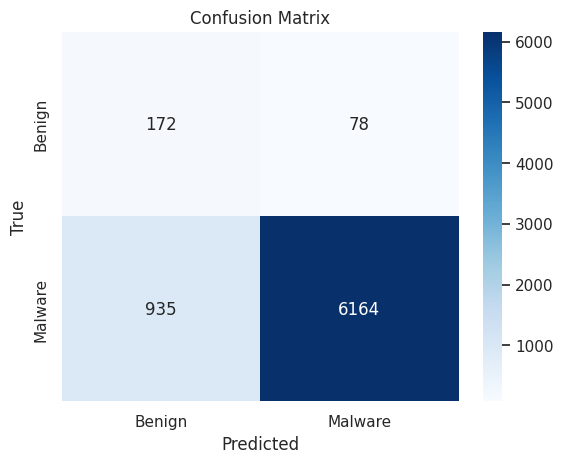

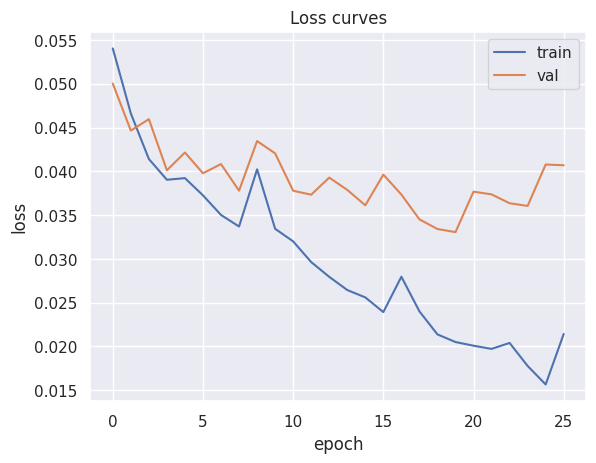

In [ ]:
# TwoLayerRNN pipeline:
# – Seed everything for reproducibility
# – Pad and truncate sequences to the same max length, record true lengths
# – Wrap sequences, lengths, and labels into a custom Dataset (SeqDataset)
# – Split into 80/20 train/validation and create DataLoaders plus a test loader
# – Define TwoLayerRNN: 50‑dim embeddings → 2‑layer RNN (tanh) → linear output (logits)
# – Use pos‑weighted BCEWithLogitsLoss and AdamW optimizer (lr=5e‑4)
# – Train for up to 100 epochs with early stopping (patience=6), tracking train/val loss
# – After training, load best weights, predict on test set (threshold 0.5)
# – Report classification metrics and confusion matrix, and plot train/val loss curves


import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences


def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()

# prepare data
max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df ['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):  return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(full_ds, [int(.8*len(full_ds)),
                                          len(full_ds)-int(.8*len(full_ds))])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)


class TwoLayerRNN(nn.Module):
    def __init__(self, vocab_size, emb_dim=50, hid_rnn=64,
                 num_layers=2, dropout=0):
        super().__init__()
        self.emb = nn.Embedding(vocab_size+1, emb_dim, padding_idx=0)

        self.rnn = nn.RNN(
            input_size    = emb_dim,
            hidden_size   = hid_rnn,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = False,
            nonlinearity  = "tanh"
        )

        self.fc = nn.Linear(hid_rnn, 1)   # LOGIT

    def forward(self, x, lengths):
        x = self.emb(x)                                    # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, h_n = self.rnn(x)                               # h_n: (2, B, H)
        logits = self.fc(h_n[-1])                          # (B, 1)
        return logits.squeeze(1)                           # (B,)

# ------------------------------------------------------------------#
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = TwoLayerRNN(len(vocab), emb_dim=50, hid_rnn=64).to(device)
print(model)

# pos_weight for imbalance
pos_w = torch.tensor([(y_train==0).sum() / (y_train==1).sum()]).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_w)
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------------#
# 3. training + early-stop
best, patience, no_imp = 1e9, 6, 0
tr_hist, val_hist = [], []
start = time.time()

def epoch_pass(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    tot = 0.0
    for seq,lens,lbl in loader:
        seq,lens,lbl = seq.to(device), lens.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq,lens), lbl)
        if train: loss.backward(); optimizer.step()
        tot += loss.item()*seq.size(0)
    return tot/len(loader.dataset)

for ep in range(100):
    tr = epoch_pass(train_ld, True)
    vl = epoch_pass(val_ld,   False)
    tr_hist.append(tr); val_hist.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best:
        best, no_imp = vl, 0; best_state = model.state_dict()
    else:
        no_imp += 1
        if no_imp >= patience: print('Early stop'); break

print(f"Training time: {time.time()-start:.1f}s")
model.load_state_dict(best_state)

# ------------------------------------------------------------------#
# 4. evaluation
def predict(loader):
    model.eval()
    p,l = [], []
    with torch.no_grad():
        for s,ln,lb in loader:
            s,ln = s.to(device), ln.to(device)
            p.append((torch.sigmoid(model(s,ln)) > 0.5).cpu())
            l.append(lb)
    return torch.cat(p).numpy(), torch.cat(l).numpy()

pred,true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign','Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# ------------------------------------------------------------------#
# 5. loss curves
plt.plot(tr_hist, label='train'); plt.plot(val_hist, label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss curves'); plt.legend(); plt.show()


## Simple one-directional RNN -2 layers, dropout (0,2) without pos_weigth

TwoLayerRNN(
  (emb): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 01 | train 0.2203 | val 0.1564
Epoch 02 | train 0.1661 | val 0.1527
Epoch 03 | train 0.1615 | val 0.1511
Epoch 04 | train 0.1566 | val 0.1488
Epoch 05 | train 0.1514 | val 0.1453
Epoch 06 | train 0.1448 | val 0.1397
Epoch 07 | train 0.1378 | val 0.1300
Epoch 08 | train 0.1438 | val 0.1425
Epoch 09 | train 0.1360 | val 0.1284
Epoch 10 | train 0.1303 | val 0.1371
Epoch 11 | train 0.1271 | val 0.1221
Epoch 12 | train 0.1324 | val 0.1205
Epoch 13 | train 0.1179 | val 0.1652
Epoch 14 | train 0.1282 | val 0.1238
Epoch 15 | train 0.1173 | val 0.1370
Epoch 16 | train 0.1165 | val 0.1171
Epoch 17 | train 0.1226 | val 0.1162
Epoch 18 | train 0.1087 | val 0.1207
Epoch 19 | train 0.1024 | val 0.1188
Epoch 20 | train 0.1046 | val 0.1175
Epoch 21 | train 0.1014 | val 0.1363
Epoch 22 | train 0.0979 | val 0.1116
Epoc

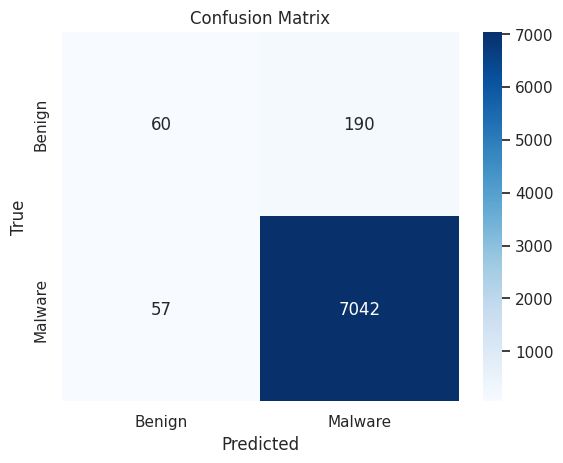

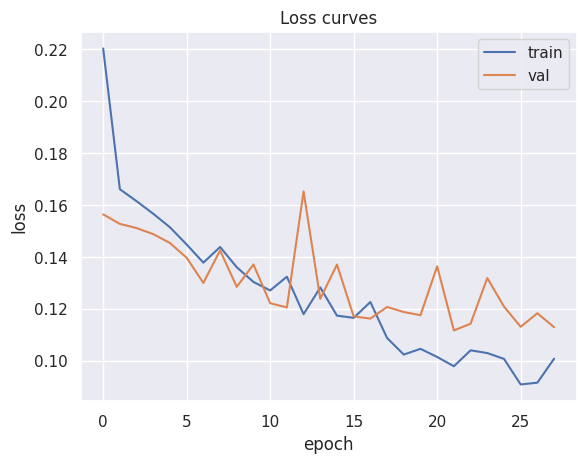

In [ ]:
"""
Two-Layer One-Directional RNN with Inter-Layer Dropout
Dataset: API-call sequences – malware vs benign

--------------------------------
1. num_layers = 2  (instead of 1)
2. BCEWithLogitsLoss   (logits out  ➜  sigmoid only at inference)
2. Dropout 0.2
Everything else (padding, loaders, training loop) untouched.
"""

import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences

# ------------------------------------------------------------------#
#  reproducibility utility
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()

# ------------------------------------------------------------------#

max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df ['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):  return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(full_ds, [int(.8*len(full_ds)),
                                          len(full_ds)-int(.8*len(full_ds))])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)

# ------------------------------------------------------------------#
# 2. model (2-layer RNN + dropout between layers)
class TwoLayerRNN(nn.Module):
    def __init__(self, vocab_size, emb_dim=50, hid_rnn=64,
                 num_layers=2, dropout=0.2):
        super().__init__()
        self.emb = nn.Embedding(vocab_size+1, emb_dim, padding_idx=0)

        self.rnn = nn.RNN(
            input_size    = emb_dim,
            hidden_size   = hid_rnn,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = False,
            nonlinearity  = "tanh",
            dropout       = dropout
        )

        self.fc = nn.Linear(hid_rnn, 1)   # LOGIT

    def forward(self, x, lengths):
        x = self.emb(x)                                    # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, h_n = self.rnn(x)                               # h_n: (2, B, H)
        logits = self.fc(h_n[-1])                          # (B, 1)
        return logits.squeeze(1)                           # (B,)

# ------------------------------------------------------------------#
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = TwoLayerRNN(len(vocab), emb_dim=50, hid_rnn=64).to(device)
print(model)

# pos_weight for imbalance
pos_w = torch.tensor([(y_train==0).sum() / (y_train==1).sum()]).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------------#
# 3. training + early-stop
best, patience, no_imp = 1e9, 6, 0
tr_hist, val_hist = [], []
start = time.time()

def epoch_pass(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    tot = 0.0
    for seq,lens,lbl in loader:
        seq,lens,lbl = seq.to(device), lens.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq,lens), lbl)
        if train: loss.backward(); optimizer.step()
        tot += loss.item()*seq.size(0)
    return tot/len(loader.dataset)

for ep in range(100):
    tr = epoch_pass(train_ld, True)
    vl = epoch_pass(val_ld,   False)
    tr_hist.append(tr); val_hist.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best:
        best, no_imp = vl, 0; best_state = model.state_dict()
    else:
        no_imp += 1
        if no_imp >= patience: print('Early stop'); break

print(f"Training time: {time.time()-start:.1f}s")
model.load_state_dict(best_state)

# ------------------------------------------------------------------#
# 4. evaluation
def predict(loader):
    model.eval()
    p,l = [], []
    with torch.no_grad():
        for s,ln,lb in loader:
            s,ln = s.to(device), ln.to(device)
            p.append((torch.sigmoid(model(s,ln)) > 0.5).cpu())
            l.append(lb)
    return torch.cat(p).numpy(), torch.cat(l).numpy()

pred,true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign','Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# ------------------------------------------------------------------#
# 5. loss curves
plt.plot(tr_hist, label='train'); plt.plot(val_hist, label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss curves'); plt.legend(); plt.show()


## Simple one-directional RNN -2 layers,  without pos_weigth and dropout (0,2)

TwoLayerRNN(
  (emb): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Epoch 01 | train 0.2187 | val 0.1567
Epoch 02 | train 0.1660 | val 0.1522
Epoch 03 | train 0.1613 | val 0.1514
Epoch 04 | train 0.1567 | val 0.1484
Epoch 05 | train 0.1509 | val 0.1465
Epoch 06 | train 0.1437 | val 0.1377
Epoch 07 | train 0.1384 | val 0.1317
Epoch 08 | train 0.1346 | val 0.1298
Epoch 09 | train 0.1244 | val 0.1335
Epoch 10 | train 0.1367 | val 0.1400
Epoch 11 | train 0.1270 | val 0.1350
Epoch 12 | train 0.1165 | val 0.1258
Epoch 13 | train 0.1113 | val 0.1217
Epoch 14 | train 0.1169 | val 0.1245
Epoch 15 | train 0.1020 | val 0.1145
Epoch 16 | train 0.1000 | val 0.1316
Epoch 17 | train 0.0970 | val 0.1127
Epoch 18 | train 0.0922 | val 0.1160
Epoch 19 | train 0.0896 | val 0.1411
Epoch 20 | train 0.1151 | val 0.1457
Epoch 21 | train 0.1130 | val 0.1354
Epoch 22 | train 0.0944 | val 0.1165
Epoch 23 | train 

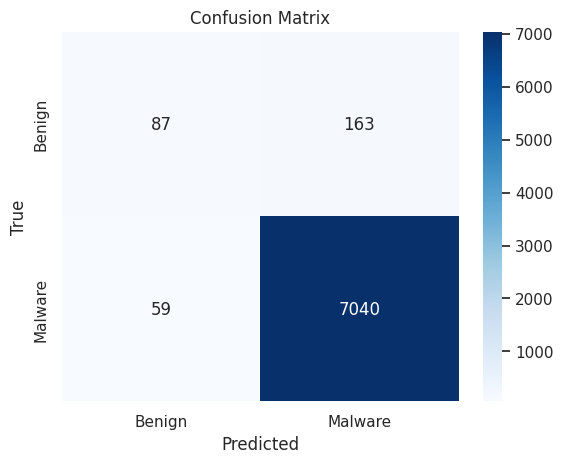

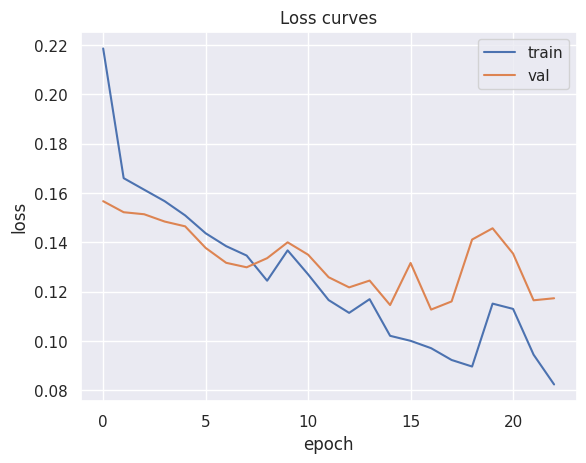

In [ ]:
"""
Two-Layer One-Directional RNN with Inter-Layer Dropout
Dataset: API-call sequences – malware vs benign
Changes vs. original notebook
--------------------------------
1. num_layers = 2  (instead of 1)
2. BCEWithLogitsLoss   (logits out  ➜  sigmoid only at inference)
Everything else (padding, loaders, training loop) untouched.
"""

import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences

# ------------------------------------------------------------------#
# 0. reproducibility utility
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()

# ------------------------------------------------------------------#

max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df ['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):  return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(full_ds, [int(.8*len(full_ds)),
                                          len(full_ds)-int(.8*len(full_ds))])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)

# ------------------------------------------------------------------#
# 2. model (2-layer RNN + dropout between layers)
class TwoLayerRNN(nn.Module):
    def __init__(self, vocab_size, emb_dim=50, hid_rnn=64,
                 num_layers=2, dropout=0.2):
        super().__init__()
        self.emb = nn.Embedding(vocab_size+1, emb_dim, padding_idx=0)

        self.rnn = nn.RNN(
            input_size    = emb_dim,
            hidden_size   = hid_rnn,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = False,
            nonlinearity  = "tanh"
        )

        self.fc = nn.Linear(hid_rnn, 1)   # LOGIT

    def forward(self, x, lengths):
        x = self.emb(x)                                    # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, h_n = self.rnn(x)                               # h_n: (2, B, H)
        logits = self.fc(h_n[-1])                          # (B, 1)
        return logits.squeeze(1)                           # (B,)

# ------------------------------------------------------------------#
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = TwoLayerRNN(len(vocab), emb_dim=50, hid_rnn=64).to(device)
print(model)

# pos_weight for imbalance
pos_w = torch.tensor([(y_train==0).sum() / (y_train==1).sum()]).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------------#
# 3. training + early-stop
best, patience, no_imp = 1e9, 6, 0
tr_hist, val_hist = [], []
start = time.time()

def epoch_pass(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    tot = 0.0
    for seq,lens,lbl in loader:
        seq,lens,lbl = seq.to(device), lens.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq,lens), lbl)
        if train: loss.backward(); optimizer.step()
        tot += loss.item()*seq.size(0)
    return tot/len(loader.dataset)

for ep in range(100):
    tr = epoch_pass(train_ld, True)
    vl = epoch_pass(val_ld,   False)
    tr_hist.append(tr); val_hist.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best:
        best, no_imp = vl, 0; best_state = model.state_dict()
    else:
        no_imp += 1
        if no_imp >= patience: print('Early stop'); break

print(f"Training time: {time.time()-start:.1f}s")
model.load_state_dict(best_state)

# ------------------------------------------------------------------#
# 4. evaluation
def predict(loader):
    model.eval()
    p,l = [], []
    with torch.no_grad():
        for s,ln,lb in loader:
            s,ln = s.to(device), ln.to(device)
            p.append((torch.sigmoid(model(s,ln)) > 0.5).cpu())
            l.append(lb)
    return torch.cat(p).numpy(), torch.cat(l).numpy()

pred,true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign','Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# ------------------------------------------------------------------#
# 5. loss curves
plt.plot(tr_hist, label='train'); plt.plot(val_hist, label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss curves'); plt.legend(); plt.show()


# One-Directional RNN Model with Additional FFNN before Output layer with dropout and without pos_weigth

23.54684512428298
Epoch 01: train 0.2510 | val 0.1560
Epoch 02: train 0.1686 | val 0.1545
Epoch 03: train 0.1677 | val 0.1557
Epoch 04: train 0.1613 | val 0.1529
Epoch 05: train 0.1580 | val 0.1524
Epoch 06: train 0.1602 | val 0.1559
Epoch 07: train 0.1587 | val 0.1477
Epoch 08: train 0.1522 | val 0.1480
Epoch 09: train 0.1475 | val 0.1423
Epoch 10: train 0.1444 | val 0.1422
Epoch 11: train 0.1434 | val 0.1364
Epoch 12: train 0.1410 | val 0.1361
Epoch 13: train 0.1387 | val 0.1357
Epoch 14: train 0.1403 | val 0.1403
Epoch 15: train 0.1376 | val 0.1536
Epoch 16: train 0.1365 | val 0.1357
Epoch 17: train 0.1393 | val 0.1358
Epoch 18: train 0.1330 | val 0.1374
Epoch 19: train 0.1293 | val 0.1324
Epoch 20: train 0.1266 | val 0.1320
Epoch 21: train 0.1245 | val 0.1343
Epoch 22: train 0.1265 | val 0.1277
Epoch 23: train 0.1212 | val 0.1313
Epoch 24: train 0.1238 | val 0.1285
Epoch 25: train 0.1162 | val 0.1282
Epoch 26: train 0.1150 | val 0.1298
Epoch 27: train 0.1104 | val 0.1271
Epoch 28: 

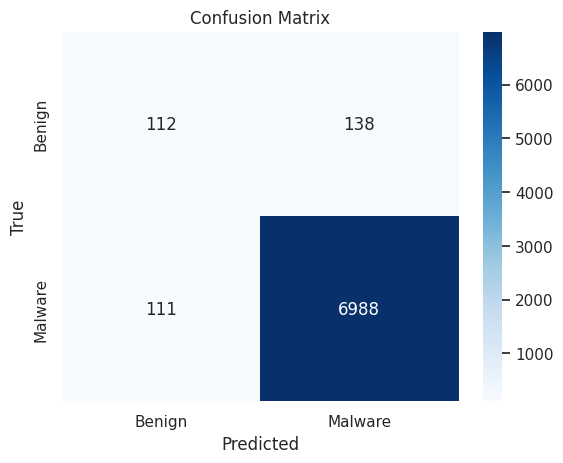

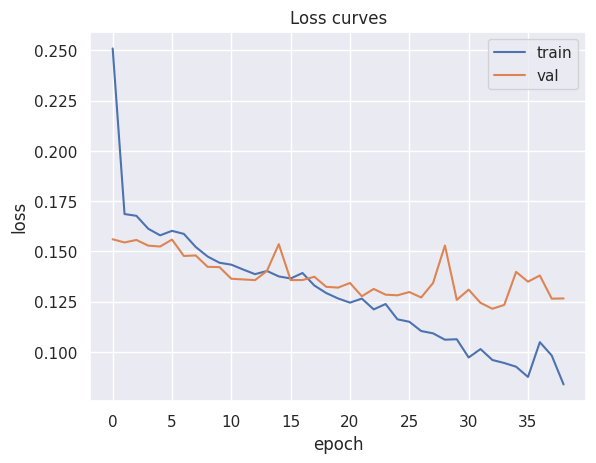

In [ ]:
# Two-layer RNN classification pipeline:
# – Split into 80/20 train/validation and create DataLoaders (batch_size=64)
# – Define RNN_FC: 50-dim embeddings → 1-layer RNN (tanh) → 64-unit FC + ReLU + 20% Dropout → logit output
# – Use BCEWithLogitsLoss, AdamW optimizer (lr=5e-4), and early stopping (patience=6)
# – Training loop logs train/val loss per epoch and retains best model weights
# – After training, load best weights, predict on test set (threshold=0.5), and print classification report
# – Generate confusion matrix and plot train/validation loss curves


import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences


def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()

# 1. data prep
max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df ['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):  return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(full_ds, [int(.8*len(full_ds)),
                                          len(full_ds)-int(.8*len(full_ds))])

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)

# --------------------------------------------------#
# 2. model
class RNN_FC(nn.Module):
    def __init__(self, vocab_size, emb_dim=50, hid_rnn=64,
                 hid_fc=64, num_layers=1, dropout=0.2):
        super().__init__()
        self.emb  = nn.Embedding(vocab_size+1, emb_dim, padding_idx=0)
        self.rnn  = nn.RNN(emb_dim, hid_rnn, num_layers=num_layers,
                           batch_first=True, nonlinearity='tanh')
        self.fc1  = nn.Linear(hid_rnn, hid_fc)
        self.drop = nn.Dropout(dropout)
        self.fc2  = nn.Linear(hid_fc, 1)   # <-- LOGIT
        self.relu = nn.ReLU()

    def forward(self, x, lengths):
        x = self.emb(x)
        x = pack_padded_sequence(x, lengths.cpu(), batch_first=True,
                                 enforce_sorted=False)
        _, h_n = self.rnn(x)               # h_n: (layers, B, hid)
        h = h_n[-1]                        # ultimo stato forward
        h = self.relu(self.fc1(h))
        h = self.drop(h)
        logits = self.fc2(h)               # shape: (B, 1)
        return logits.squeeze(1)           # (B,)

# --------------------------------------------------#
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = RNN_FC(len(vocab), emb_dim=50, hid_rnn=64, hid_fc=64).to(device)

imb_ratio = (y_train==1).sum() / (y_train==0).sum()   # ≈ 5.5
print(imb_ratio)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# --------------------------------------------------#
# 3. train + early stop
best, patience, no_imp = 1e9, 6, 0
train_loss_hist, val_loss_hist = [], []
start = time.time()

def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    tot = 0.0
    for seq,leng,lbl in loader:
        seq,leng,lbl = seq.to(device), leng.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        logits = model(seq,leng)
        loss   = criterion(logits, lbl)
        if train:
            loss.backward(); optimizer.step()
        tot += loss.item()*seq.size(0)
    return tot/len(loader.dataset)

for epoch in range(100):
    tr = run_epoch(train_ld, True)
    vl = run_epoch(val_ld,   False)
    train_loss_hist.append(tr); val_loss_hist.append(vl)
    print(f'Epoch {epoch+1:02d}: train {tr:.4f} | val {vl:.4f}')
    if vl < best:
        best, no_imp = vl, 0
        best_state = model.state_dict()
    else:
        no_imp += 1
        if no_imp >= patience:
            print('Early-stopping.'); break

print(f'Training time: {time.time()-start:.1f}s')
model.load_state_dict(best_state)

# --------------------------------------------------#
# 4. evaluation
def predict(loader):
    model.eval()
    all_p, all_l = [], []
    with torch.no_grad():
        for seq,leng,lbl in loader:
            seq,leng = seq.to(device), leng.to(device)
            logits   = model(seq,leng)
            probs    = torch.sigmoid(logits)
            all_p.append((probs>0.5).cpu())
            all_l.append(lbl)
    return torch.cat(all_p).numpy(), torch.cat(all_l).numpy()

pred, true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign','Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix'); plt.show()

# --------------------------------------------------#
# 5. loss curves
plt.plot(train_loss_hist, label='train')
plt.plot(val_loss_hist,   label='val')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.title('Loss curves'); plt.legend(); plt.show()


# Same as the First Simple RNN Model but with early stopping, adding pos_weight -> sligthly better

Maximum Training Sequence Length: 90
Maximum Test Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)
SimpleRNNClassifier(
  (embedding): Embedding(255, 50, padding_idx=0)
  (rnn): RNN(50, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
Calculated pos_weight for BCEWithLogitsLoss: 0.0425
Epoch 01/100 - Train Loss: 0.0551, Val Loss: 0.0508
Epoch 02/100 - Train Loss: 0.0480, Val Loss: 0.0451
Epoch 03/100 - Train Loss: 0.0432, Val Loss: 0.0441
Epoch 04/100 - Train Loss: 0.0407, Val Loss: 0.0415
Epoch 05/100 - Train Loss: 0.0403, Val Loss: 0.0427
Epoch 06/100 - Train Loss: 0.0388, Val Loss: 0.0410
Epoch 07/100 - Train Loss: 0.0367, Val Loss: 0.0401
Epoch 08/100 - Train Loss: 0.0356, Val Loss: 0.0366
Epoch 09/100 - Train Loss: 0.0353, Val Loss: 0.0490
Epoch 10/100 - Train Loss: 0.0417, Val Loss: 0.0418
Epoch 11/100 - Train Loss: 0.0357, Val Loss: 0.0400
Epoch 12/100 - Train Loss: 0.0341, Val Loss

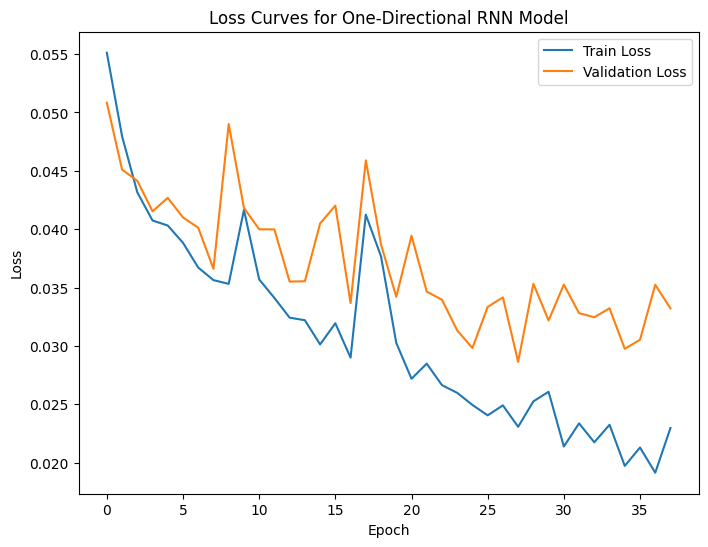

Confusion Matrix:
[[ 216   34]
 [ 888 6211]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.20      0.86      0.32       250
     Malware       0.99      0.87      0.93      7099

    accuracy                           0.87      7349
   macro avg       0.60      0.87      0.62      7349
weighted avg       0.97      0.87      0.91      7349



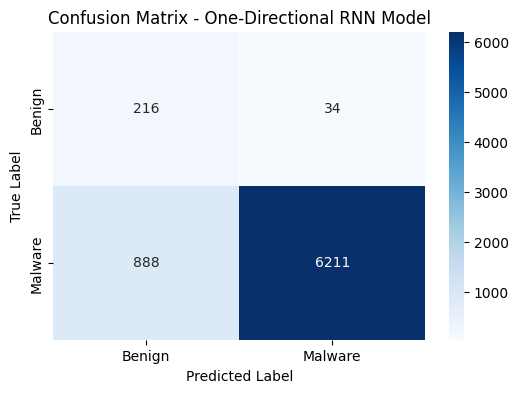

In [ ]:
import time, random, numpy as np, pandas as pd, torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns


def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
set_seed()



max_len_train = train_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_train)

max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Test Sequence Length:", max_len_test)


train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)


max_seq_len = max(max_len_train, max_len_test)
X_train_padded = pad_sequences(train_df['seq_encoded'], maxlen=max_seq_len, padding='post', truncating='post')
X_test_padded  = pad_sequences(test_df['seq_encoded'], maxlen=max_seq_len, padding='post', truncating='post')


print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)

y_train = train_df['is_malware'].values
y_test  = test_df['is_malware'].values

def compute_lengths(padded_sequences):
    return np.sum(padded_sequences != 0, axis=1)

train_lengths = compute_lengths(X_train_padded)
test_lengths  = compute_lengths(X_test_padded)

class APICallSequenceDataset(Dataset):
    def __init__(self, sequences, lengths, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.labels[idx]

train_dataset = APICallSequenceDataset(X_train_padded, train_lengths, y_train)
test_dataset = APICallSequenceDataset(X_test_padded, test_lengths, y_test)


train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


class SimpleRNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        Simple unidirectional RNN for classification.
        - vocab_size: Number of valid tokens (add 1 for padding).
        - embedding_dim: Dimension of the embeddings.
        - hidden_size: Dimension of the RNN hidden state.
        - output_size: For binary classification, 1.
        - num_layers: Number of RNN layers.
        """
        super(SimpleRNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                          batch_first=True, bidirectional=False, nonlinearity="tanh")
        self.fc = nn.Linear(hidden_size, output_size)
        # Removed Sigmoid here, as BCEWithLogitsLoss handles it internally

    def forward(self, x, lengths):
        # x: (batch_size, max_len)
        embedded = self.embedding(x)  # (batch_size, max_len, embedding_dim)

        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_output, h_n = self.rnn(packed)
        hidden = h_n[-1]  # (batch_size, hidden_size)
        out = self.fc(hidden)  # (batch_size, output_size)
        return out.squeeze(1) # Ensure output shape is (batch_size,)




try:
    vocab_size = len(vocab)
except NameError:
    print("Error: 'vocab' is not defined. Please ensure the vocabulary is built in a previous cell.")
    pass


embedding_dim = 50
hidden_size = 64

model_rnn = SimpleRNNClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size, output_size=1, num_layers=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_rnn = model_rnn.to(device)
print(model_rnn)

#Configure Loss Function, Optimizer, and Training Loop with Early Stopping

try:
    # Calculate pos_weight for BCEWithLogitsLoss
    num_pos = (y_train == 1).sum()
    num_neg = (y_train == 0).sum()
    # Ensure these are Python numbers before division
    pos_weight_value = num_neg / num_pos
    pos_weight = torch.tensor([pos_weight_value], device=device)
    print(f"Calculated pos_weight for BCEWithLogitsLoss: {pos_weight_value:.4f}")
    # Use BCEWithLogitsLoss with pos_weight
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight).to(device)
except NameError:
    print("Warning: y_train not found. Proceeding without pos_weight.")
    criterion = nn.BCEWithLogitsLoss().to(device)
except TypeError:
    # Handle case where num_pos or num_neg might be torch tensors if y_train was a tensor
    print("Warning: Could not calculate pos_weight. Ensure y_train is a numpy array or list.")
    criterion = nn.BCEWithLogitsLoss().to(device)



optimizer = optim.AdamW(model_rnn.parameters(), lr=0.0005)

num_epochs = 100
patience = 10
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None # Initialize best_model_state

train_losses = []
val_losses = []

start_time = time.time()


for epoch in range(num_epochs):
    model_rnn.train()
    running_loss = 0.0

    for sequences, lengths, labels in train_loader:
        sequences = sequences.to(device)
        lengths   = lengths.to(device)
        labels    = labels.to(device)    # no .detach()

        optimizer.zero_grad()

        # forward
        outputs = model_rnn(sequences, lengths)

        # compute loss
        loss = criterion(outputs, labels)

        # backprop
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * sequences.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_rnn.eval()
    running_val_loss = 0.0

    # Correct the indentation of this loop
    for sequences, lengths, labels in val_loader:
        # Move data to device
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device)

        # Forward pass
        outputs = model_rnn(sequences, lengths) # outputs are logits

        # Calculate loss (gradients are disabled here)
        loss = criterion(outputs, labels) # Loss calculation with logits and labels

        running_val_loss += loss.item() * sequences.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1:02d}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

    # Early stopping check
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0
        best_model_state = model_rnn.state_dict() # Save model state
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f} seconds")

# Load the best model state if it was saved
if best_model_state is not None:
    model_rnn.load_state_dict(best_model_state)
else:
    print("Warning: Best model state was not saved (e.g., due to no improvement). Using the last epoch's model.")


# Plot Loss Curves for the RNN Model

plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for One-Directional RNN Model")
plt.legend()
plt.show()

# Evaluate the RNN Model on the Test Set and Plot Confusion Matrix

model_rnn.eval()
all_preds = []
all_labels = []
with torch.no_grad(): # Ensure no gradients are calculated during evaluation
    for sequences, lengths, labels in test_loader:
        # Move data to device
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device)

        # Forward pass
        outputs = model_rnn(sequences, lengths) # outputs are logits

        # Apply sigmoid to logits to get probabilities for prediction thresholding
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float() # Threshold probabilities at 0.5
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - One-Directional RNN Model")
plt.show()

# One-Directional Simple RNN, Bi-Directional RNN, LSTM One-Directional

Maximum Training Sequence Length: 90
Maximum Test Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)

--- Training Simple One-Directional RNN ---
Epoch 01/100 - Train Loss: 0.2207, Val Loss: 0.1802
Epoch 02/100 - Train Loss: 0.1609, Val Loss: 0.1758
Epoch 03/100 - Train Loss: 0.1575, Val Loss: 0.1739
Epoch 04/100 - Train Loss: 0.1557, Val Loss: 0.1736
Epoch 05/100 - Train Loss: 0.1565, Val Loss: 0.1723
Epoch 06/100 - Train Loss: 0.1520, Val Loss: 0.1675
Epoch 07/100 - Train Loss: 0.1468, Val Loss: 0.1640
Epoch 08/100 - Train Loss: 0.1470, Val Loss: 0.1635
Epoch 09/100 - Train Loss: 0.1401, Val Loss: 0.1648
Epoch 10/100 - Train Loss: 0.1366, Val Loss: 0.1789
Epoch 11/100 - Train Loss: 0.1361, Val Loss: 0.1658
Epoch 12/100 - Train Loss: 0.1338, Val Loss: 0.1578
Epoch 13/100 - Train Loss: 0.1296, Val Loss: 0.1597
Epoch 14/100 - Train Loss: 0.1303, Val Loss: 0.1565
Epoch 15/100 - Train Loss: 0.1249, Val Loss: 0.1572
Epoch 16/10

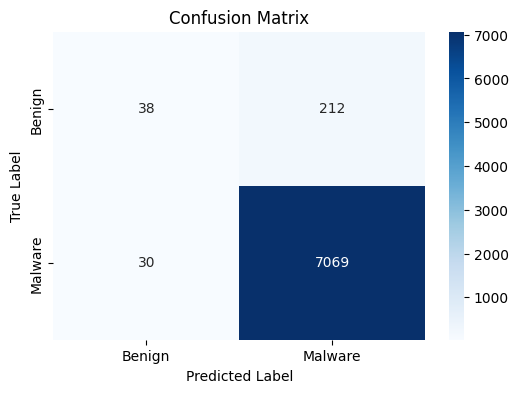


--- Training Bidirectional RNN ---
Epoch 01/100 - Train Loss: 0.1915, Val Loss: 0.1484
Epoch 02/100 - Train Loss: 0.1227, Val Loss: 0.1395
Epoch 03/100 - Train Loss: 0.1154, Val Loss: 0.1343
Epoch 04/100 - Train Loss: 0.1085, Val Loss: 0.1299
Epoch 05/100 - Train Loss: 0.1042, Val Loss: 0.1259
Epoch 06/100 - Train Loss: 0.0980, Val Loss: 0.1255
Epoch 07/100 - Train Loss: 0.0962, Val Loss: 0.1198
Epoch 08/100 - Train Loss: 0.0929, Val Loss: 0.1242
Epoch 09/100 - Train Loss: 0.0872, Val Loss: 0.1204
Epoch 10/100 - Train Loss: 0.0864, Val Loss: 0.1123
Epoch 11/100 - Train Loss: 0.0815, Val Loss: 0.1076
Epoch 12/100 - Train Loss: 0.0771, Val Loss: 0.1042
Epoch 13/100 - Train Loss: 0.0746, Val Loss: 0.1019
Epoch 14/100 - Train Loss: 0.0700, Val Loss: 0.1004
Epoch 15/100 - Train Loss: 0.0642, Val Loss: 0.0971
Epoch 16/100 - Train Loss: 0.0615, Val Loss: 0.0957
Epoch 17/100 - Train Loss: 0.0814, Val Loss: 0.1519
Epoch 18/100 - Train Loss: 0.0923, Val Loss: 0.1184
Epoch 19/100 - Train Loss: 0

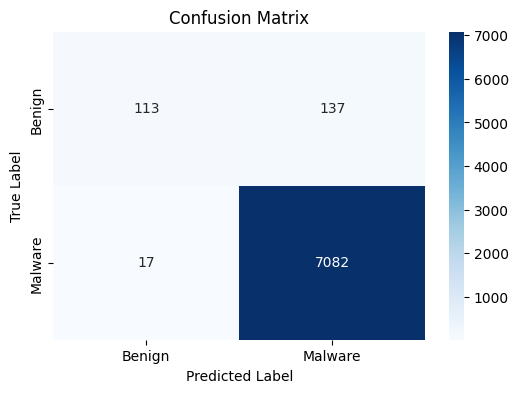


--- Training LSTM Model ---
Epoch 01/100 - Train Loss: 0.2452, Val Loss: 0.1765
Epoch 02/100 - Train Loss: 0.1529, Val Loss: 0.1673
Epoch 03/100 - Train Loss: 0.1444, Val Loss: 0.1613
Epoch 04/100 - Train Loss: 0.1346, Val Loss: 0.1754
Epoch 05/100 - Train Loss: 0.1375, Val Loss: 0.1585
Epoch 06/100 - Train Loss: 0.1315, Val Loss: 0.1539
Epoch 07/100 - Train Loss: 0.1247, Val Loss: 0.1554
Epoch 08/100 - Train Loss: 0.1185, Val Loss: 0.1501
Epoch 09/100 - Train Loss: 0.1160, Val Loss: 0.1457
Epoch 10/100 - Train Loss: 0.1138, Val Loss: 0.1419
Epoch 11/100 - Train Loss: 0.1060, Val Loss: 0.1376
Epoch 12/100 - Train Loss: 0.1039, Val Loss: 0.1389
Epoch 13/100 - Train Loss: 0.0984, Val Loss: 0.1350
Epoch 14/100 - Train Loss: 0.0930, Val Loss: 0.1321
Epoch 15/100 - Train Loss: 0.0888, Val Loss: 0.1347
Epoch 16/100 - Train Loss: 0.0827, Val Loss: 0.1281
Epoch 17/100 - Train Loss: 0.0784, Val Loss: 0.1224
Epoch 18/100 - Train Loss: 0.0815, Val Loss: 0.1235
Epoch 19/100 - Train Loss: 0.0724, 

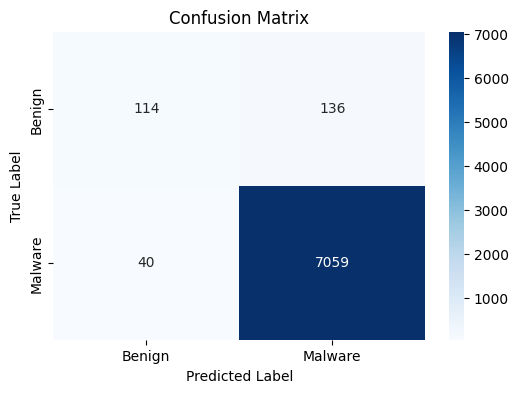

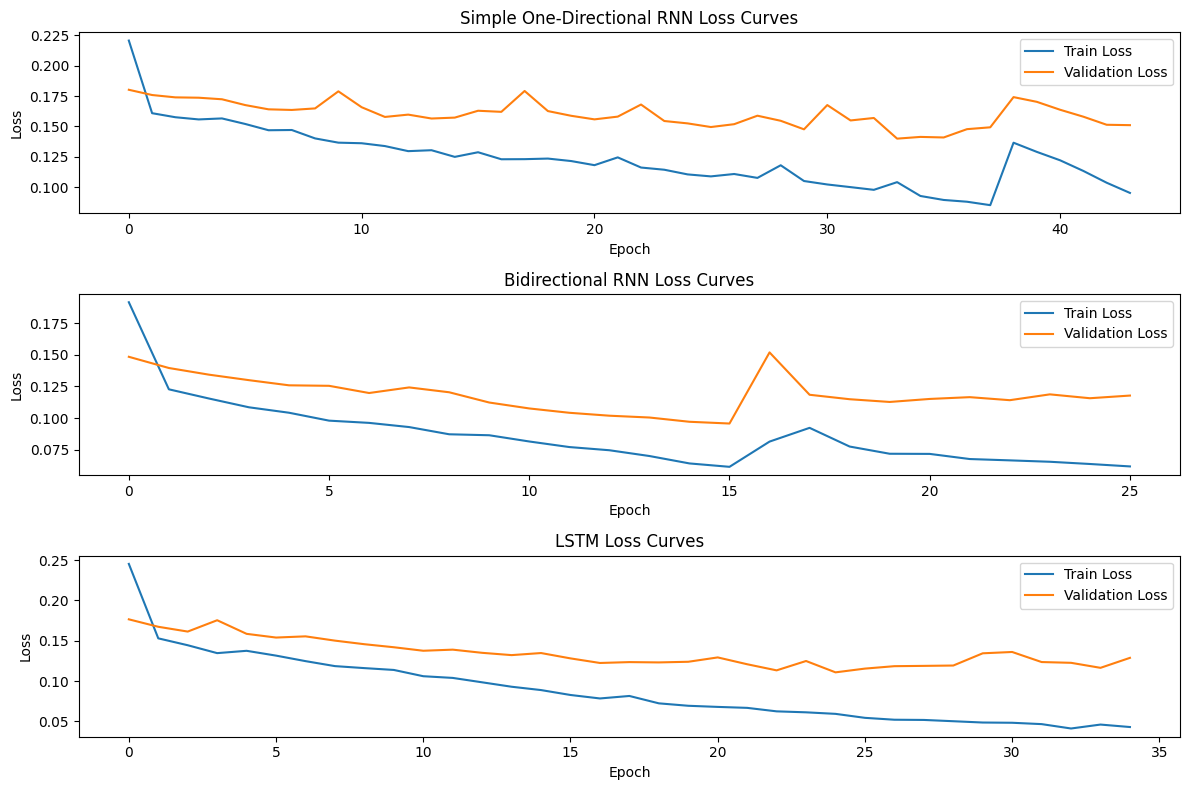

Simple RNN training time: 54.30 seconds
Bidirectional RNN training time: 45.51 seconds
LSTM training time: 45.91 seconds


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import pad_sequences
import pandas as pd


# RNN-based classification pipeline for malware vs. benign API-call sequences:
# – Set random seeds for reproducibility
# – Pad/truncate encoded sequences to a fixed max length and compute true sequence lengths
# – Wrap data into a custom SeqDataset returning (sequence, length, label)
# – Split into 80/20 train/validation and prepare DataLoaders (batch_size=64)
# – Define three classifiers:
#    • SimpleRNN: one-directional RNN with embeddings → tanh RNN → linear + sigmoid
#    • BiRNN: bidirectional RNN with embeddings → concat forward/backward hidden → linear + sigmoid
#    • LSTM: unidirectional LSTM with embeddings → LSTM hidden → linear + sigmoid
# – Train each model with BCEWithLogitsLoss, AdamW optimizer, and early stopping (patience=10)
# – After training, evaluate on the test set: threshold outputs at 0.5, print classification report, and plot confusion matrix
# – Finally, plot train/validation loss curves for all three variants and report their training times


# Data Preparation and Dataset Creation

max_len_train = train_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_train)

max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Test Sequence Length:", max_len_test)


train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)

X_train_padded = pad_sequences(train_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')
X_test_padded  = pad_sequences(test_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')

print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)

y_train = train_df['is_malware'].values
y_test  = test_df['is_malware'].values

# Compute real sequence lengths (number of tokens != 0)
def compute_lengths(padded_sequences):
    return np.sum(padded_sequences != 0, axis=1)

train_lengths = compute_lengths(X_train_padded)
test_lengths  = compute_lengths(X_test_padded)

# Create custom dataset returning (sequence, length, label)
class APICallSequenceDataset(Dataset):
    def __init__(self, sequences, lengths, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.labels[idx]

train_dataset = APICallSequenceDataset(X_train_padded, train_lengths, y_train)
test_dataset = APICallSequenceDataset(X_test_padded, test_lengths, y_test)

# Split training dataset into train (80%) and validation (20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)



# Simple One-Directional RNN
class SimpleRNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        Simple unidirectional RNN for classification.
        """
        super(SimpleRNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                          batch_first=True, bidirectional=False, nonlinearity="tanh")
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, h_n = self.rnn(packed)
        hidden = h_n[-1]
        out = self.fc(hidden)
        out = self.sigmoid(out)
        return out

# Bidirectional RNN
class BiRNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        Bidirectional RNN for classification.
        """
        super(BiRNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                          batch_first=True, bidirectional=True, nonlinearity="tanh")
        # Hidden state dimension is multiplied by 2 due to bidirectional RNN
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, hidden = self.rnn(packed)
        # hidden shape: (num_layers * 2, batch_size, hidden_size)
        # For one-layer bidirectional RNN, hidden[-2] is last forward, hidden[-1] is last backward.
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        out = self.fc(hidden_cat)
        out = self.sigmoid(out)
        return out

# LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        LSTM for classification.
        """
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hidden, cell) = self.lstm(packed)
        out = self.fc(hidden[-1])
        out = self.sigmoid(out)
        return out


# Hyperparameters and Device Setup

vocab_size = len(vocab)  # 'vocab' deve essere definito nella fase di creazione del vocabolario
embedding_dim = 50
hidden_size = 64

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training Function with Early Stopping

def train_model(model, train_loader, val_loader, num_epochs, patience, criterion, optimizer, device):
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for sequences, lengths, labels in train_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            optimizer.zero_grad()
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * sequences.size(0)
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0

        for sequences, lengths, labels in val_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * sequences.size(0)
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        print(f"Epoch {epoch+1:02d}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    end_time = time.time()
    training_time = end_time - start_time
    print(f"Total training time: {training_time:.2f} seconds")
    model.load_state_dict(best_model_state)
    return train_losses, val_losses, training_time


# Evaluation Function

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for sequences, lengths, labels in test_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model(sequences, lengths)
            preds = (outputs > 0.5).float()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Train and Evaluate Each Model Variant

num_epochs = 100
patience = 10

# Simple One-Directional RNN
print("\n--- Training Simple One-Directional RNN ---")
model_simple_rnn = SimpleRNNClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size, output_size=1, num_layers=1)
model_simple_rnn = model_simple_rnn.to(device)
optimizer_simple = optim.AdamW(model_simple_rnn.parameters(), lr=0.0005)
criterion = nn.BCELoss()

train_losses_simple, val_losses_simple, time_simple = train_model(model_simple_rnn, train_loader, val_loader, num_epochs, patience, criterion, optimizer_simple, device)
print("Evaluating Simple One-Directional RNN on Test Set:")
evaluate_model(model_simple_rnn, test_loader, device)

# Bidirectional RNN
print("\n--- Training Bidirectional RNN ---")
class BiRNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        super(BiRNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                          batch_first=True, bidirectional=True, nonlinearity="tanh")
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, hidden = self.rnn(packed)
        # hidden shape: (num_layers * 2, batch_size, hidden_size)
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        out = self.fc(hidden_cat)
        out = self.sigmoid(out)
        return out

model_birnn = BiRNNClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size, output_size=1, num_layers=1)
model_birnn = model_birnn.to(device)
optimizer_bi = optim.AdamW(model_birnn.parameters(), lr=0.0005)
train_losses_bi, val_losses_bi, time_bi = train_model(model_birnn, train_loader, val_loader, num_epochs, patience, criterion, optimizer_bi, device)
print("Evaluating Bidirectional RNN on Test Set:")
evaluate_model(model_birnn, test_loader, device)

# LSTM Model
print("\n--- Training LSTM Model ---")
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hidden, cell) = self.lstm(packed)
        out = self.fc(hidden[-1])
        out = self.sigmoid(out)
        return out

model_lstm = LSTMClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size, output_size=1, num_layers=1)
model_lstm = model_lstm.to(device)
optimizer_lstm = optim.AdamW(model_lstm.parameters(), lr=0.0005)
train_losses_lstm, val_losses_lstm, time_lstm = train_model(model_lstm, train_loader, val_loader, num_epochs, patience, criterion, optimizer_lstm, device)
print("Evaluating LSTM Model on Test Set:")
evaluate_model(model_lstm, test_loader, device)

# -----------------------------
# Plot Loss Curves for All Variants

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
plt.plot(train_losses_simple, label="Train Loss")
plt.plot(val_losses_simple, label="Validation Loss")
plt.title("Simple One-Directional RNN Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(3,1,2)
plt.plot(train_losses_bi, label="Train Loss")
plt.plot(val_losses_bi, label="Validation Loss")
plt.title("Bidirectional RNN Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(3,1,3)
plt.plot(train_losses_lstm, label="Train Loss")
plt.plot(val_losses_lstm, label="Validation Loss")
plt.title("LSTM Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------
# Print Training Times
# -----------------------------
print(f"Simple RNN training time: {time_simple:.2f} seconds")
print(f"Bidirectional RNN training time: {time_bi:.2f} seconds")
print(f"LSTM training time: {time_lstm:.2f} seconds")


#  LSTM Bi-Directional

Maximum Training Sequence Length: 90
Maximum Test Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)
BiLSTMClassifier(
  (embedding): Embedding(255, 50, padding_idx=0)
  (lstm): LSTM(50, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Epoch 01/100 - Train Loss: 0.2364, Val Loss: 0.1587
Epoch 02/100 - Train Loss: 0.1394, Val Loss: 0.1428
Epoch 03/100 - Train Loss: 0.1216, Val Loss: 0.1234
Epoch 04/100 - Train Loss: 0.1083, Val Loss: 0.1141
Epoch 05/100 - Train Loss: 0.0983, Val Loss: 0.1021
Epoch 06/100 - Train Loss: 0.0901, Val Loss: 0.1084
Epoch 07/100 - Train Loss: 0.0858, Val Loss: 0.0950
Epoch 08/100 - Train Loss: 0.0817, Val Loss: 0.0958
Epoch 09/100 - Train Loss: 0.0775, Val Loss: 0.0909
Epoch 10/100 - Train Loss: 0.0706, Val Loss: 0.0883
Epoch 11/100 - Train Loss: 0.0656, Val Loss: 0.0896
Epoch 12/100 - Train Loss: 0.0625, Val Loss: 0.0925


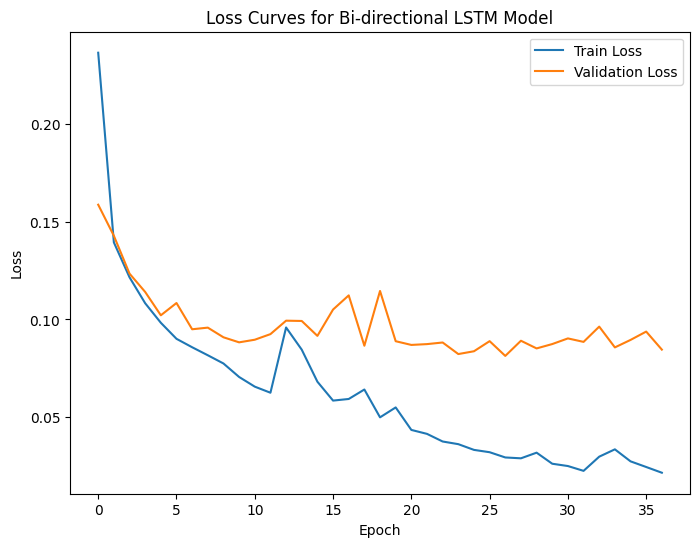

Confusion Matrix:
[[ 174   76]
 [  40 7059]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.81      0.70      0.75       250
     Malware       0.99      0.99      0.99      7099

    accuracy                           0.98      7349
   macro avg       0.90      0.85      0.87      7349
weighted avg       0.98      0.98      0.98      7349



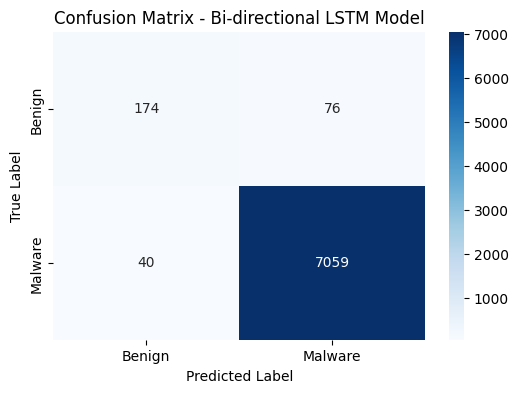

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import pad_sequences
import pandas as pd

# Step 1: Load Data, Drop Duplicates, Encode and Pad Sequences

max_len_train = train_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_train)

max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Test Sequence Length:", max_len_test)


train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)


X_train_padded = pad_sequences(train_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')
X_test_padded  = pad_sequences(test_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')

print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)

y_train = train_df['is_malware'].values
y_test  = test_df['is_malware'].values

# Compute Sequence Lengths and Create Custom Dataset

def compute_lengths(padded_sequences):

    return np.sum(padded_sequences != 0, axis=1)

train_lengths = compute_lengths(X_train_padded)
test_lengths  = compute_lengths(X_test_padded)

class APICallSequenceDataset(Dataset):
    def __init__(self, sequences, lengths, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.labels[idx]

train_dataset = APICallSequenceDataset(X_train_padded, train_lengths, y_train)
test_dataset = APICallSequenceDataset(X_test_padded, test_lengths, y_test)

#  training (80%) and validation (20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Define a Bi-Directional LSTM Classifier Model

class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1):
        """
        Bi-Directional LSTM classifier for API call sequences.

        Args:
            vocab_size (int): Number of valid tokens (excluding padding).
            embedding_dim (int): Dimension of the embeddings.
            hidden_size (int): Dimension of the LSTM hidden state.
            output_size (int): Dimension of the output (1 for binary classification).
            num_layers (int): Number of LSTM layers.

        Note: num_embeddings is set to vocab_size + 1 to reserve index 0 for padding.
        """

        super(BiLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1,
                                      embedding_dim=embedding_dim,
                                      padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=True)

        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):

        embedded = self.embedding(x)  # (batch_size, max_len, embedding_dim)
        # Pack the sequence for efficient LSTM computation
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hidden, cell) = self.lstm(packed)
        # hidden shape: (num_layers * 2, batch_size, hidden_size)
        hidden_forward = hidden[-2]
        hidden_backward = hidden[-1]
        hidden_cat = torch.cat((hidden_forward, hidden_backward), dim=1)  # (batch_size, hidden_size*2)
        out = self.fc(hidden_cat)
        out = self.sigmoid(out)
        return out


vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64

model_lstm_bi = BiLSTMClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim,
                                  hidden_size=hidden_size, output_size=1, num_layers=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_lstm_bi = model_lstm_bi.to(device)
print(model_lstm_bi)

# Configure Loss Function, Optimizer, and Training Loop with Early Stopping

criterion = nn.BCELoss().to(device)
optimizer = optim.AdamW(model_lstm_bi.parameters(), lr=0.0005)

num_epochs = 100
patience = 10
best_val_loss = float('inf')
patience_counter = 0

train_losses = []
val_losses = []

start_time = time.time()

for epoch in range(num_epochs):
    model_lstm_bi.train()
    running_loss = 0.0
    for sequences, lengths, labels in train_loader:
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
        optimizer.zero_grad()
        outputs = model_lstm_bi(sequences, lengths)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * sequences.size(0)
    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model_lstm_bi.eval()
    running_val_loss = 0.0
    for sequences, lengths, labels in val_loader:
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
        outputs = model_lstm_bi(sequences, lengths)
        loss = criterion(outputs, labels)
        running_val_loss += loss.item() * sequences.size(0)
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1:02d}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        patience_counter = 0
        best_model_state = model_lstm_bi.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

end_time = time.time()
print(f"Total training time: {end_time - start_time:.2f} seconds")

model_lstm_bi.load_state_dict(best_model_state)

# Plot Loss Curves for the Bi-directional LSTM Model

plt.figure(figsize=(8,6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves for Bi-directional LSTM Model")
plt.legend()
plt.show()

# -----------------------------
# Step 6: Evaluate the Bi-directional LSTM Model on the Test Set
# -----------------------------
model_lstm_bi.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for sequences, lengths, labels in test_loader:
        sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
        outputs = model_lstm_bi(sequences, lengths)
        preds = (outputs > 0.5).float()
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bi-directional LSTM Model")
plt.show()


Network Speed and Overhead:

- Speed Comparison: The FFNN is considerably faster than all RNN variants because it processes inputs in parallel, while RNN-based models (including one-directional RNN, bidirectional RNN, and LSTM) must iterate over sequence timesteps one by one.

- Overhead Source: The extra time is mostly due to the sequential processing inherent in RNNs and the additional cost of handling variable-length sequences (e.g., using pack_padded_sequence). In addition, bidirectional and LSTM architectures have extra computations (e.g., for backward passes and gating mechanisms).

Training and Performance Observations:

 - Variants and Hyperparameters:

    Simple One-Directional RNN: Uses an embedding layer (embedding_dim=50) and a single-layer RNN (hidden_size=64).

    Bidirectional RNN: Same hyperparameters as the simple RNN, but processes sequences in both directions, doubling the effective hidden state size.

    Bi-Directional LSTM: Uses a bidirectional LSTM with the same hidden_size (64) and one layer, capturing long-term dependencies better via gating mechanisms.

 - Training Differences:

    The FFNN trains much faster, but its performance is limited because it does not capture sequence order.

    Among the RNN variants, the bidirectional LSTM generally shows better convergence and final performance, albeit with increased training time.

 - Test Results:

    RNN models have better performance on sequential data than the FFNN.

    While the one-directional RNN is simpler and faster among RNNs, the bidirectional and LSTM models give more robust performance, indicating a trade-off between speed and accuracy.

# LSTM Bi-Directional with BCEWithLogitsLoss, pos_weigth and dropout ( 2 layers)

BiLSTM2(
  (emb): Embedding(255, 50, padding_idx=0)
  (lstm): LSTM(50, 96, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc): Linear(in_features=192, out_features=1, bias=True)
)
Epoch 01 | train 0.0482 | val 0.0384
Epoch 02 | train 0.0339 | val 0.0331
Epoch 03 | train 0.0282 | val 0.0285
Epoch 04 | train 0.0248 | val 0.0264
Epoch 05 | train 0.0217 | val 0.0263
Epoch 06 | train 0.0202 | val 0.0233
Epoch 07 | train 0.0178 | val 0.0275
Epoch 08 | train 0.0164 | val 0.0257
Epoch 09 | train 0.0147 | val 0.0227
Epoch 10 | train 0.0125 | val 0.0251
Epoch 11 | train 0.0120 | val 0.0173
Epoch 12 | train 0.0121 | val 0.0265
Epoch 13 | train 0.0111 | val 0.0265
Epoch 14 | train 0.0121 | val 0.0257
Epoch 15 | train 0.0109 | val 0.0240
Epoch 16 | train 0.0102 | val 0.0310
Epoch 17 | train 0.0102 | val 0.0260
Early stop triggered
Total training time: 61.8s
              precision    recall  f1-score   support

      Benign       0.25      0.86      0.38       250
     Malware 

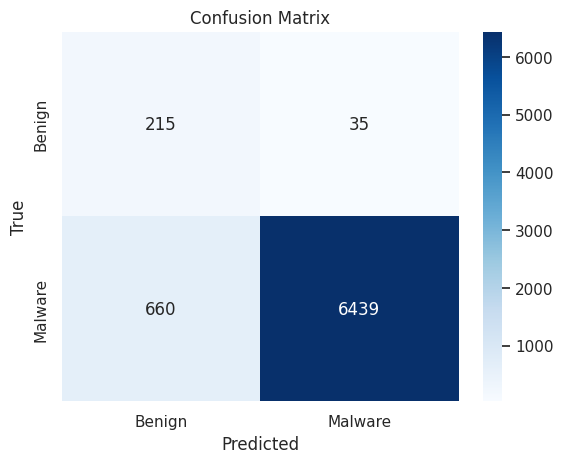

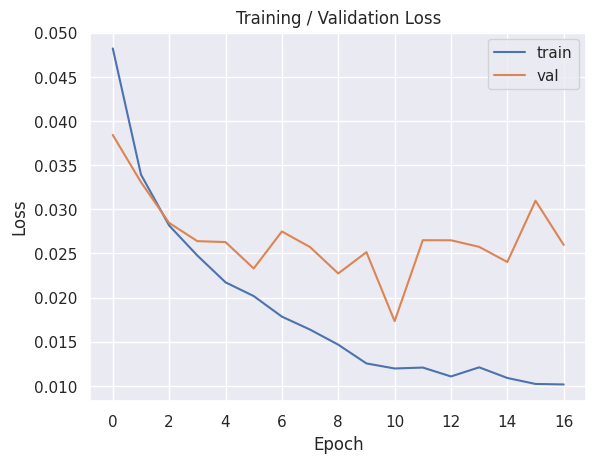

In [ ]:
# Two-layer Bidirectional LSTM classification pipeline:
# – Seed everything for reproducibility
# – Pad/truncate API‐call sequences to the same max length and compute true lengths
# – Wrap sequences, lengths, and labels in a custom SeqDataset and split into 80/20 train/validation
# – Define BiLSTM2: 50‑dim embeddings → 2‑layer bidirectional LSTM (dropout=0.2) → concatenate final forward/backward hidden → linear output (logits)
# – Use BCEWithLogitsLoss with pos_weight to handle class imbalance and AdamW optimizer (lr=5e‑4)
# – Train with early stopping (patience=6), logging train/val loss per epoch
# – After training, load best model, predict on test set (threshold=0.5), and print classification report with confusion matrix
# – Plot training and validation loss curves for visualizing convergence



import time, random, numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
set_seed()

# Data preparation  (train_df, test_df, vocab already in RAM)
max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df['seq_encoded'],  maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    """(sequence, true_length, label) wrapper."""
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self): return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(
    full_ds,
    [int(.8 * len(full_ds)), len(full_ds) - int(.8 * len(full_ds))]
)

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)


# Model  – 2-layer Bi-LSTM + dropout between layers
class BiLSTM2(nn.Module):
    def __init__(self, vocab_size: int,
                 emb_dim: int = 50,
                 hid: int = 96,
                 num_layers: int = 2,
                 dropout: float = 0.2):
        super().__init__()
        self.emb = nn.Embedding(vocab_size + 1, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(
            input_size    = emb_dim,
            hidden_size   = hid,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = True,
            dropout       = dropout          # active because num_layers > 1
        )
        self.fc = nn.Linear(hid * 2, 1)      # outputs a single logit

    def forward(self, x, lengths):
        x = self.emb(x)                                       # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, (h, _) = self.lstm(x)                              # h: (2*L, B, H)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)              # concat fwd & bwd
        return self.fc(h_cat).squeeze(1)                      # logits (B,)

# ------------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = BiLSTM2(len(vocab), emb_dim=50, hid=96).to(device)
print(model)

# Class-imbalance weight  (neg / pos)
pos_w = torch.tensor([(y_train == 0).sum() / (y_train == 1).sum()]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_w)
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------
#Training with early-stopping
best_val, patience, stalls = 1e9, 6, 0
train_loss, val_loss = [], []
start = time.time()

def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    total = 0.0
    for seq, ln, lbl in loader:
        seq, ln, lbl = seq.to(device), ln.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq, ln), lbl)
        if train:
            loss.backward()
            optimizer.step()
        total += loss.item() * seq.size(0)
    return total / len(loader.dataset)

for ep in range(100):
    tr = run_epoch(train_ld, True)
    vl = run_epoch(val_ld,   False)
    train_loss.append(tr)
    val_loss.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best_val:
        best_val, stalls = vl, 0
        best_state = model.state_dict()
    else:
        stalls += 1
        if stalls >= patience:
            print('Early stop triggered')
            break

print(f"Total training time: {time.time() - start:.1f}s")
model.load_state_dict(best_state)

# Evaluation utilities
def predict(loader, threshold=0.5):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for seq, ln, lbl in loader:
            seq, ln = seq.to(device), ln.to(device)
            probs = torch.sigmoid(model(seq, ln))
            preds.append((probs > threshold).cpu())
            labels.append(lbl)
    return torch.cat(preds).numpy(), torch.cat(labels).numpy()

pred, true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign', 'Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'],
            yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------------------------------
# 5. Loss curves
plt.plot(train_loss, label='train')
plt.plot(val_loss,   label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training / Validation Loss')
plt.legend()
plt.show()


# LSTM Bi-Directional with BCEWithLogitsLoss, dropout (0,5) ( 2 layers) and with pos_weigth

BiLSTM2(
  (emb): Embedding(255, 50, padding_idx=0)
  (lstm): LSTM(50, 96, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=192, out_features=1, bias=True)
)
Epoch 01 | train 0.0488 | val 0.0392
Epoch 02 | train 0.0346 | val 0.0331
Epoch 03 | train 0.0293 | val 0.0307
Epoch 04 | train 0.0255 | val 0.0271
Epoch 05 | train 0.0235 | val 0.0252
Epoch 06 | train 0.0216 | val 0.0240
Epoch 07 | train 0.0229 | val 0.0229
Epoch 08 | train 0.0184 | val 0.0261
Epoch 09 | train 0.0162 | val 0.0260
Epoch 10 | train 0.0137 | val 0.0263
Epoch 11 | train 0.0170 | val 0.0261
Epoch 12 | train 0.0144 | val 0.0270
Epoch 13 | train 0.0128 | val 0.0244
Early stop triggered
Total training time: 41.8s
              precision    recall  f1-score   support

      Benign       0.31      0.88      0.46       250
     Malware       1.00      0.93      0.96      7099

    accuracy                           0.93      7349
   macro avg       0.65      0.90      0.71      734

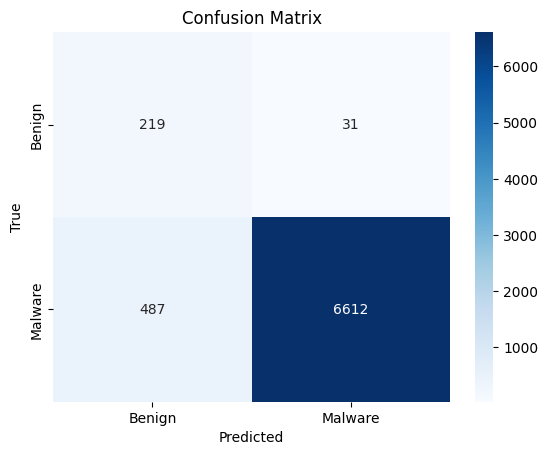

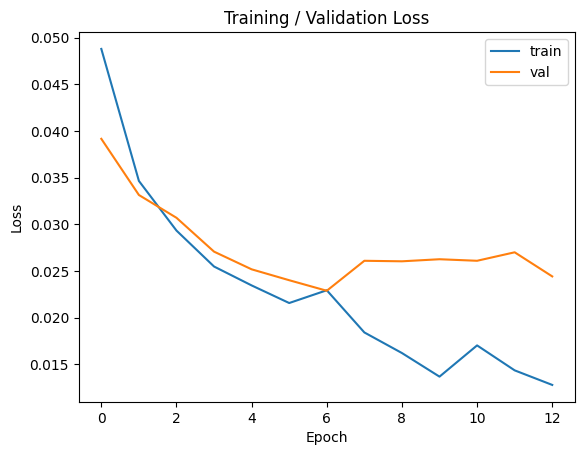

In [ ]:

# Two-layer Bidirectional LSTM pipeline for API-call classification:
# – Seed for reproducibility and pad/truncate sequences to fixed length, computing true lengths
# – Wrap sequences, lengths, and binary labels into SeqDataset; split 80/20 into train/validation DataLoaders
# – Define BiLSTM2: 50-dim embeddings → 2-layer bidirectional LSTM (dropout=0.5 between layers) → concatenate final forward/backward hidden → linear logit output
# – Handle class imbalance via pos_weight in BCEWithLogitsLoss; optimize with AdamW (lr=5e-4)
# – Train with early stopping (patience=6), record train/val BCE loss each epoch
# – After training, load best model, predict on test set (threshold=0.5), and display classification report with confusion matrix
# – Plot training and validation loss curves for convergence visualization

import time, random, numpy as np, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pack_padded_sequence
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt, seaborn as sns
from keras.utils import pad_sequences

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
set_seed()

# ------------------------------------------------------------
# 1. Data preparation  (train_df, test_df, vocab already in RAM)
max_len = max(test_df['seq_encoded'].apply(len))
X_train = pad_sequences(train_df['seq_encoded'], maxlen=max_len,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df['seq_encoded'],  maxlen=max_len,
                        padding='post', truncating='post')

train_len = (X_train != 0).sum(axis=1)
test_len  = (X_test  != 0).sum(axis=1)
y_train   = train_df['is_malware'].astype(np.float32).values
y_test    = test_df ['is_malware'].astype(np.float32).values

class SeqDataset(Dataset):
    """(sequence, true_length, label) wrapper."""
    def __init__(self, seqs, lens, labels):
        self.seqs = torch.tensor(seqs,   dtype=torch.long)
        self.lens = torch.tensor(lens,   dtype=torch.long)
        self.lbls = torch.tensor(labels, dtype=torch.float32)
    def __len__(self): return len(self.seqs)
    def __getitem__(self, idx):
        return self.seqs[idx], self.lens[idx], self.lbls[idx]

full_ds   = SeqDataset(X_train, train_len, y_train)
test_ds   = SeqDataset(X_test , test_len , y_test )
train_ds, val_ds = random_split(
    full_ds,
    [int(.8 * len(full_ds)), len(full_ds) - int(.8 * len(full_ds))]
)

train_ld = DataLoader(train_ds, batch_size=64, shuffle=True)
val_ld   = DataLoader(val_ds  , batch_size=64)
test_ld  = DataLoader(test_ds , batch_size=64)

# ------------------------------------------------------------
# 2-layer Bi-LSTM + dropout between layers
class BiLSTM2(nn.Module):
    def __init__(self, vocab_size: int,
                 emb_dim: int = 50,
                 hid: int = 96,
                 num_layers: int = 2,
                 dropout: float = 0.5):
        super().__init__()
        self.emb = nn.Embedding(vocab_size + 1, emb_dim, padding_idx=0)
        self.lstm = nn.LSTM(
            input_size    = emb_dim,
            hidden_size   = hid,
            num_layers    = num_layers,
            batch_first   = True,
            bidirectional = True,
            dropout       = dropout          # active because num_layers > 1
        )
        self.fc = nn.Linear(hid * 2, 1)      # outputs a single logit

    def forward(self, x, lengths):
        x = self.emb(x)                                       # (B, T, D)
        x = pack_padded_sequence(x, lengths.cpu(),
                                 batch_first=True, enforce_sorted=False)
        _, (h, _) = self.lstm(x)                              # h: (2*L, B, H)
        h_cat = torch.cat((h[-2], h[-1]), dim=1)              # concat fwd & bwd
        return self.fc(h_cat).squeeze(1)                      # logits (B,)

# ------------------------------------------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = BiLSTM2(len(vocab), emb_dim=50, hid=96).to(device)
print(model)

# Class-imbalance weight  (neg / pos)
pos_w = torch.tensor([(y_train == 0).sum() / (y_train == 1).sum()]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_w)
optimizer = optim.AdamW(model.parameters(), lr=5e-4)

# ------------------------------------------------------------
# Training with early-stopping
best_val, patience, stalls = 1e9, 6, 0
train_loss, val_loss = [], []
start = time.time()

def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    torch.set_grad_enabled(train)
    total = 0.0
    for seq, ln, lbl in loader:
        seq, ln, lbl = seq.to(device), ln.to(device), lbl.to(device)
        if train: optimizer.zero_grad()
        loss = criterion(model(seq, ln), lbl)
        if train:
            loss.backward()
            optimizer.step()
        total += loss.item() * seq.size(0)
    return total / len(loader.dataset)

for ep in range(100):
    tr = run_epoch(train_ld, True)
    vl = run_epoch(val_ld,   False)
    train_loss.append(tr)
    val_loss.append(vl)
    print(f'Epoch {ep+1:02d} | train {tr:.4f} | val {vl:.4f}')
    if vl < best_val:
        best_val, stalls = vl, 0
        best_state = model.state_dict()
    else:
        stalls += 1
        if stalls >= patience:
            print('Early stop triggered')
            break

print(f"Total training time: {time.time() - start:.1f}s")
model.load_state_dict(best_state)

# ------------------------------------------------------------
# Evaluation utilities
def predict(loader, threshold=0.5):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for seq, ln, lbl in loader:
            seq, ln = seq.to(device), ln.to(device)
            probs = torch.sigmoid(model(seq, ln))
            preds.append((probs > threshold).cpu())
            labels.append(lbl)
    return torch.cat(preds).numpy(), torch.cat(labels).numpy()

pred, true = predict(test_ld)
print(classification_report(true, pred, target_names=['Benign', 'Malware']))
cm = confusion_matrix(true, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malware'],
            yticklabels=['Benign', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------------------------------
# Loss curves
plt.plot(train_loss, label='train')
plt.plot(val_loss,   label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training / Validation Loss')
plt.legend()
plt.show()


## LSTM Bi-Directional


Maximum Training Sequence Length: 90
Maximum Test Sequence Length: 100
Shape of padded training sequences: (12838, 100)
Shape of padded test sequences: (7349, 100)


[I 2025-05-18 14:17:58,469] A new study created in memory with name: no-name-de108093-d399-4530-a25c-2d7c3e3fa390
<ipython-input-18-467f56b1ba66>:120: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr_bilstm", 5e-4, 1e-3)
[I 2025-05-18 14:19:31,250] Trial 0 finished with value: 0.06665167010554643 and parameters: {'embedding_dim_bilstm': 32, 'hidden_size_bilstm': 64, 'num_layers_bilstm': 2, 'output_relu_bilstm': True, 'lr_bilstm': 0.0005824643218199499}. Best is trial 0 with value: 0.06665167010554643.
<ipython-input-18-467f56b1ba66>:120: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr_bilstm", 5e-4, 1e-3)
[I

Best trial for BiLSTM:
  embedding_dim_bilstm: 50
  hidden_size_bilstm: 64
  num_layers_bilstm: 2
  output_relu_bilstm: False
  lr_bilstm: 0.0006617746007409206
Epoch 01/100 - Train Loss: 0.2057, Val Loss: 0.1252
Epoch 02/100 - Train Loss: 0.1335, Val Loss: 0.0990
Epoch 03/100 - Train Loss: 0.1124, Val Loss: 0.0855
Epoch 04/100 - Train Loss: 0.0977, Val Loss: 0.0848
Epoch 05/100 - Train Loss: 0.0910, Val Loss: 0.0773
Epoch 06/100 - Train Loss: 0.0813, Val Loss: 0.0790
Epoch 07/100 - Train Loss: 0.0746, Val Loss: 0.0981
Epoch 08/100 - Train Loss: 0.0760, Val Loss: 0.0755
Epoch 09/100 - Train Loss: 0.0659, Val Loss: 0.0783
Epoch 10/100 - Train Loss: 0.0612, Val Loss: 0.0767
Epoch 11/100 - Train Loss: 0.0557, Val Loss: 0.0786
Epoch 12/100 - Train Loss: 0.0509, Val Loss: 0.0703
Epoch 13/100 - Train Loss: 0.0465, Val Loss: 0.0715
Epoch 14/100 - Train Loss: 0.0405, Val Loss: 0.0678
Epoch 15/100 - Train Loss: 0.0384, Val Loss: 0.0640
Epoch 16/100 - Train Loss: 0.0375, Val Loss: 0.0632
Epoch 1

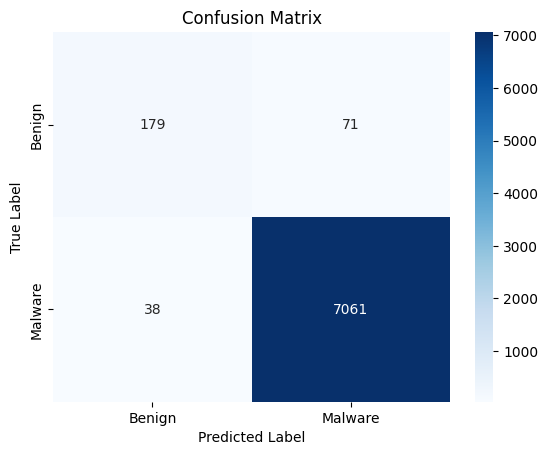

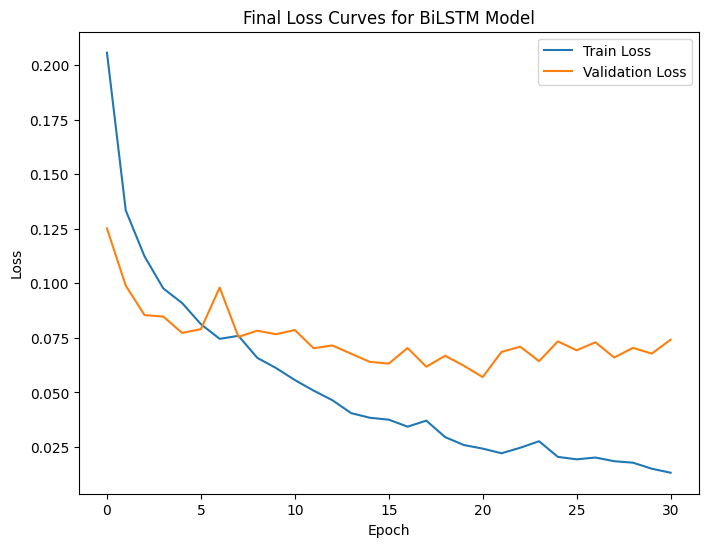

Final BiLSTM training time: 92.65 seconds


In [ ]:
# BiLSTM classification with Optuna hyperparameter tuning:
# – Seed for reproducibility; pad/truncate API-call sequences and compute true lengths
# – Wrap into custom Dataset, split 80/20 into train/validation DataLoaders
# – Define BiLSTMClassifier: embeddings → bidirectional LSTM → concatenate final hidden → optional ReLU → sigmoid output
# – Use Optuna to tune embedding_dim, hidden_size, num_layers, output_relu, and learning rate over 20 trials (minimize validation loss)
# – Retrain the best BiLSTM model with early stopping (patience=10), record training/validation loss curves and total training time
# – Evaluate final model on test set: threshold at 0.5, print confusion matrix and classification report, and plot loss curves


import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import pad_sequences
import pandas as pd
import optuna

# Data Preparation

max_len_train = train_df['seq_encoded'].apply(len).max()
print("Maximum Training Sequence Length:", max_len_train)
max_len_test = test_df['seq_encoded'].apply(len).max()
print("Maximum Test Sequence Length:", max_len_test)

train_df.drop_duplicates(subset=['seq_encoded'], inplace=True)
test_df.drop_duplicates(subset=['seq_encoded'], inplace=True)

# len test for padding
X_train_padded = pad_sequences(train_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')
X_test_padded  = pad_sequences(test_df['seq_encoded'], maxlen=max_len_test, padding='post', truncating='post')
print("Shape of padded training sequences:", X_train_padded.shape)
print("Shape of padded test sequences:", X_test_padded.shape)

y_train = train_df['is_malware'].values
y_test  = test_df['is_malware'].values

# Compute actual sequence lengths (count of tokens != 0)
def compute_lengths(padded_sequences):
    return np.sum(padded_sequences != 0, axis=1)

train_lengths = compute_lengths(X_train_padded)
test_lengths  = compute_lengths(X_test_padded)

# Create custom dataset
class APICallSequenceDataset(Dataset):
    def __init__(self, sequences, lengths, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.lengths = torch.tensor(lengths, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)
    def __len__(self):
        return len(self.sequences)
    def __getitem__(self, idx):
        return self.sequences[idx], self.lengths[idx], self.labels[idx]

train_dataset = APICallSequenceDataset(X_train_padded, train_lengths, y_train)
test_dataset = APICallSequenceDataset(X_test_padded, test_lengths, y_test)

# Split train into train (80%) and validation (20%)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the Bi-Directional LSTM Classifier

class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size=1, num_layers=1, output_relu=False):
        """
        Bi-Directional LSTM classifier for API call sequences.

        Args:
            vocab_size (int): Number of valid tokens (0 reserved for padding).
            embedding_dim (int): Dimension of the embeddings.
            hidden_size (int): Hidden state dimension of LSTM.
            output_size (int): Output dimension (1 for binary classification).
            num_layers (int): Number of LSTM layers.
            output_relu (bool): if True,  ReLU.

        Note: num_embeddings = vocab_size + 1 to reserve 0 to padding.
        """
        super(BiLSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size + 1, embedding_dim=embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=num_layers,
                            batch_first=True, bidirectional=True)

        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.output_relu = output_relu
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, lengths):
        # x: (batch_size, max_len) con token indices
        embedded = self.embedding(x)  # (batch_size, max_len, embedding_dim)
        packed = pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hidden, cell) = self.lstm(packed)
        hidden_cat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        out = self.fc(hidden_cat)
        if self.output_relu:
            out = self.relu(out)
        out = self.sigmoid(out)
        return out

# Define Optuna Objective Functions for each Variant

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_size = len(vocab)

def objective_bilstm(trial):
    # Hyperparameter
    embedding_dim = trial.suggest_categorical("embedding_dim_bilstm", [32, 50, 64])
    hidden_size = trial.suggest_int("hidden_size_bilstm", 32, 128, step=32)
    num_layers = trial.suggest_int("num_layers_bilstm", 1, 2)
    output_relu = trial.suggest_categorical("output_relu_bilstm", [True, False])
    lr = trial.suggest_loguniform("lr_bilstm", 5e-4, 1e-3)

    model = BiLSTMClassifier(vocab_size=vocab_size, embedding_dim=embedding_dim, hidden_size=hidden_size,
                             output_size=1, num_layers=num_layers, output_relu=output_relu).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.BCELoss()

    best_val_loss = float('inf')
    for epoch in range(20):
        model.train()
        running_loss = 0.0
        for sequences, lengths, labels in train_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            optimizer.zero_grad()
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * sequences.size(0)
        epoch_val_loss = 0.0
        model.eval()

        for sequences, lengths, labels in val_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            epoch_val_loss += loss.item() * sequences.size(0)
        epoch_val_loss /= len(val_loader.dataset)
        trial.report(epoch_val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
    return best_val_loss


study_bilstm = optuna.create_study(direction="minimize")
study_bilstm.optimize(objective_bilstm, n_trials=20)
print("Best trial for BiLSTM:")
for key, value in study_bilstm.best_trial.params.items():
    print(f"  {key}: {value}")

# Final Training of the Best BiLSTM Model with Early Stopping

def train_final_model(model, train_loader, val_loader, num_epochs, patience, criterion, optimizer, device):
    best_val_loss = float('inf')
    patience_counter = 0
    train_losses = []
    val_losses = []
    start_time = time.time()

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for sequences, lengths, labels in train_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            optimizer.zero_grad()
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * sequences.size(0)
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        model.eval()
        running_val_loss = 0.0

        for sequences, lengths, labels in val_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model(sequences, lengths)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * sequences.size(0)
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        print(f"Epoch {epoch+1:02d}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    end_time = time.time()
    training_time = end_time - start_time
    print(f"Total training time: {training_time:.2f} seconds")
    model.load_state_dict(best_model_state)
    return train_losses, val_losses, training_time

best_params_bilstm = study_bilstm.best_trial.params

final_model_bilstm = BiLSTMClassifier(
    vocab_size=vocab_size,
    embedding_dim=best_params_bilstm["embedding_dim_bilstm"],
    hidden_size=best_params_bilstm["hidden_size_bilstm"],
    output_size=1,
    num_layers=best_params_bilstm["num_layers_bilstm"],
    output_relu=best_params_bilstm["output_relu_bilstm"]
).to(device)

optimizer_final_bilstm = optim.AdamW(final_model_bilstm.parameters(), lr=best_params_bilstm["lr_bilstm"])
criterion = nn.BCELoss()

final_train_losses_bilstm, final_val_losses_bilstm, time_final_bilstm = train_final_model(
    final_model_bilstm, train_loader, val_loader, num_epochs=100, patience=10,
    criterion=criterion, optimizer=optimizer_final_bilstm, device=device)

print("Final evaluation for BiLSTM:")
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for sequences, lengths, labels in test_loader:
            sequences, lengths, labels = sequences.to(device), lengths.to(device), labels.to(device).view(-1, 1)
            outputs = model(sequences, lengths)
            preds = (outputs > 0.5).float()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
    all_preds = torch.cat(all_preds).numpy()
    all_labels = torch.cat(all_labels).numpy()
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Benign', 'Malware']))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

evaluate_model(final_model_bilstm, test_loader, device)


# Plot Loss Curves for Final BiLSTM Model

plt.figure(figsize=(8,6))
plt.plot(final_train_losses_bilstm, label="Train Loss")
plt.plot(final_val_losses_bilstm, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Final Loss Curves for BiLSTM Model")
plt.legend()
plt.show()

print(f"Final BiLSTM training time: {time_final_bilstm:.2f} seconds")


more optimization

Max train len:90 • Max test len:100
Largest token id: 254
E001  train=0.1016  val=0.1047
E002  train=0.0599  val=0.0755
E003  train=0.0468  val=0.0823
E004  train=0.0404  val=0.0583
E005  train=0.0347  val=0.0760
E006  train=0.0294  val=0.0508
E007  train=0.0267  val=0.0637
E008  train=0.0242  val=0.0508
E009  train=0.0278  val=0.0657
E010  train=0.0267  val=0.0538
E011  train=0.0223  val=0.0484
E012  train=0.0221  val=0.0544
E013  train=0.0207  val=0.0475
E014  train=0.0230  val=0.0480
E015  train=0.0232  val=0.0488
E016  train=0.0172  val=0.0564
E017  train=0.0190  val=0.0469
E018  train=0.0157  val=0.0551
E019  train=0.0150  val=0.0555
E020  train=0.0192  val=0.0431
E021  train=0.0164  val=0.0516
E022  train=0.0163  val=0.0449
E023  train=0.0120  val=0.0463
E024  train=0.0217  val=0.0671
E025  train=0.0173  val=0.0503
E026  train=0.0165  val=0.0469
E027  train=0.0159  val=0.0388
E028  train=0.0127  val=0.0469
E029  train=0.0125  val=0.0494
E030  train=0.0127  val=0.0592
E031  train=

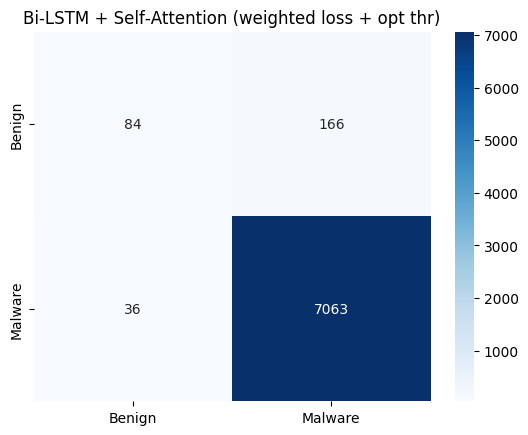

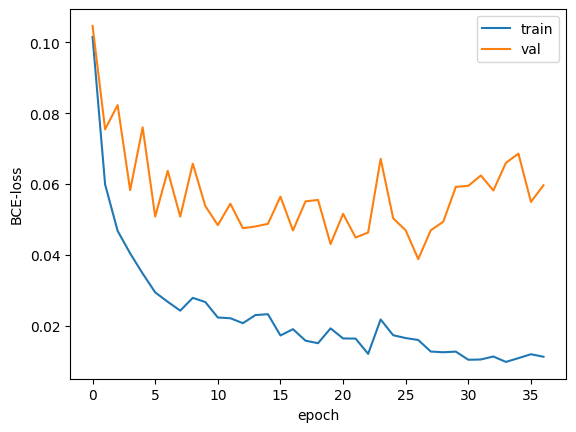

In [ ]:
# BiLSTM + Self‑Attention pipeline with balanced sampling and threshold tuning:
# – Seed for reproducibility; pad/truncate API‑call sequences and compute true lengths
# – Drop duplicate sequences; wrap into APIDataset and split 80/20 train/validation
# – Use WeightedRandomSampler to upsample minority class in training loader
# – Define BiLSTM_Attn: embeddings → 2‑layer bidirectional LSTM with inter‑layer dropout → Self‑Attention pooling → linear logits
# – Handle class imbalance via pos_weight in BCEWithLogitsLoss; optimize with AdamW (lr=4e‑4, weight_decay=5e‑3)
# – Train with early stopping (patience=10), record train/validation BCE loss per epoch
# – Tune decision threshold on validation set via Precision‐Recall curve (maximize F1)
# – Evaluate on test set: apply optimal threshold, print classification report, plot confusion matrix
# – Plot training vs. validation loss curves for convergence analysis

import time, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from keras.utils import pad_sequences

# Dataset preparation

assert {'seq_encoded','is_malware'} <= set(train_df.columns)

max_len_tr = train_df.seq_encoded.str.len().max()
max_len_te = test_df .seq_encoded.str.len().max()
print(f'Max train len:{max_len_tr} • Max test len:{max_len_te}')

train_df = train_df.drop_duplicates('seq_encoded')
test_df  = test_df .drop_duplicates('seq_encoded')

X_train = pad_sequences(train_df.seq_encoded, maxlen=max_len_te,
                        padding='post', truncating='post')
X_test  = pad_sequences(test_df .seq_encoded, maxlen=max_len_te,
                        padding='post', truncating='post')
y_train = train_df.is_malware.values.astype('int64')
y_test  = test_df .is_malware.values.astype('int64')

true_len = lambda m: np.sum(m!=0, axis=1)
len_train, len_test = true_len(X_train), true_len(X_test)

max_id = int(max(X_train.max(), X_test.max()))
print(f'Largest token id: {max_id}')

# Dataset and balanced sampling
class APIDataset(Dataset):
    def __init__(self,X,L,y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.L = torch.tensor(L, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):  return len(self.X)
    def __getitem__(self,i): return self.X[i], self.L[i], self.y[i]

full_ds = APIDataset(X_train,len_train,y_train)
test_ds = APIDataset(X_test ,len_test ,y_test)

g      = torch.Generator().manual_seed(42)
tr_len = int(0.8*len(full_ds)); vl_len = len(full_ds)-tr_len
tr_ds, vl_ds = random_split(full_ds,[tr_len,vl_len], generator=g)

tr_indices   = tr_ds.indices
y_tr_split   = y_train[tr_indices]
cls_counts   = np.bincount(y_tr_split)          # [benign, malware]
cls_weights  = 1./torch.tensor(cls_counts, dtype=torch.float)
sample_w     = cls_weights[y_tr_split]
sampler      = WeightedRandomSampler(sample_w, len(sample_w), replacement=True)

BATCH = 64
tr_loader = DataLoader(tr_ds, batch_size=BATCH, sampler=sampler)
vl_loader = DataLoader(vl_ds, batch_size=BATCH, shuffle=False)
te_loader = DataLoader(test_ds,batch_size=BATCH, shuffle=False)

# Model

class SelfAttention(nn.Module):
    def __init__(self,d): super().__init__(); self.q = nn.Parameter(torch.randn(d))
    def forward(self,H):                          # H (B,T,D)
        α = torch.softmax(H @ self.q, 1).unsqueeze(-1)   # (B,T,1)
        return (H*α).sum(1)                       # (B,D)

class BiLSTM_Attn(nn.Module):
    def __init__(self, vocab, emb=64, hid=128, layers=2, p_drop=0.2):
        super().__init__()
        self.emb  = nn.Embedding(vocab+1, emb, padding_idx=0)
        self.lstm = nn.LSTM(emb,hid,layers,batch_first=True,
                            bidirectional=True,
                            dropout=p_drop if layers>1 else 0.)
        self.attn = SelfAttention(hid*2)
        self.fc   = nn.Linear(hid*2,1)            # logits
    def forward(self,x,L):
        E = self.emb(x)
        packed = pack_padded_sequence(E,L.cpu(),batch_first=True, enforce_sorted=False)
        H,_ = self.lstm(packed)
        H,_ = pad_packed_sequence(H,batch_first=True)    # (B,T,2*hid)
        ctx = self.attn(H)
        return self.fc(ctx)

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = BiLSTM_Attn(vocab=max_id).to(device)

# weighted‑loss:
pos_w = torch.tensor([cls_counts[0]/cls_counts[1]]).to(device)   # ≃ 28
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_w).to(device)
optimizer = optim.AdamW(model.parameters(), lr=4e-4, weight_decay=5e-3)

def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    tot, s = 0,0.0
    with torch.set_grad_enabled(train):
        for x,l,y in loader:
            x,l,y = x.to(device), l.to(device), y.to(device).view(-1,1)
            logit = model(x,l)
            loss  = criterion(logit,y)
            if train:
                optimizer.zero_grad(); loss.backward(); optimizer.step()
            s += loss.item()*x.size(0); tot+=x.size(0)
    return s/tot

EPOCHS,PATIENCE = 100,10
best,wait = 1e9,0; tr_hist=[]; vl_hist=[]
t0=time.time()

for ep in range(1,EPOCHS+1):
    tr, vl = run_epoch(tr_loader,True), run_epoch(vl_loader,False)
    tr_hist.append(tr); vl_hist.append(vl)
    print(f'E{ep:03d}  train={tr:.4f}  val={vl:.4f}')
    if vl<best: best=vl; wait=0; best_w=model.state_dict()
    else: wait+=1
    if wait==PATIENCE: print(' early stop'); break
model.load_state_dict(best_w)
print(f'Training time: {(time.time()-t0):.1f}s')

# Threshold on validation set
probs_v, y_v = [],[]
model.eval()
with torch.no_grad():
    for x,l,y in vl_loader:
        p = torch.sigmoid(model(x.to(device),l.to(device))).cpu()
        probs_v.append(p); y_v.append(y)
probs_v = torch.cat(probs_v).numpy().ravel()
y_v     = torch.cat(y_v).numpy()

prec,rec,thr = precision_recall_curve(y_v,probs_v)
f1 = 2*prec*rec/(prec+rec+1e-9)
best_thr = thr[f1.argmax()]
print(f'Best threshold on val‑set: {best_thr:.2f}')

# Test evaluation
model.eval(); preds,labels=[],[]
with torch.no_grad():
    for x,l,y in te_loader:
        p = torch.sigmoid(model(x.to(device),l.to(device))).cpu()
        preds.append((p>best_thr).float()); labels.append(y)
p = torch.cat(preds).numpy(); t = torch.cat(labels).numpy()

cm = confusion_matrix(t,p)
print(cm)
print(classification_report(t,p,target_names=['Benign','Malware'],digits=4))

sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Benign','Malware'],
            yticklabels=['Benign','Malware'])
plt.title('Bi‑LSTM + Self‑Attention (weighted loss + opt thr)')
plt.show()

# Loss curves
plt.plot(tr_hist,label='train'); plt.plot(vl_hist,label='val')
plt.xlabel('epoch'); plt.ylabel('BCE‑loss'); plt.legend(); plt.show()
